In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import os

from matplotlib import pyplot as plt
import numpy as np


In [3]:
def simulate_experience(img_dir=None):
	# the image paths
	image_names = sorted(os.listdir(img_dir))

	for image_name in image_names:
		yield image_name

## Compare Image with Feature Map

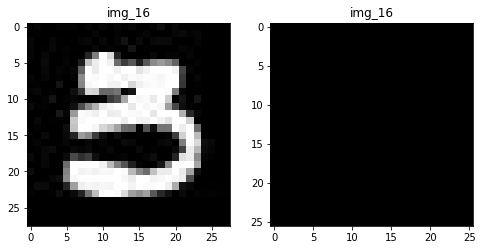

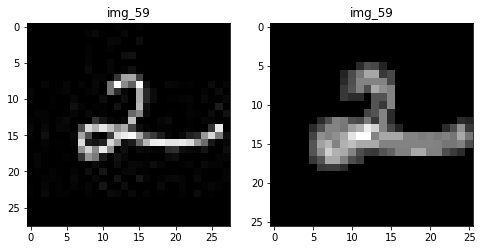

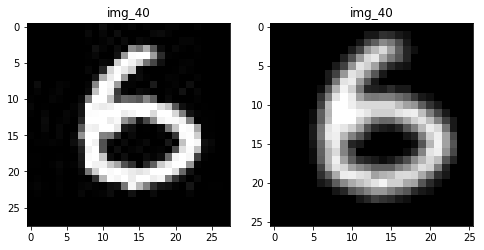

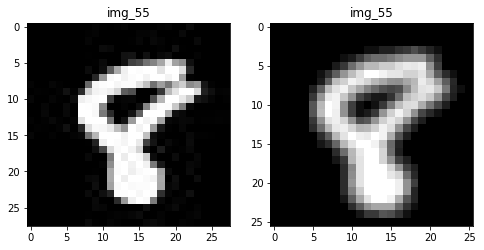

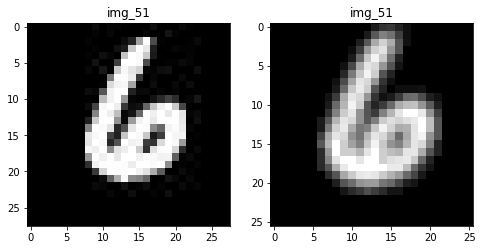

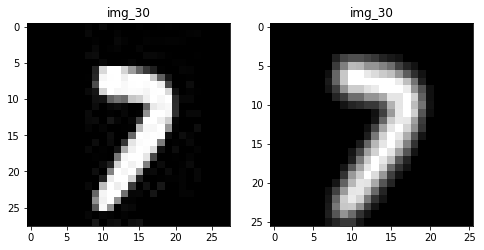

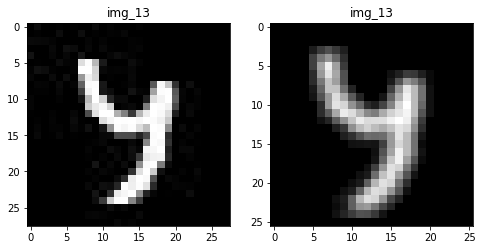

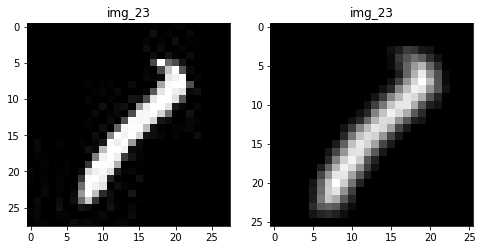

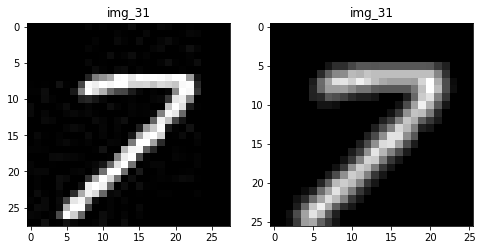

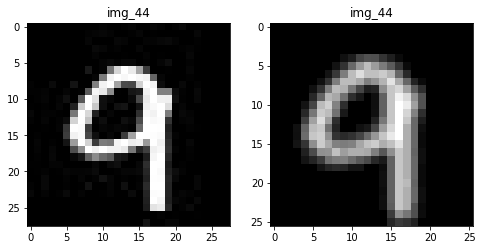

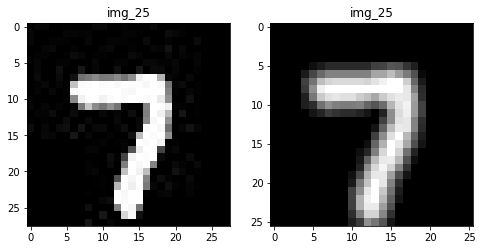

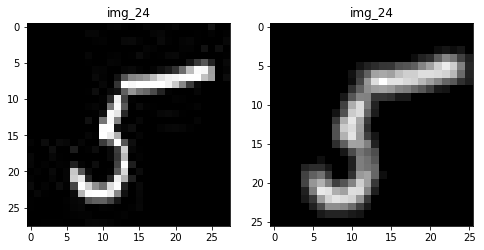

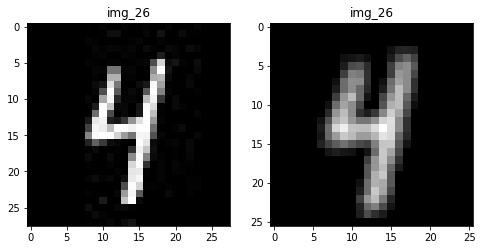

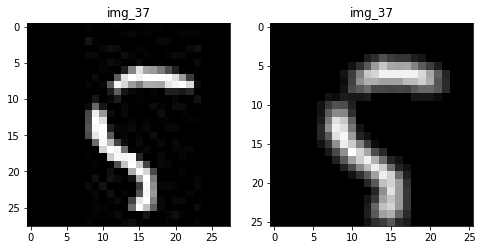

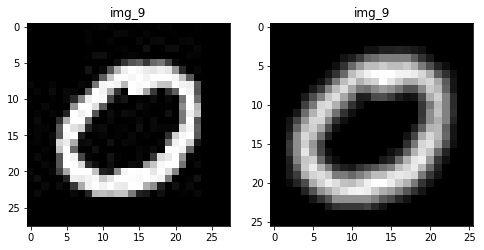

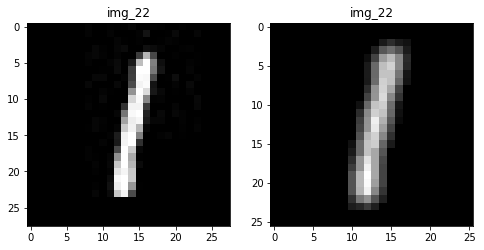

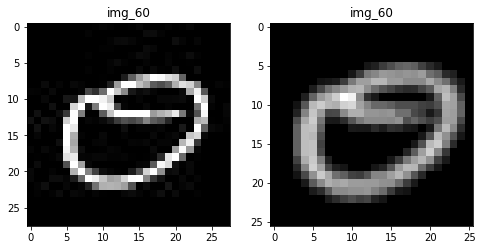

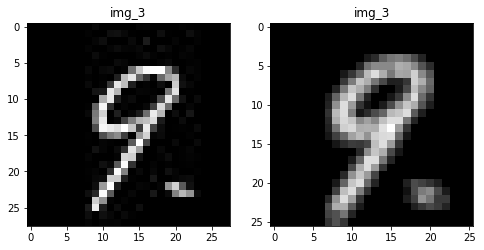

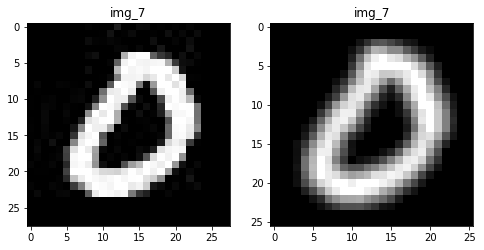

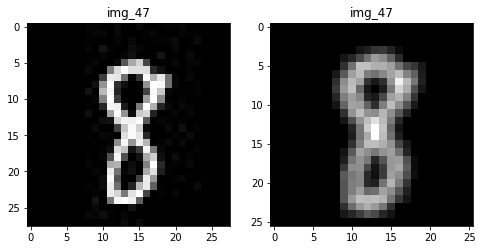

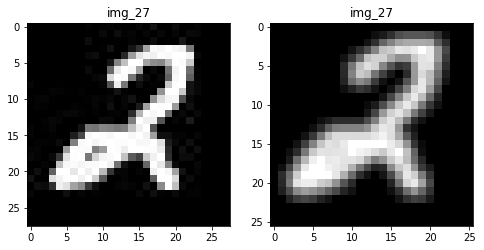

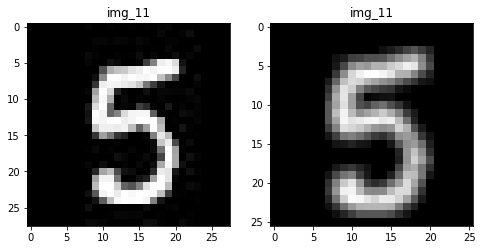

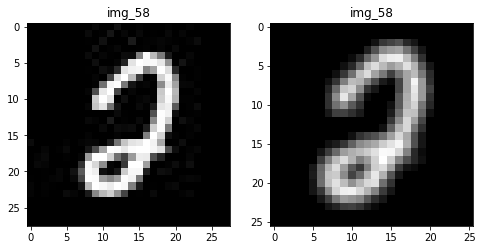

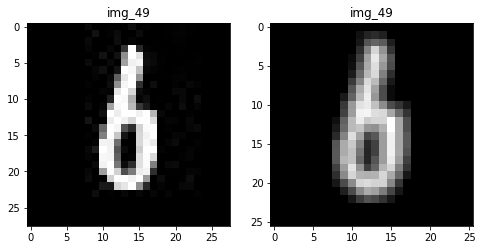

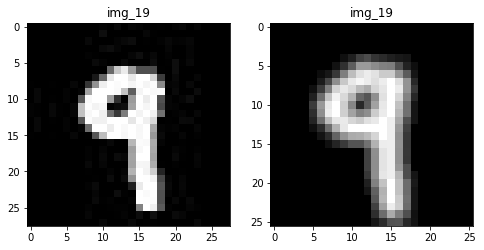

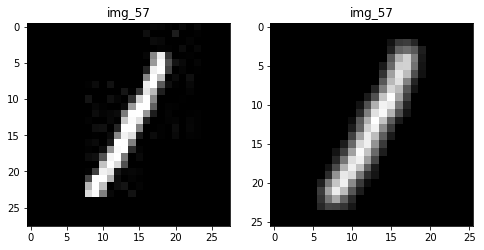

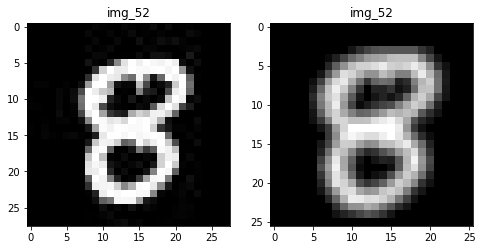

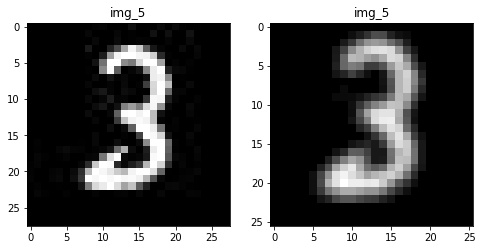

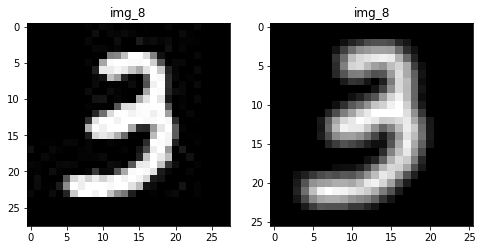

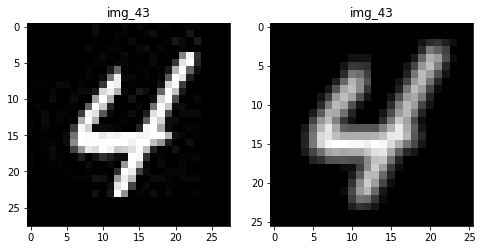

In [4]:
import json

processor_index = 0
with open('train.json', 'r') as f:
    image_names = json.load(f)
    
for image_name in image_names:
    metadata = image_names[image_name]
    
    idx = image_name.split('.')[0]
    feature_map = np.loadtxt('results/feature_maps/{}/{}.txt'.format(processor_index, idx))
    image = np.loadtxt('results/images/{}/{}.txt'.format(processor_index, idx))

    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    li = [0, image, feature_map]
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(idx)
        plt.imshow(li[i], cmap='gray')
    plt.show()

In [5]:
def loadtxt(folder, pid, img_name):
    return np.loadtxt('results/{}/{}/{}.txt'.format(folder, pid, img_name))

def sim(a, b):
    return np.sqrt(np.sum(abs(a - b)**2))

## Test for Convergence

In [12]:
img_dir = 'test/photos'
image_names = simulate_experience(img_dir)
pi = 0

for i, image_name in enumerate(image_names):
    if i == 0:
        last_idx = image_name.split('.')[0]
        continue
    idx = image_name.split('.')[0]
    a_fm = loadtxt('feature_maps', pi, idx)
    b_fm = loadtxt('feature_maps', pi, last_idx)
    fm_diff = sim(a_fm, b_fm) / sim(np.full(a_fm.shape, 255), 0)

    a_img = loadtxt('images', pi, last_idx)
    b_img = loadtxt('images', pi, idx)
    img_diff = sim(a_img, b_img) / sim(np.full(a_img.shape, 255), 0)

    print(image_name, fm_diff, img_diff)
    last_idx = idx

OSError: results/feature_maps/0/IMG_20190724_215614.txt not found.

In [ ]:
idx = "img_5"
pi = 9
feature_map = loadtxt('feature_maps', '0', idx)
image = loadtxt('images', pi, idx)
feature_map = loadtxt('images', pi, 'img_16')

In [ ]:
plt.imshow(image, cmap='gray')

In [ ]:
plt.imshow(feature_map, cmap='gray')

In [ ]:
a, b = 5, 9
feature_map.shape

In [ ]:
with open('train.json', 'r') as f:
    image_names = json.load(f)
    
li = list(image_names.values())
{d:li.count(d) for d in set(li)}

In [ ]:
feature_map[a:b, a:b]

In [ ]:
image[a:b, a:b]

In [ ]:
image - feature_map

In [ ]:
import numpy as np

# pn = np.array([[2,3,5],[7,11,13],[17,19,23]])
def c(m):
#     pn = np.array([[10, 100, 1_000],[10_000, 100_000, 1_000_000],[10_000_000, 100_000_000, 1_000_000_000]], dtype=np.int64)
    pn = np.array([[2, 3, 11],[5, 7, 17],[13, 19, 23]], dtype=np.int64)
    v = m*pn
    return np.sum(v)

n = 10
s = 256//n
for i in range(0, 256, s):
    m = np.full((3,3), i)
    z = c(m)
    print('{:>3} {:>12}'.format(i, z))

In [ ]:
m1 = np.array([[0,0,0],[0,0,0],[0,0,1]])
m2 = np.array([[0,0,0],[0,0,1],[0,0,0]])
m3 = np.array([[0,0,0],[0,0,0],[0,1,0]])
m4 = np.array([[0,0,0],[0,0,1],[0,0,1]])
m5 = np.array([[0,0,0],[0,0,0],[0,1,1]])
m6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
m7 = np.array([[0,0,0],[0,0,1],[0,1,1]])

for k in [m1,m2,m3,m4,m5,m6,m7]:
    z = c(k)
    print('{:>3} {:>12} {:>12}'.format(i, z, np.linalg.det(k)))

In [ ]:
print('{:>3} {:>12}'.format(i, c(np.array([[0,0,0],[0,0,0],[0,0,1]]))))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time

def simulate_sight():
    # the image paths
    image_template = np.zeros((28, 28, 3))

    start_i = 0
    for i in range(1, (28//7)+1):
        end_i = i*7

        start_j = 0
        for j in range(1, (28//7)+1):
            end_j = j*7
            
            image = image_template.copy()
            image[start_i:end_i, start_j:end_j] = 255

            start_j = end_j
            yield 'nameless_{}.jpg'.format(time.time()), image

        start_i = end_i
        
for i, x in enumerate(simulate_sight()):
    image_name, image = x
    idx = str(i)
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 1
    rows = 1
    li = [0, image]
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(idx)
        plt.imshow(li[i])
    plt.show()

In [122]:
import cv2

In [123]:
def load_image(image_path):
	image = cv2.imread(image_path)
	image = image[...,::-1]
	image = np.array(image, dtype='int64')
	return image

def toGrey(img, r=1/3, g=1/3, b=1/3):
# def toGrey(img, r=0.299, g=0.587, b=0.114):
	s = img.shape
	if len(s) == 2 or (len(s) == 3 and s[-1] < 3):
		return img
	return np.add(b*img[:, :, 0], g*img[:, :, 1], r*img[:, :, 2])


In [124]:
import cv2
import numpy as np

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    return labeled_img


In [153]:
# img = toGrey(load_image('dump/75oB8.png'))
img = toGrey(load_image('dump/image.jpg'))
img[img < 13] = 255
# img[(img > 50) & (img < 150)] = 255
# img[img > 150] = 255
img[img != 255] = 0
img = img.astype(np.uint8)


# img = cv2.imread('dump/b.jpg', -1)
# img = np.uint8(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, labels = cv2.connectedComponents(img)
labeled_img = imshow_components(labels)
np.amax(labels)

183

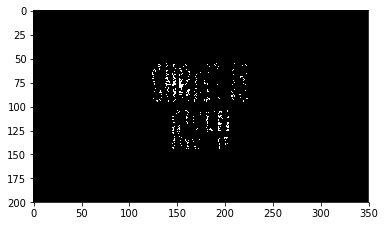

In [154]:
plt.imshow(img, cmap='gray')
# img

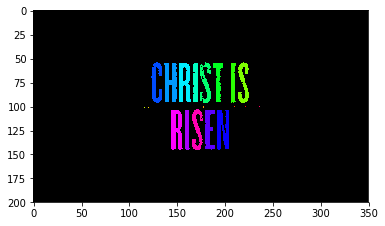

In [127]:
plt.imshow(labeled_img, cmap='gray')
# img

In [328]:
image_1d = np.array([0], dtype=np.float64)
for image_name in ['ds4s2.png', 'b.jpg', 'image.jpg', '75oB8.png']:
    image_1d = np.append(image_1d, toGrey(load_image('dump/{}'.format(image_name))))

In [336]:
# image_name = '75oB8.png'
image_name = 'image.jpg'
# image_name = 'b.jpg'
# image_name = 'semicolon.png'
# image_name = 'ds4s2.png'

image = load_image('dump/{}'.format(image_name))
image = toGrey(image)
# image_1d = image.flatten()

In [337]:
image_1d_sorted = np.sort(image_1d)
image_1d_sorted_unique = np.unique(image_1d_sorted)

diff = image_1d_sorted
diffx = image_1d_sorted_unique
diffx_freq = np.array([len(diff[diff == iu]) for iu in diffx], dtype=np.float64)
a, b = np.amin(diffx_freq), np.amax(diffx_freq)

# diffx = diffx[diffx_freq >= 0.01*len(image_1d)]
# diffx_freq = diffx_freq[diffx_freq >= 0.01*len(image_1d)]

diffx_freq_mean = diffx_freq.mean()
diffx_freq_std = diffx_freq.std()

diffx_freq_mmean = diffx_freq[diffx_freq < diffx_freq_mean].mean()
diffx_freq_mmmean = diffx_freq[diffx_freq > diffx_freq_mean].mean()

# diffx = diffx[(diffx_freq >= diffx_freq_mmean) & (diffx_freq <= diffx_freq_mean)]
# diffx_freq = diffx_freq[(diffx_freq >= diffx_freq_mmean) & (diffx_freq <= diffx_freq_mean)]

r1, r2 = (diffx_freq_std/abs(a-b)), 0
diffx = diffx[diffx_freq >= (r1*diffx_freq_mean) + (r2*diffx_freq_std)]
diffx_freq = diffx_freq[diffx_freq >= (r1*diffx_freq_mean) + (r2*diffx_freq_std)]

for i in range(len(diffx)):
    print('pixel = {:.4f}, count = {}'.format(diffx[i], diffx_freq[i]))

image_1dx = diffx.copy()
diff = abs(np.diff(image_1dx))

meancd = diff.mean()
stdcd = diff.std()

(diff.mean(), diff.std(), diff.mean()+diff.std()), (diff[diff > 0].mean(), diff[diff > 0].std(), diff[diff > 0].mean()+diff[diff > 0].std()), (diffx_freq_mean, diffx_freq_mmean, diffx_freq_mmmean, image_1d.shape)

pixel = 0.0000, count = 29588.0
pixel = 0.3333, count = 2128.0
pixel = 0.6667, count = 1290.0
pixel = 1.0000, count = 1052.0
pixel = 1.3333, count = 837.0
pixel = 1.6667, count = 1682.0
pixel = 2.0000, count = 360.0
pixel = 2.0000, count = 383.0
pixel = 2.3333, count = 469.0
pixel = 2.3333, count = 158.0
pixel = 2.6667, count = 231.0
pixel = 3.0000, count = 39.0
pixel = 3.0000, count = 201.0
pixel = 3.3333, count = 111.0
pixel = 3.3333, count = 127.0
pixel = 3.6667, count = 173.0
pixel = 4.0000, count = 216.0
pixel = 4.3333, count = 128.0
pixel = 4.6667, count = 148.0
pixel = 5.0000, count = 79.0
pixel = 5.0000, count = 138.0
pixel = 5.3333, count = 201.0
pixel = 5.6667, count = 119.0
pixel = 6.0000, count = 142.0
pixel = 6.3333, count = 68.0
pixel = 6.3333, count = 125.0
pixel = 6.6667, count = 113.0
pixel = 6.6667, count = 94.0
pixel = 7.0000, count = 251.0
pixel = 7.3333, count = 142.0
pixel = 7.6667, count = 121.0
pixel = 7.6667, count = 43.0
pixel = 8.0000, count = 171.0
pixel = 8

((0.302491103202847, 0.1025462814431114, 0.4050373846459584),
 (0.302491103202847, 0.1025462814431114, 0.4050373846459584),
 (968.3138888888889, 166.17481481481482, 13000.4, (697186,)))

In [338]:
diffx_freq_std, a, b, diffx_freq_std/abs(a-b)

(17991.144833680642, 1.0, 482371.0, 0.03729739584485072)

In [339]:
# the clusters
clusters = []

a = 0
class_pop = []
cp = 0
for i in range(len(diff)):
    cp += len(image_1d[image_1d == image_1dx[i]])
#     print(diff[i], meancd)
#     print("class {}: diff = {}, m =[{}, {}]\n{}".format(len(clusters), diff[i], diff[diff>0].mean(), meancd, image_1d[i+1]))
    if diff[i] >= meancd or i == len(diff)-1:
        b = i+1

        # save a cluster
        clusters.append((a, b))
        class_pop.append(cp)
        cp = 0

        print('class {}: {} element(s)\n {}\n'.format(len(clusters), b-a, image_1dx[a:b]))
        
        a = b
        
        
class_pop = np.array(class_pop, dtype=np.float64)
print(meancd, 'mean')


class 1: 1 element(s)
 [0.]

class 2: 1 element(s)
 [0.33333333]

class 3: 1 element(s)
 [0.66666667]

class 4: 1 element(s)
 [1.]

class 5: 1 element(s)
 [1.33333333]

class 6: 1 element(s)
 [1.66666667]

class 7: 2 element(s)
 [2. 2.]

class 8: 2 element(s)
 [2.33333333 2.33333333]

class 9: 1 element(s)
 [2.66666667]

class 10: 2 element(s)
 [3. 3.]

class 11: 2 element(s)
 [3.33333333 3.33333333]

class 12: 1 element(s)
 [3.66666667]

class 13: 1 element(s)
 [4.]

class 14: 1 element(s)
 [4.33333333]

class 15: 1 element(s)
 [4.66666667]

class 16: 2 element(s)
 [5. 5.]

class 17: 1 element(s)
 [5.33333333]

class 18: 1 element(s)
 [5.66666667]

class 19: 1 element(s)
 [6.]

class 20: 2 element(s)
 [6.33333333 6.33333333]

class 21: 2 element(s)
 [6.66666667 6.66666667]

class 22: 1 element(s)
 [7.]

class 23: 1 element(s)
 [7.33333333]

class 24: 2 element(s)
 [7.66666667 7.66666667]

class 25: 1 element(s)
 [8.]

class 26: 1 element(s)
 [8.33333333]

class 27: 1 element(s)
 [8.66

class 278: 1 element(s)
 [92.33333333]

class 279: 1 element(s)
 [92.66666667]

class 280: 1 element(s)
 [93.]

class 281: 1 element(s)
 [93.33333333]

class 282: 1 element(s)
 [93.66666667]

class 283: 1 element(s)
 [94.]

class 284: 1 element(s)
 [94.33333333]

class 285: 1 element(s)
 [94.66666667]

class 286: 1 element(s)
 [95.]

class 287: 1 element(s)
 [95.33333333]

class 288: 1 element(s)
 [95.66666667]

class 289: 1 element(s)
 [96.]

class 290: 1 element(s)
 [96.33333333]

class 291: 1 element(s)
 [96.66666667]

class 292: 1 element(s)
 [97.]

class 293: 1 element(s)
 [97.33333333]

class 294: 1 element(s)
 [97.66666667]

class 295: 1 element(s)
 [98.]

class 296: 1 element(s)
 [98.33333333]

class 297: 1 element(s)
 [98.66666667]

class 298: 1 element(s)
 [99.]

class 299: 1 element(s)
 [99.33333333]

class 300: 1 element(s)
 [99.66666667]

class 301: 1 element(s)
 [100.]

class 302: 1 element(s)
 [100.33333333]

class 303: 1 element(s)
 [100.66666667]

class 304: 1 element(

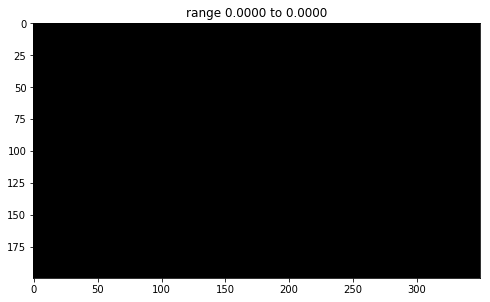

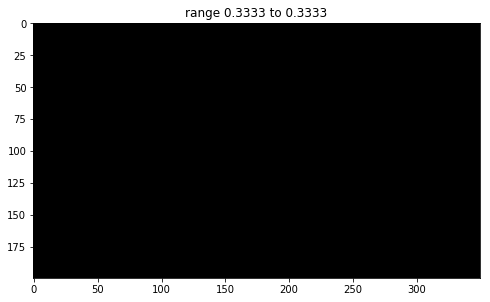

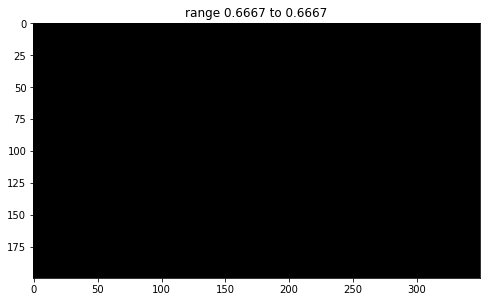

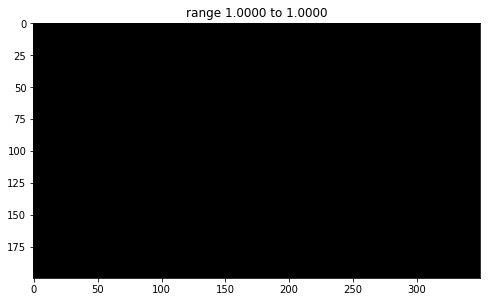

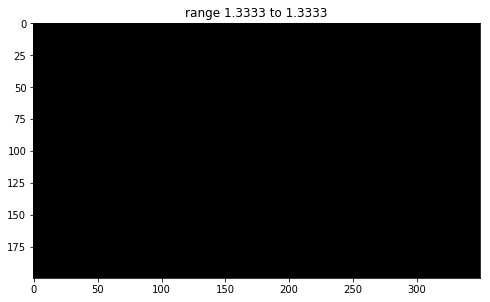

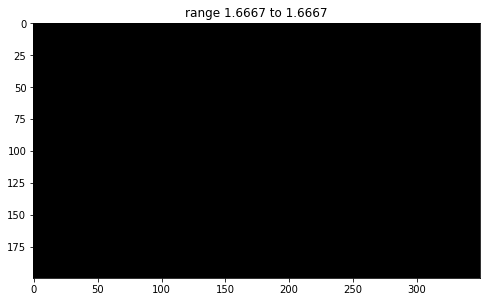

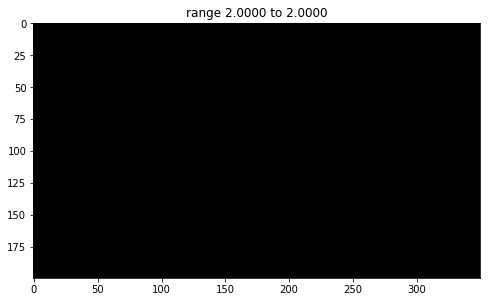

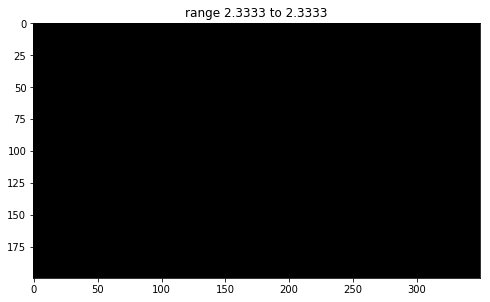

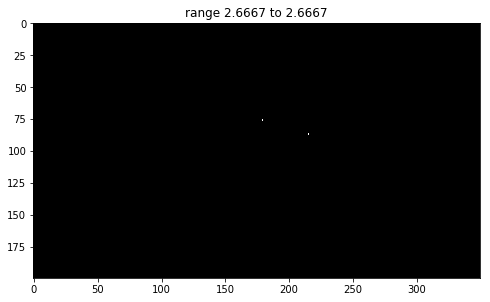

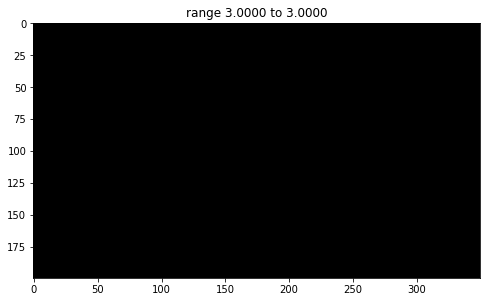

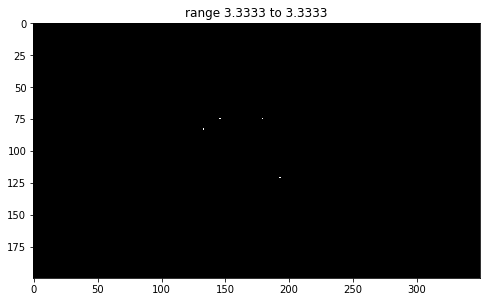

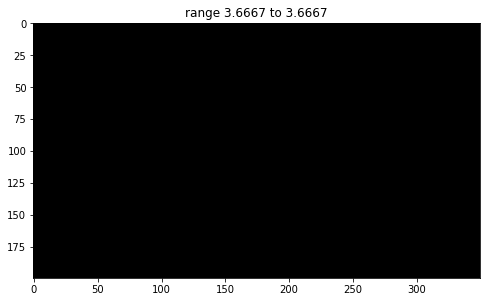

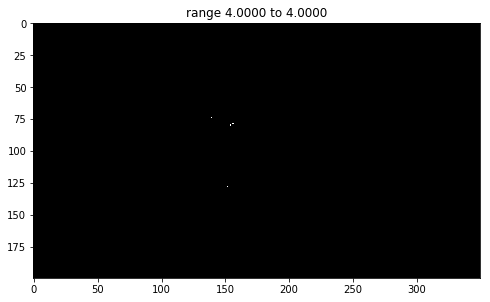

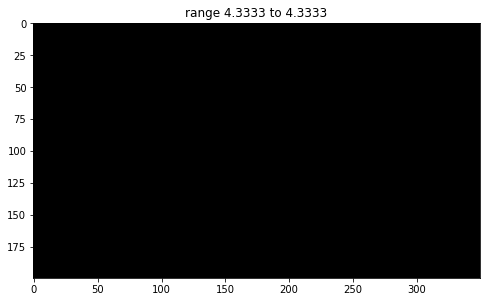

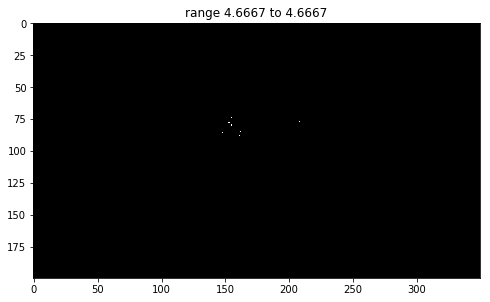

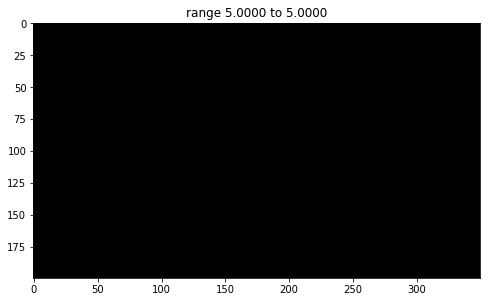

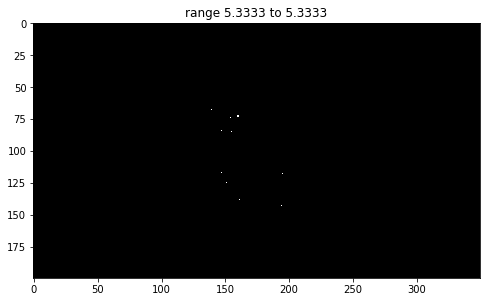

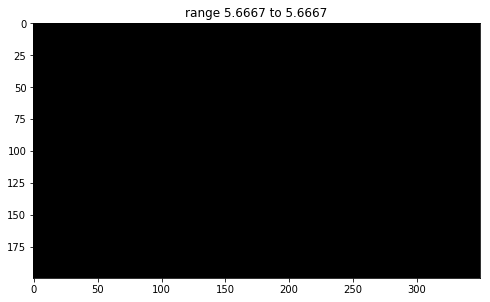

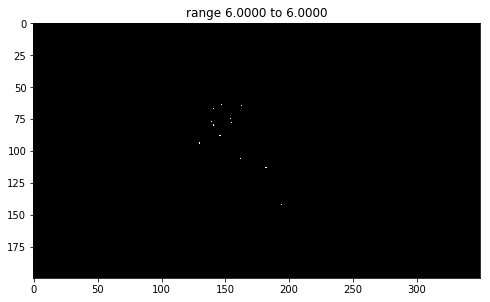

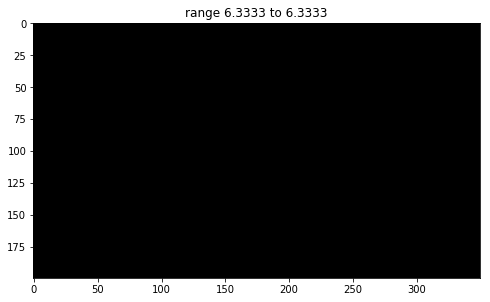

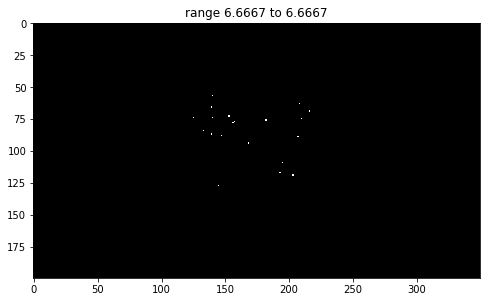

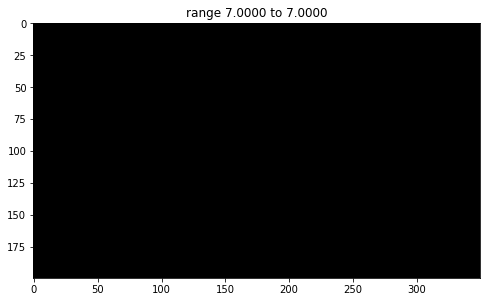

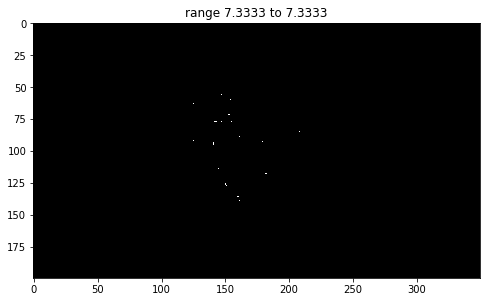

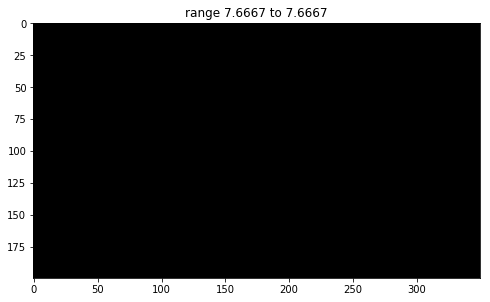

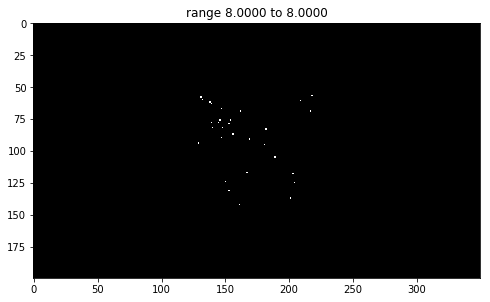

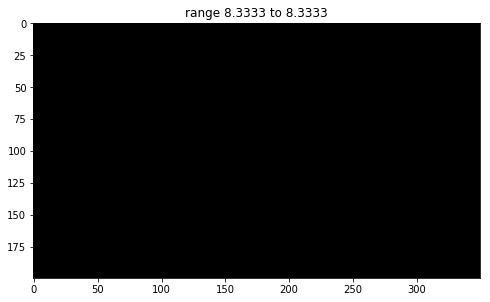

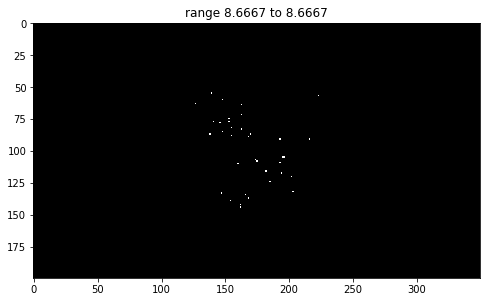

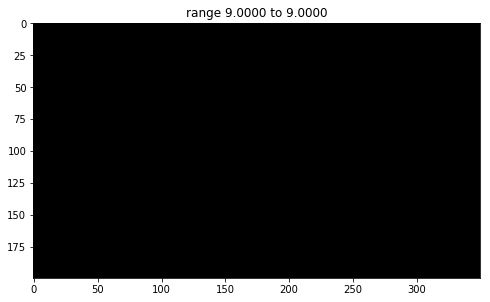

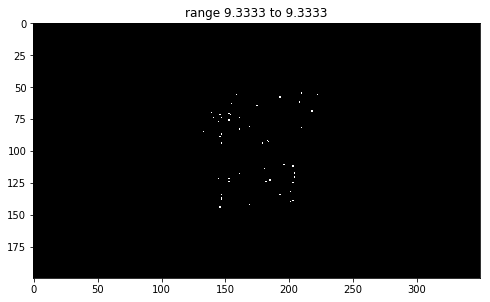

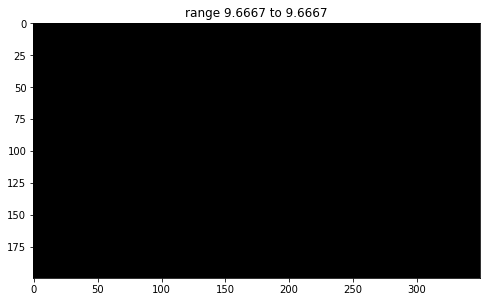

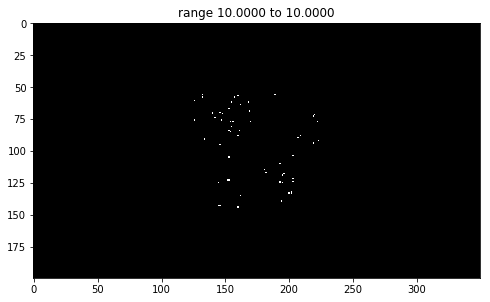

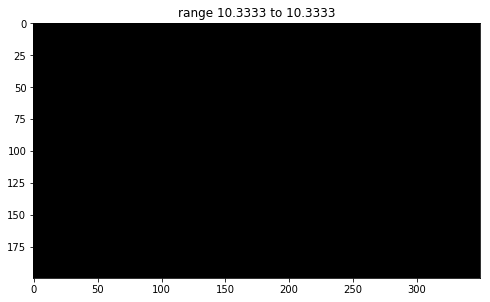

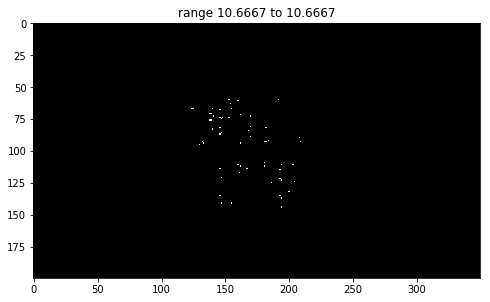

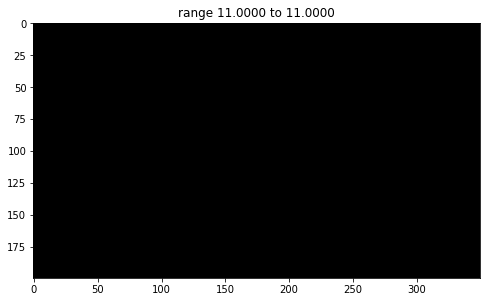

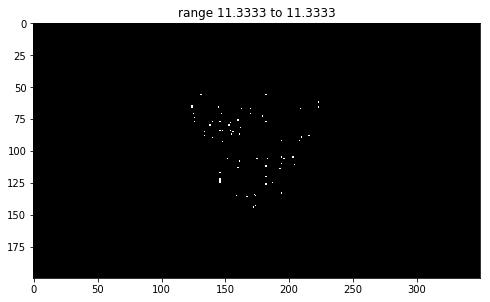

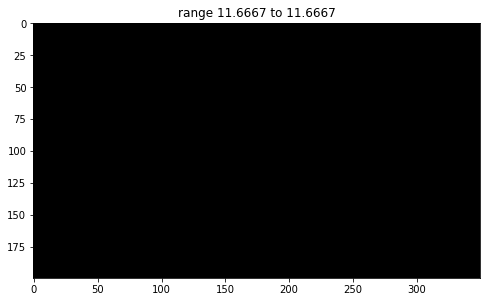

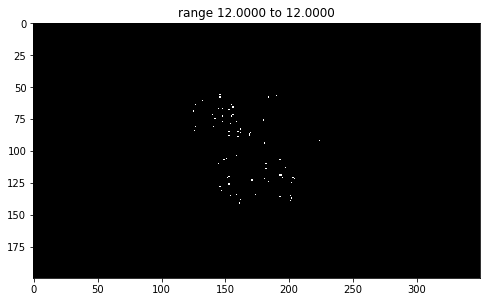

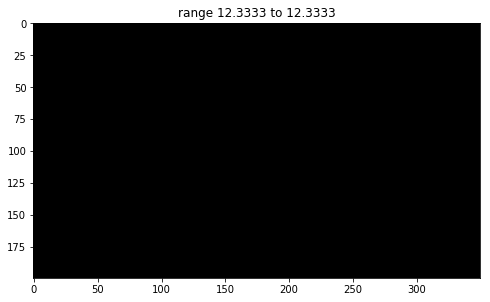

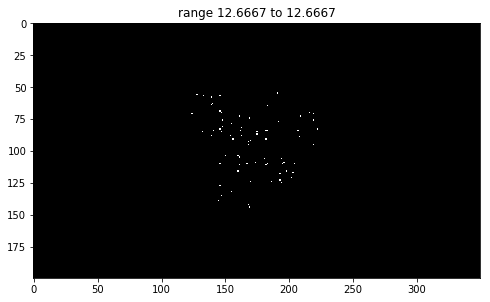

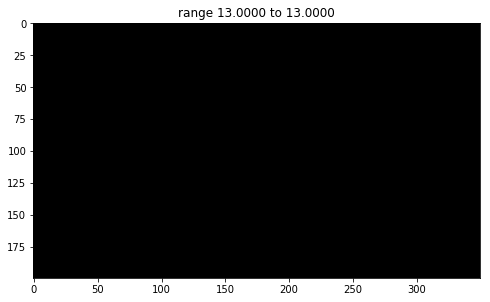

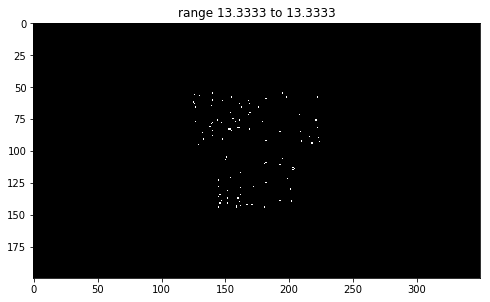

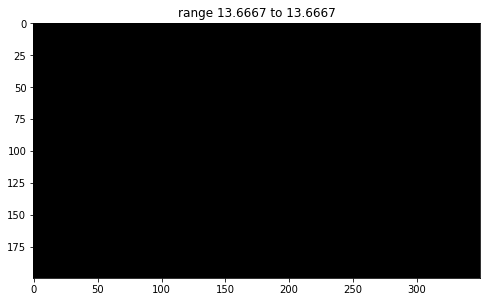

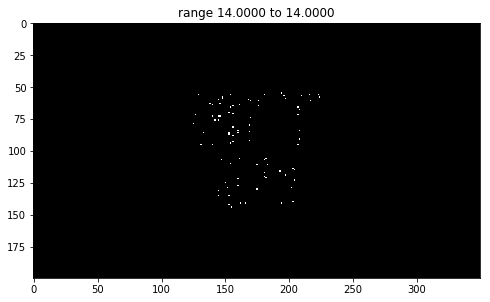

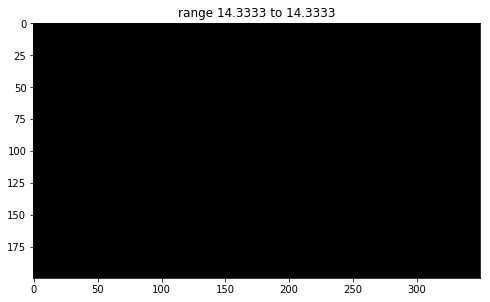

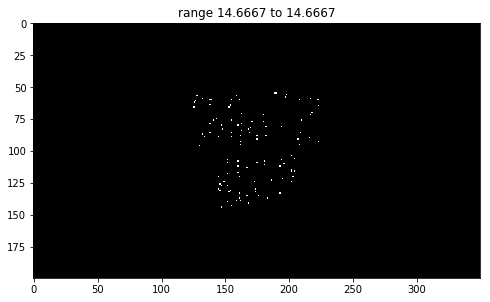

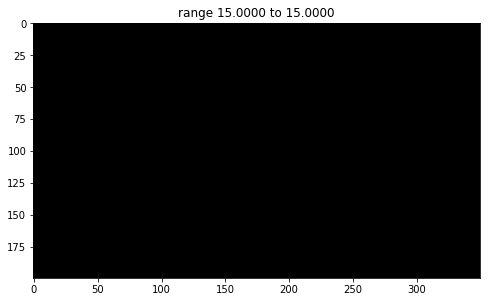

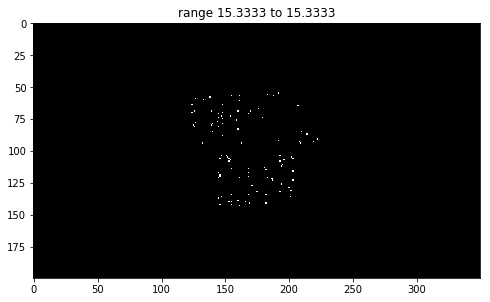

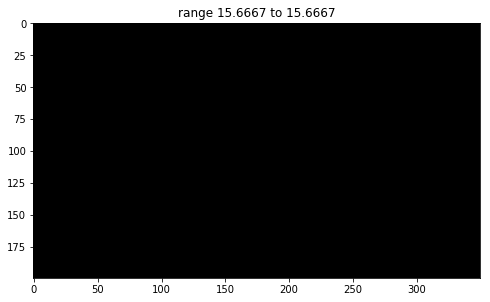

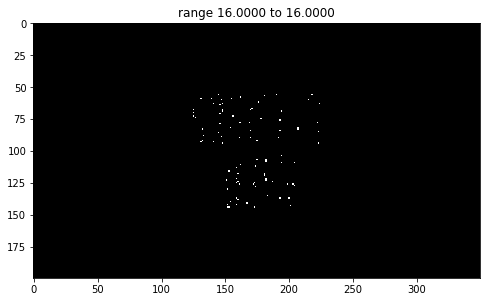

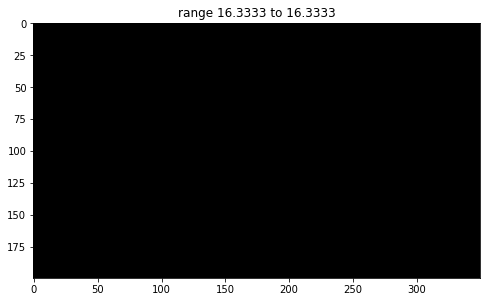

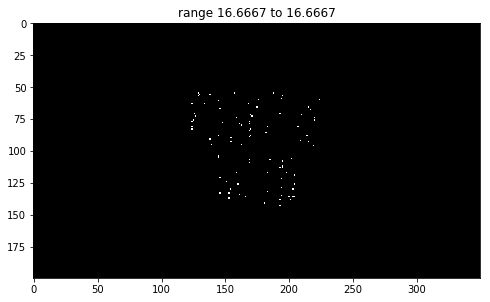

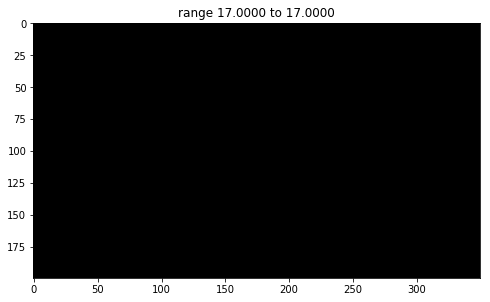

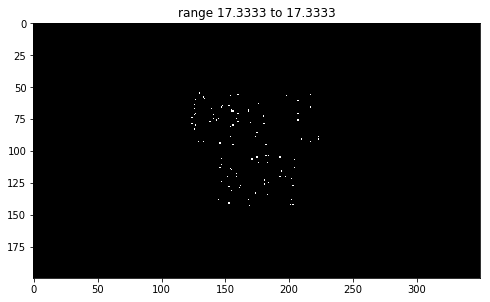

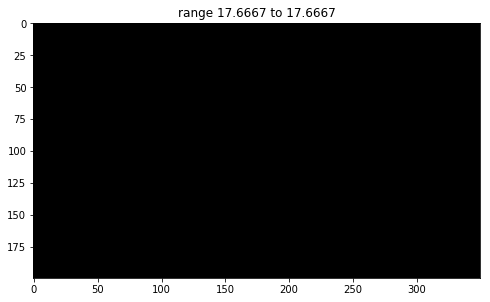

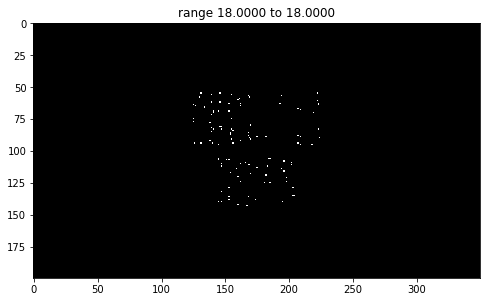

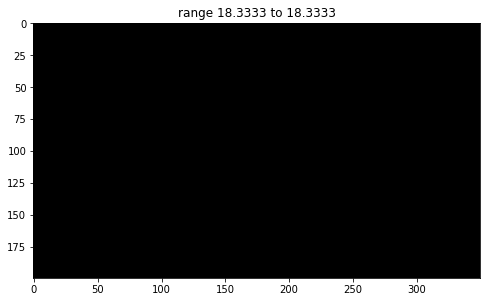

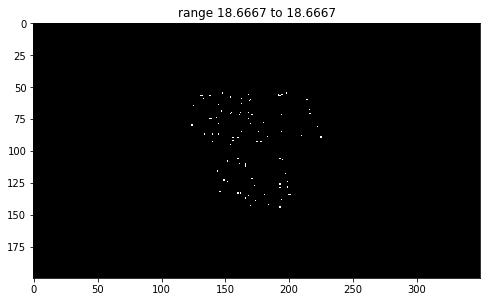

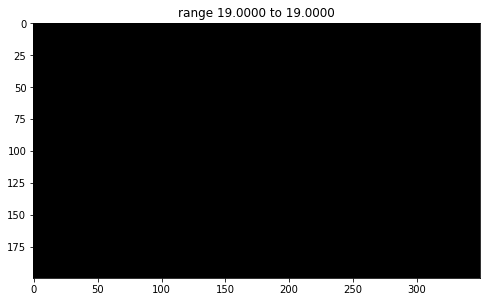

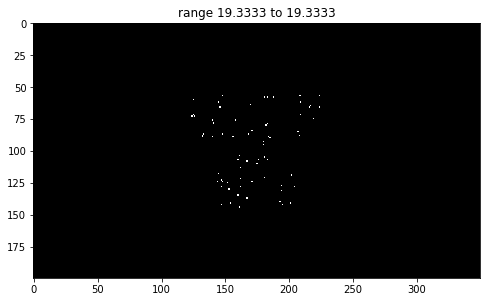

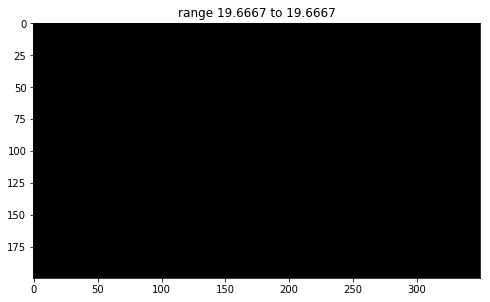

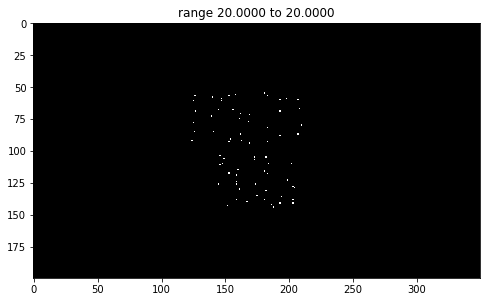

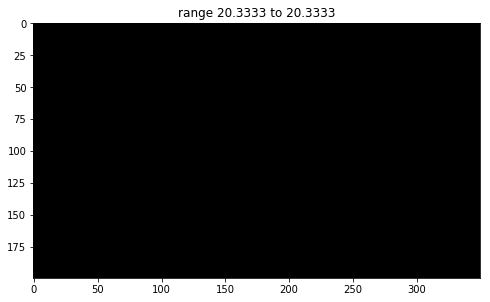

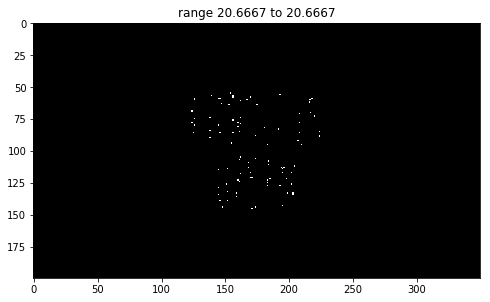

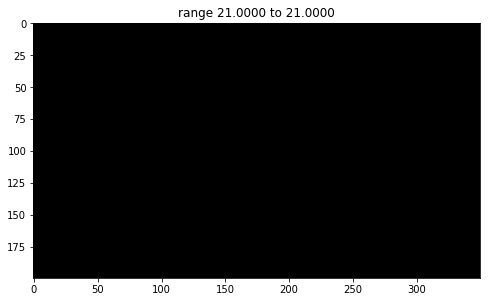

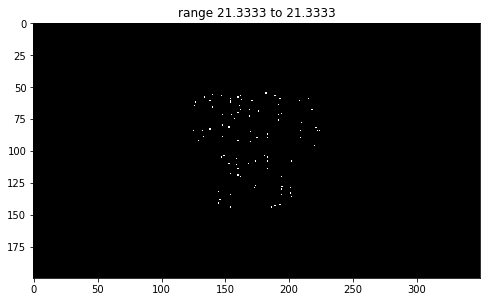

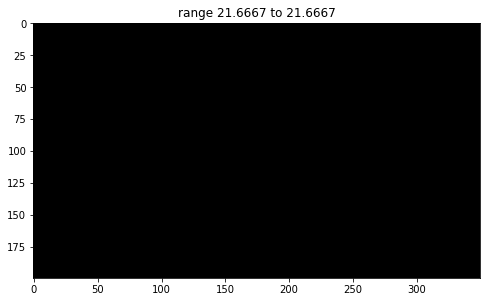

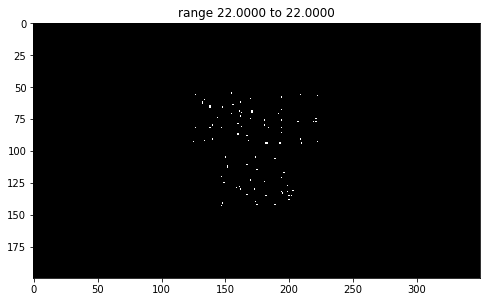

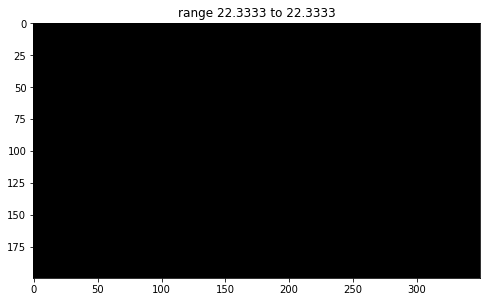

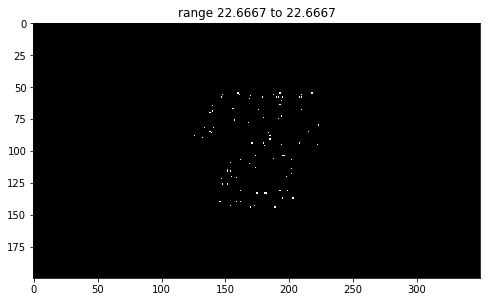

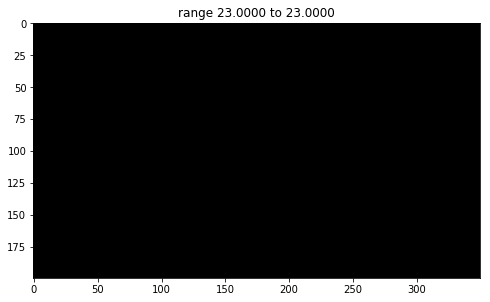

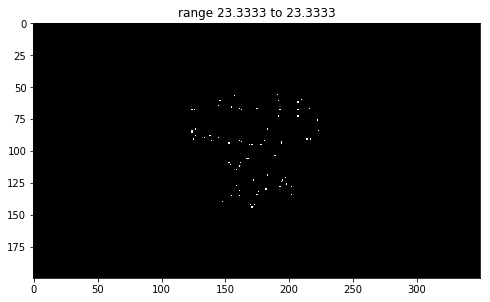

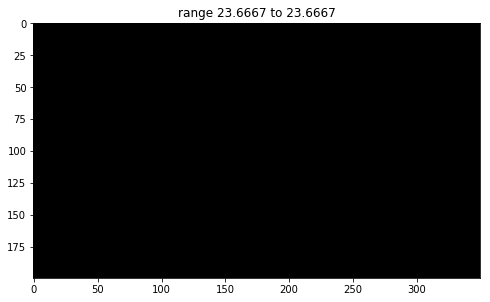

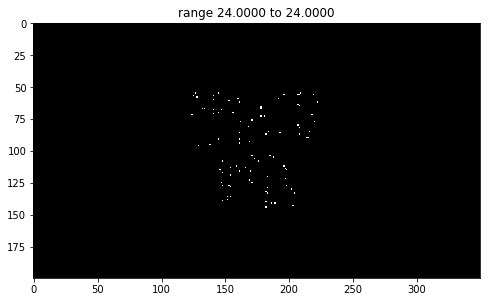

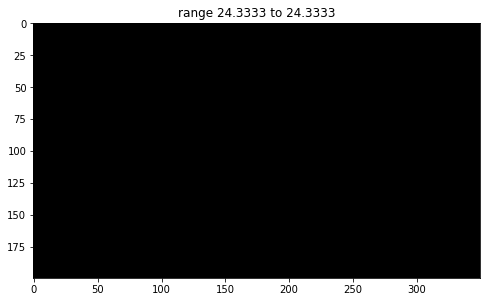

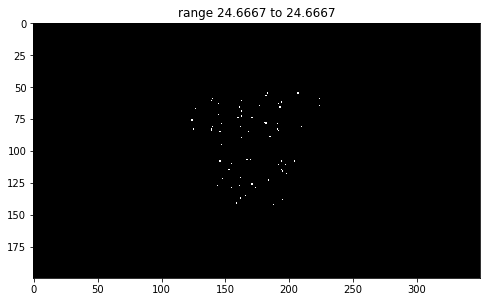

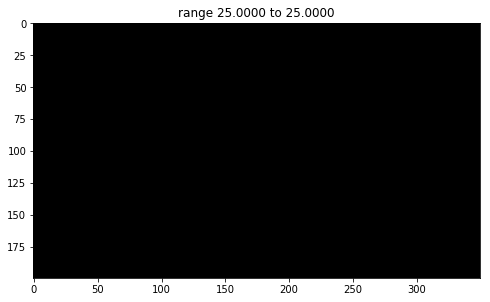

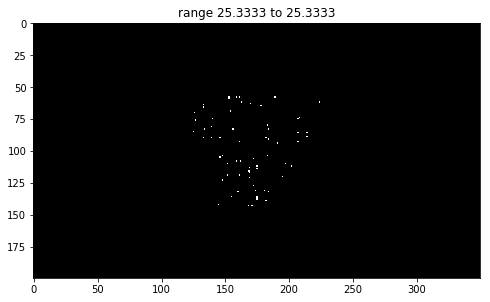

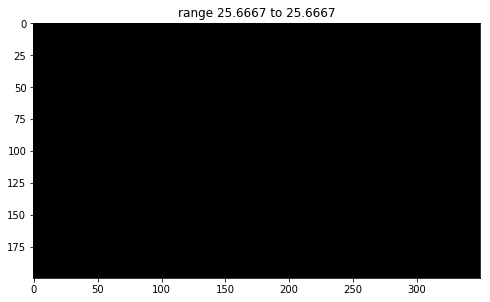

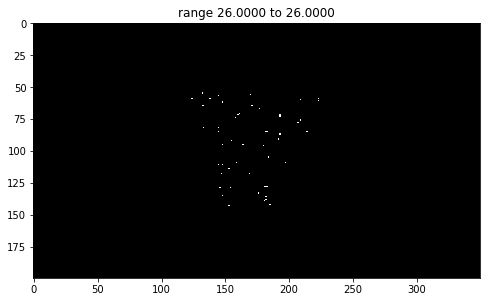

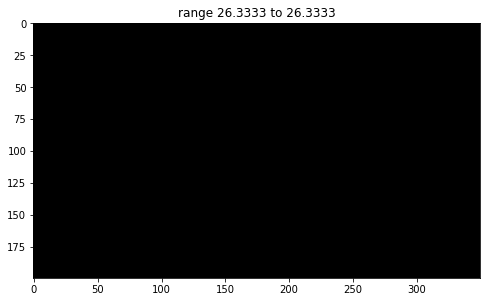

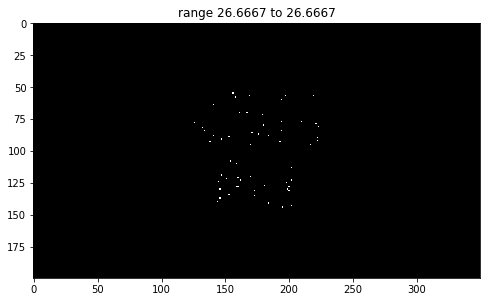

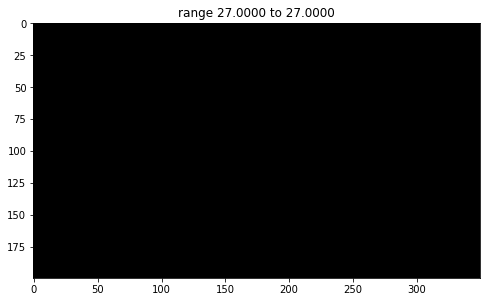

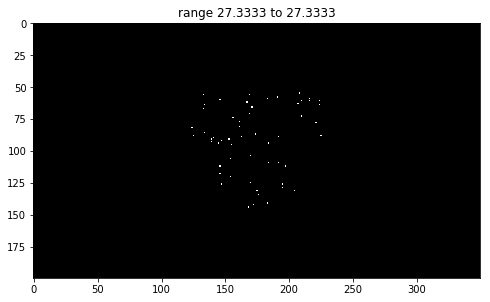

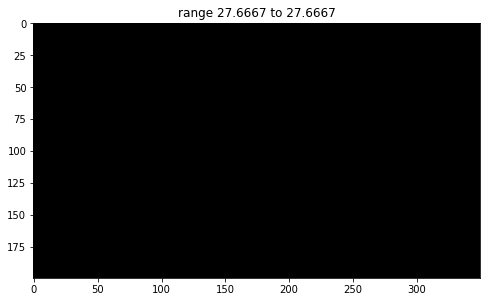

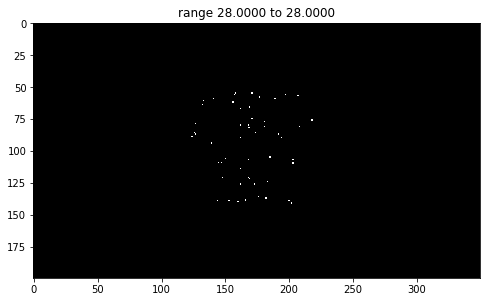

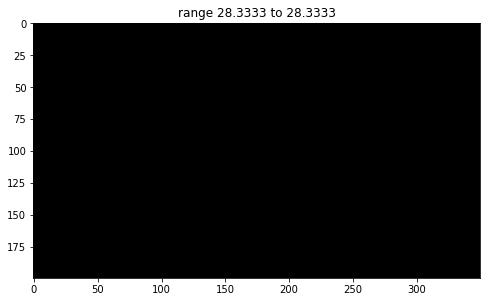

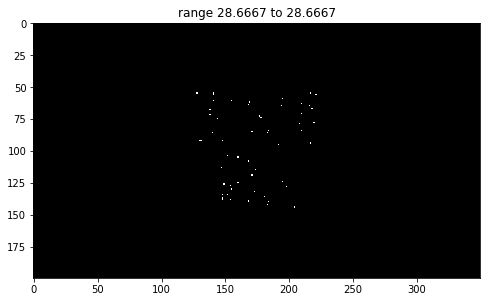

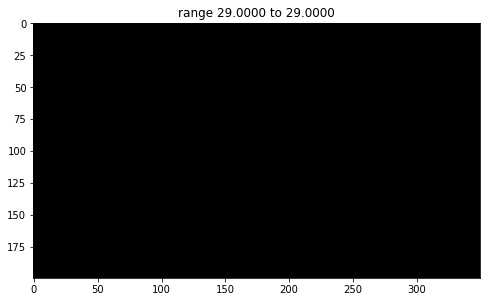

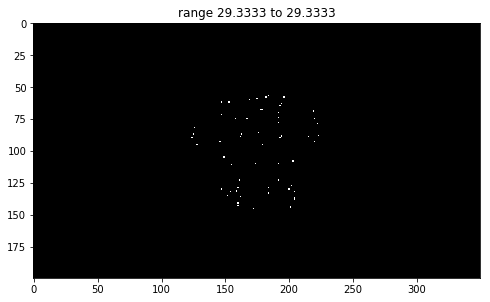

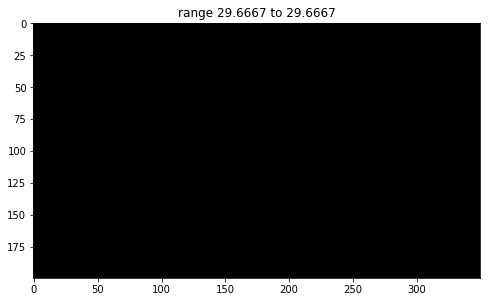

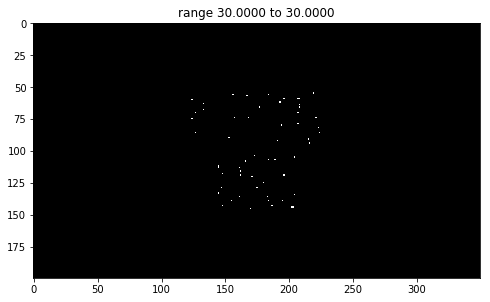

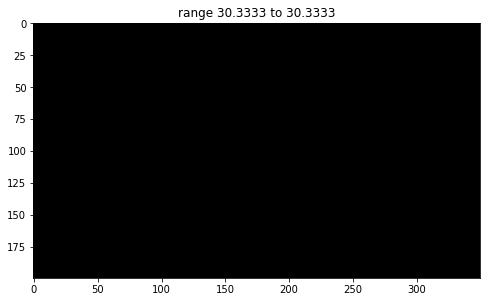

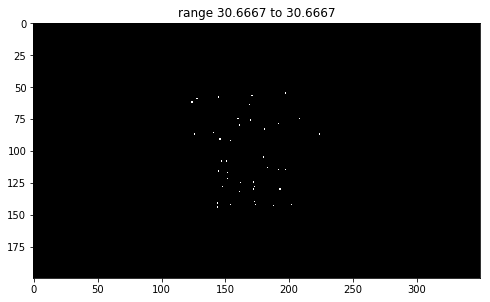

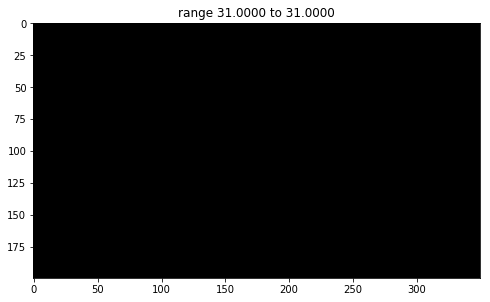

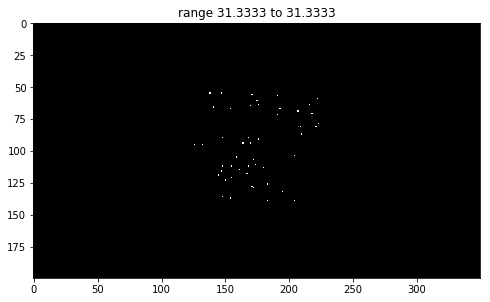

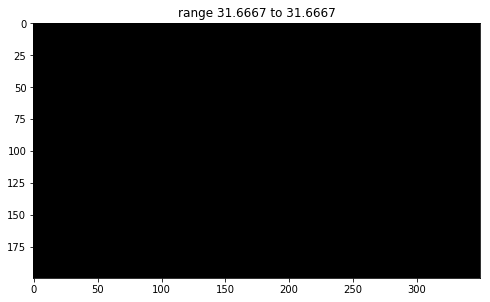

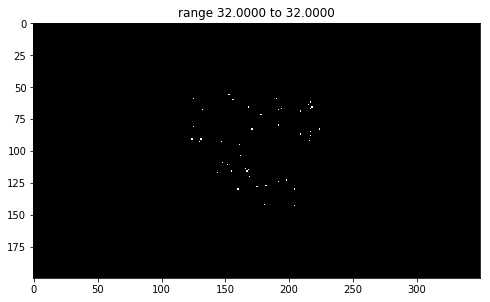

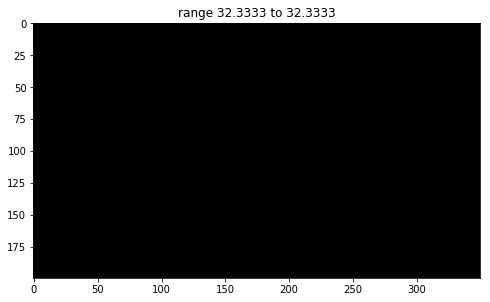

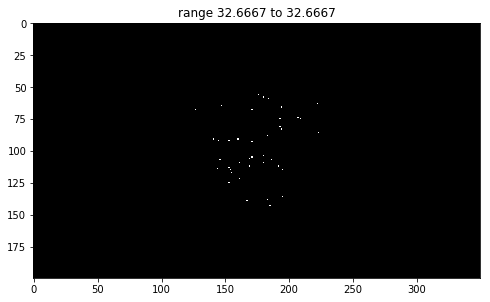

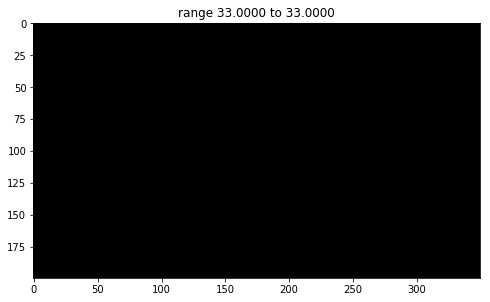

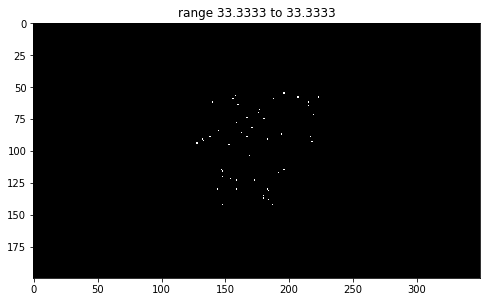

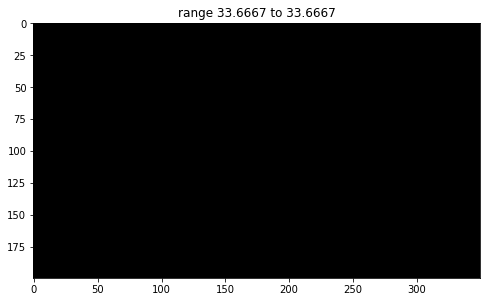

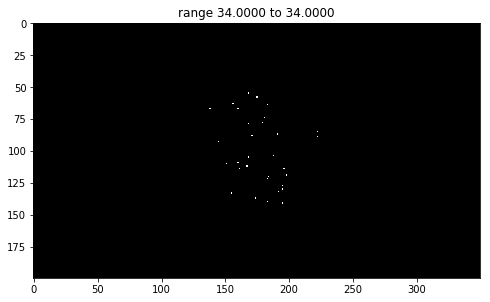

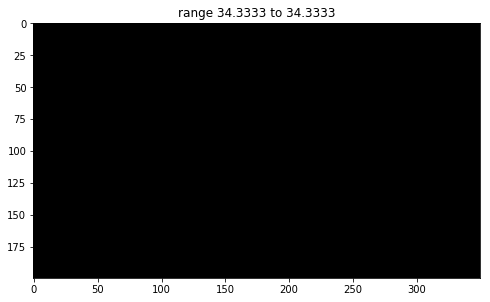

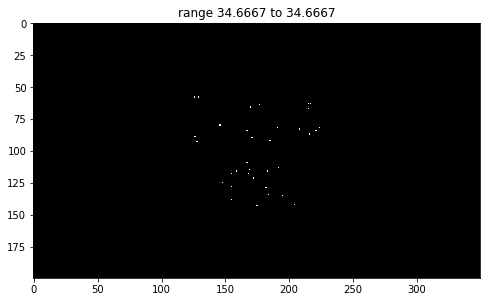

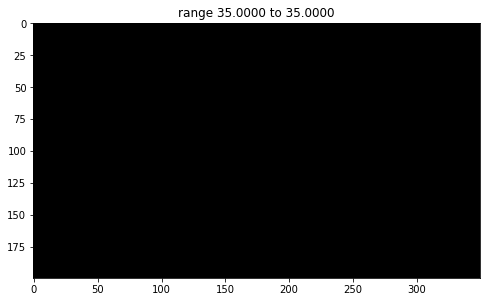

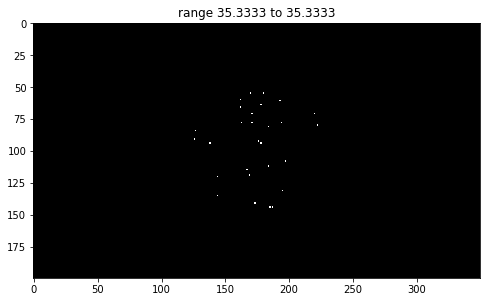

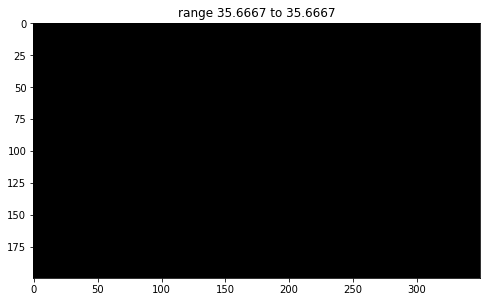

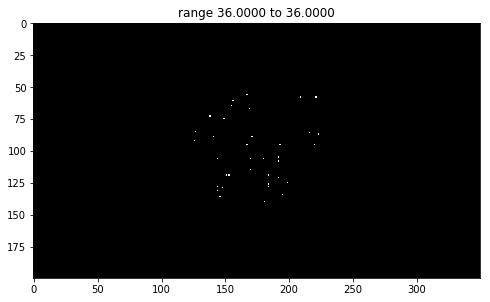

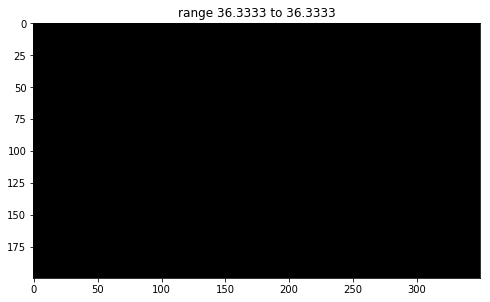

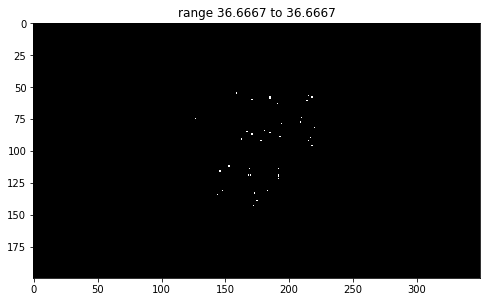

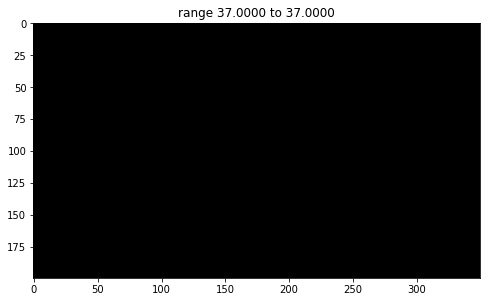

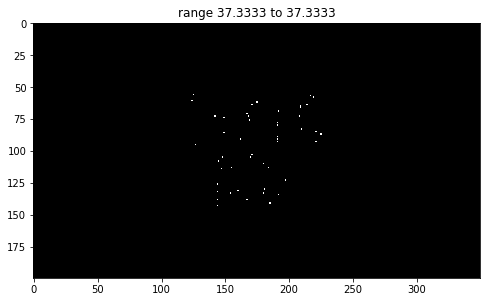

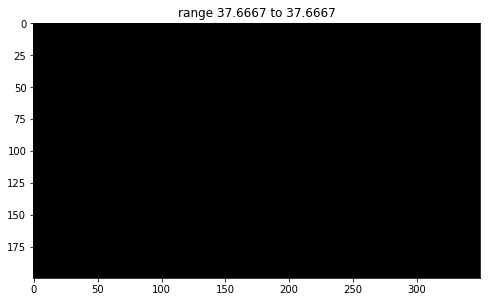

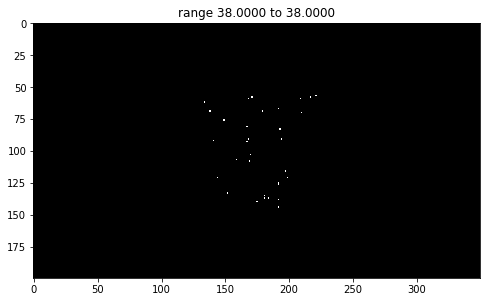

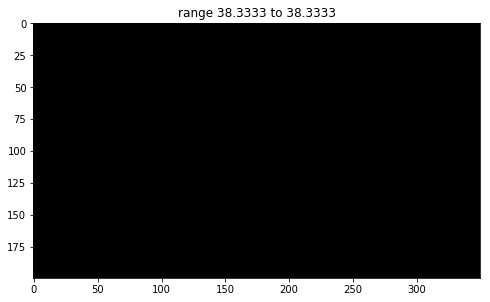

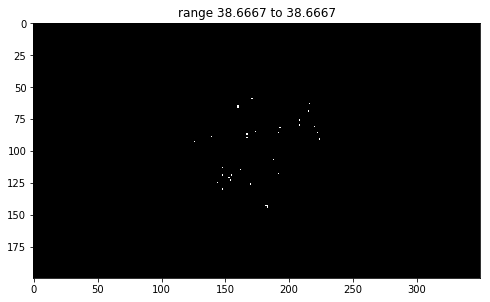

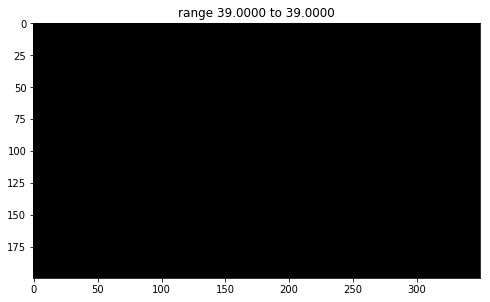

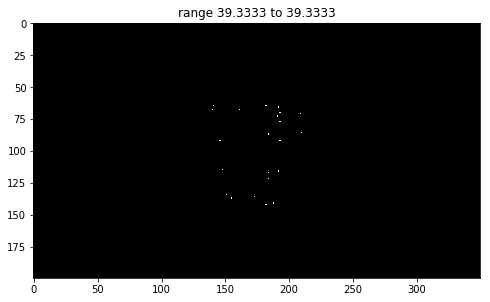

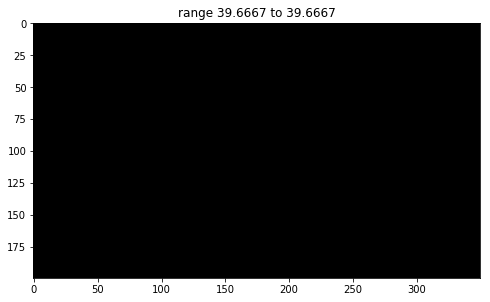

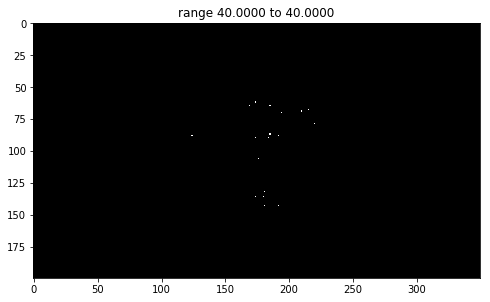

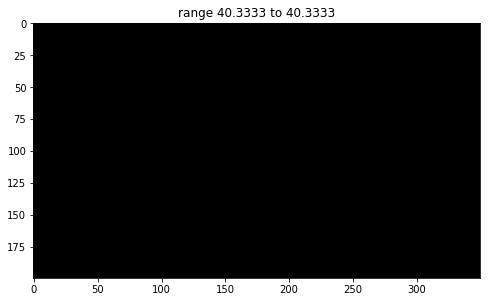

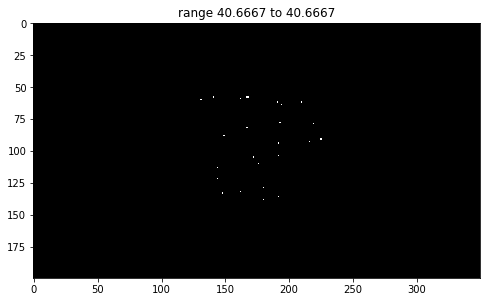

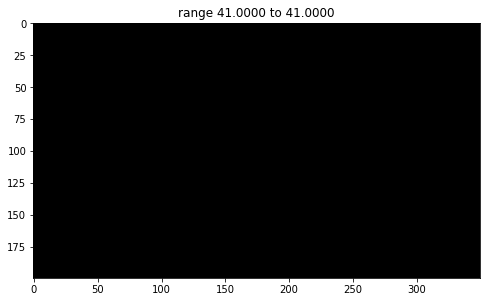

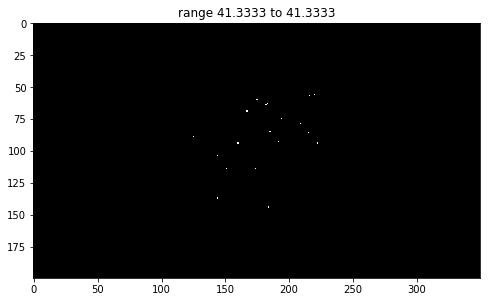

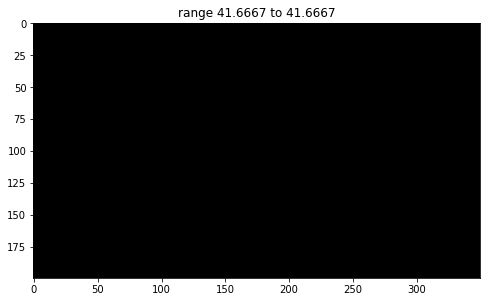

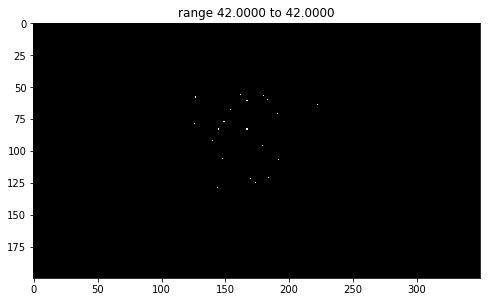

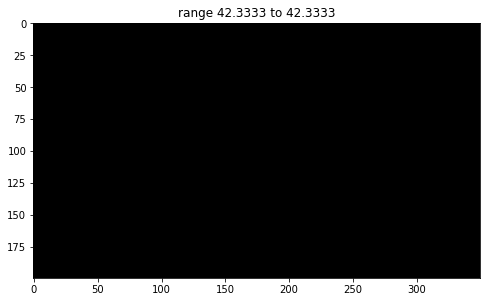

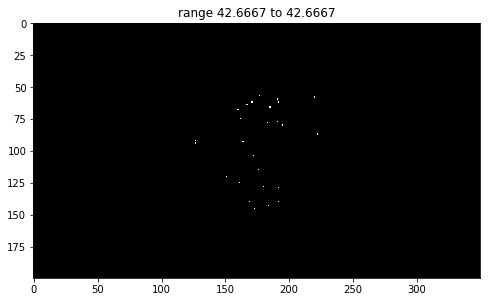

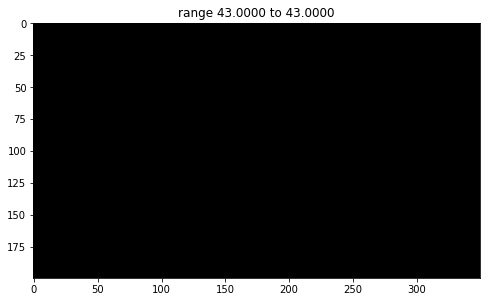

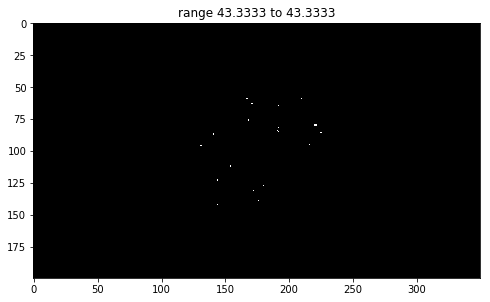

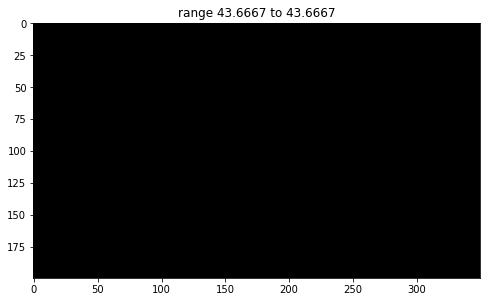

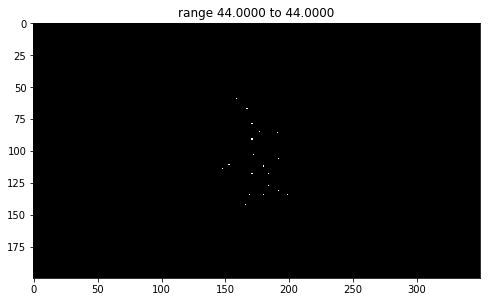

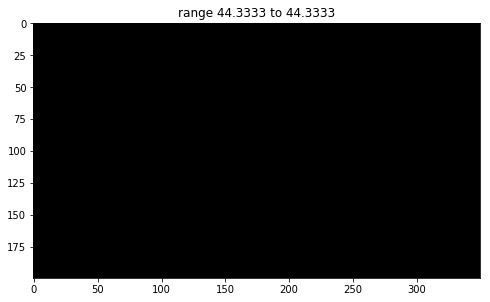

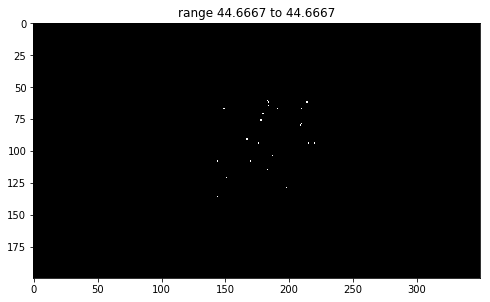

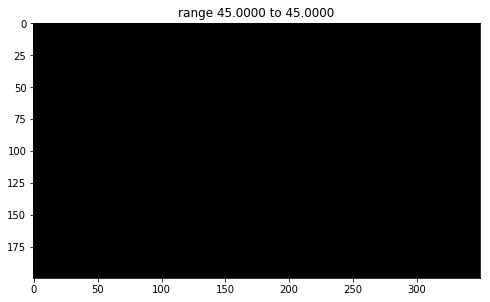

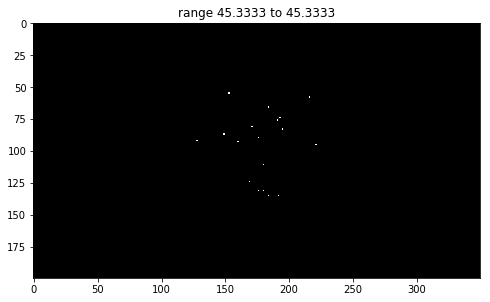

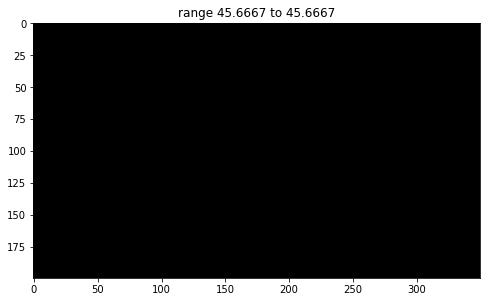

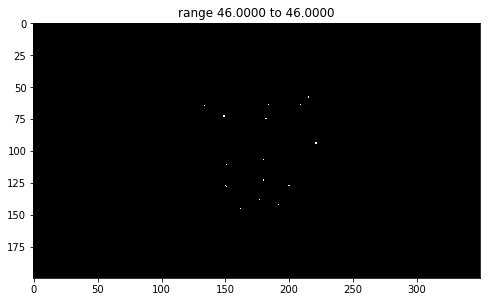

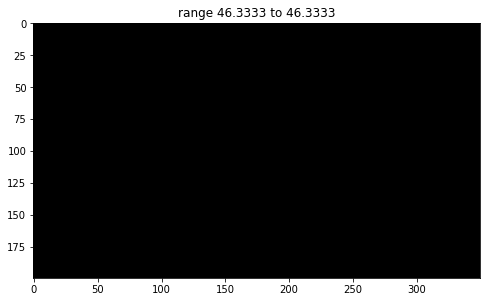

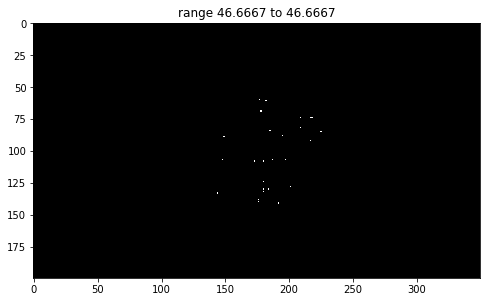

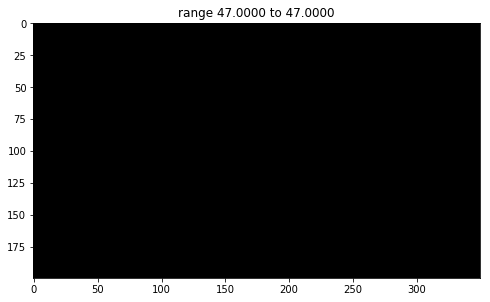

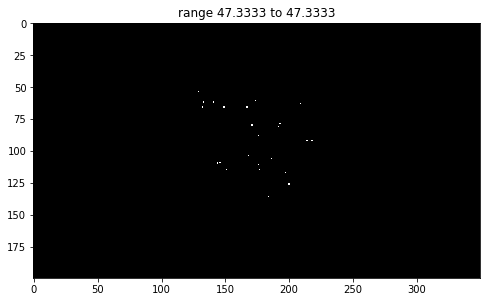

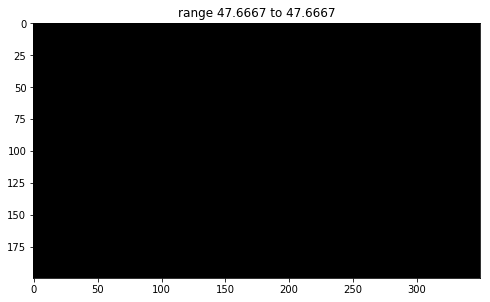

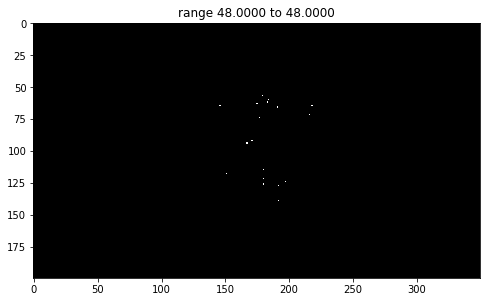

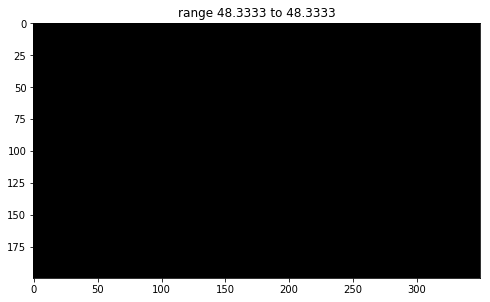

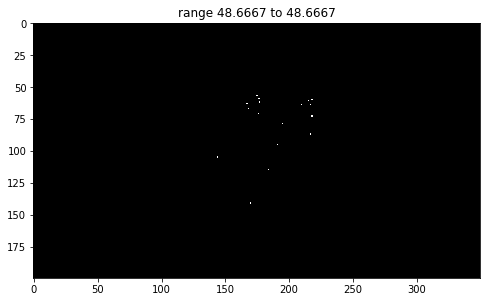

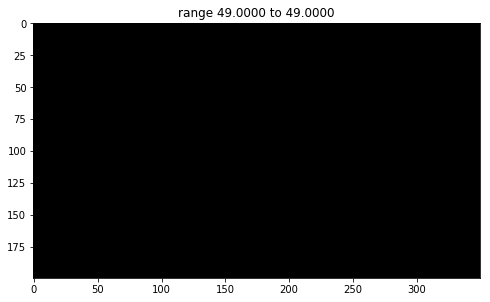

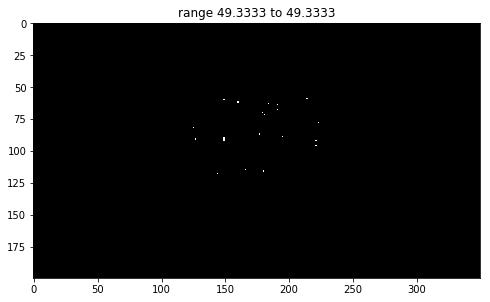

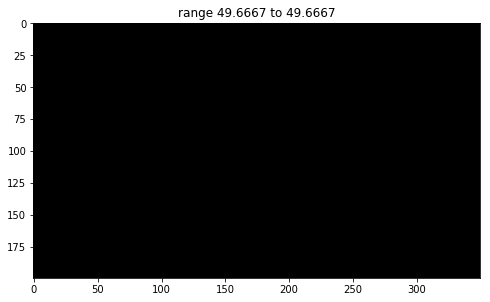

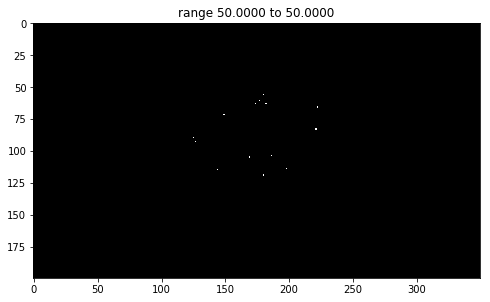

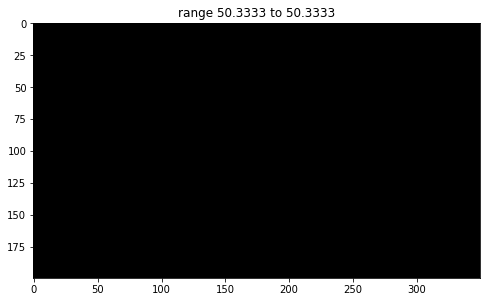

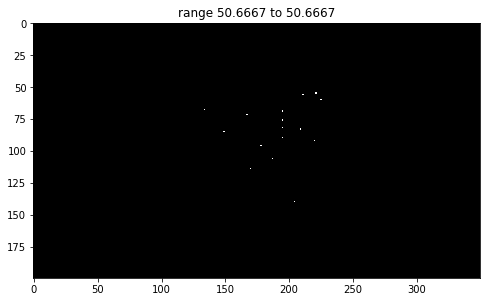

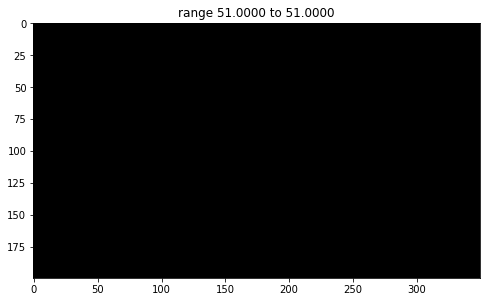

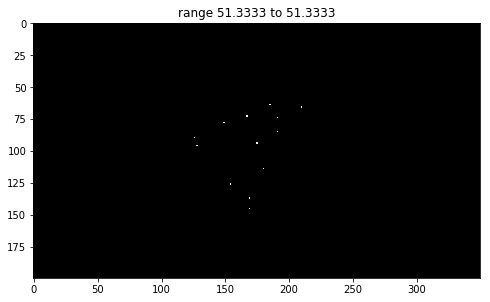

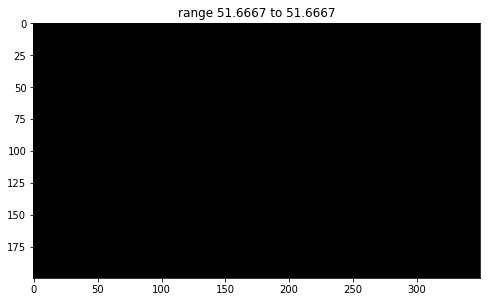

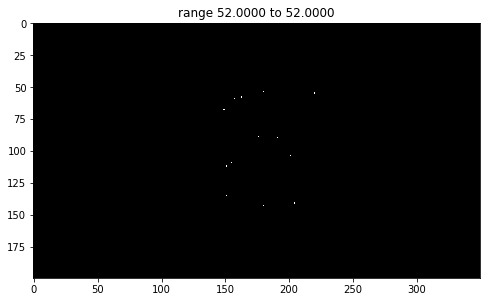

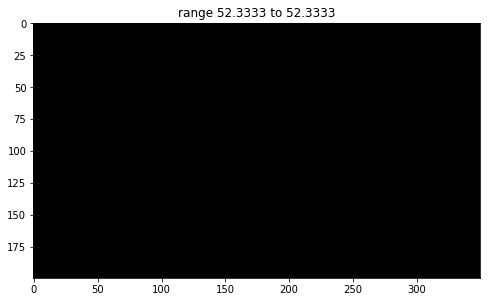

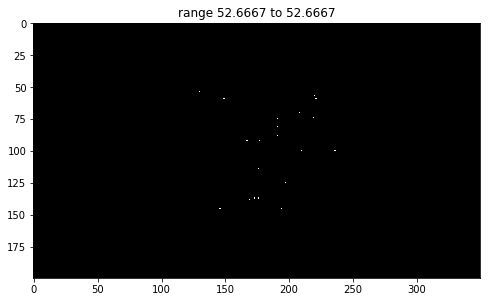

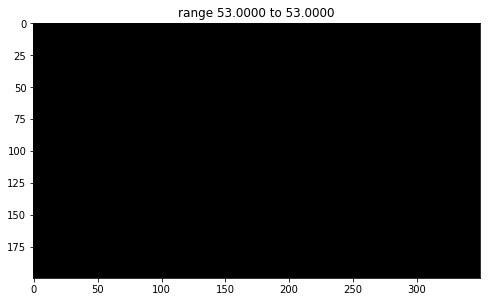

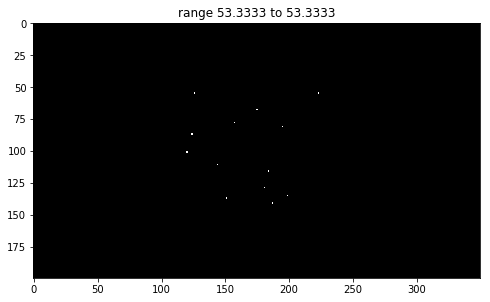

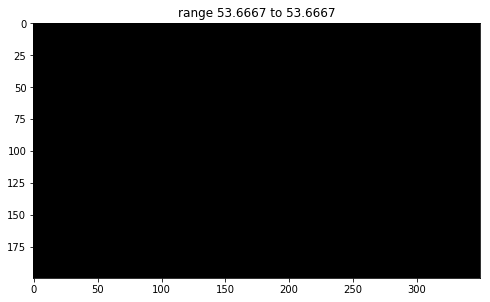

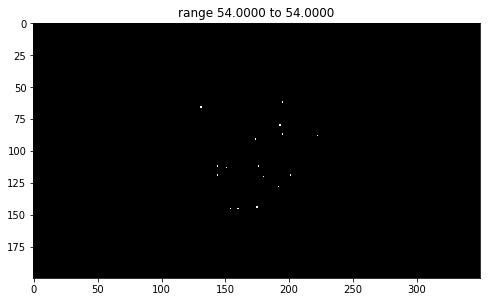

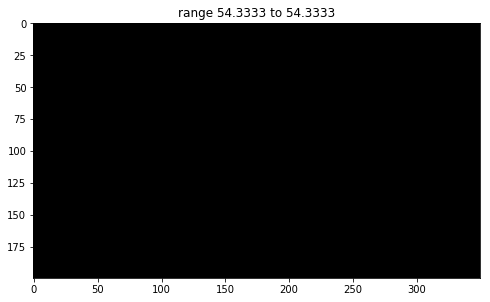

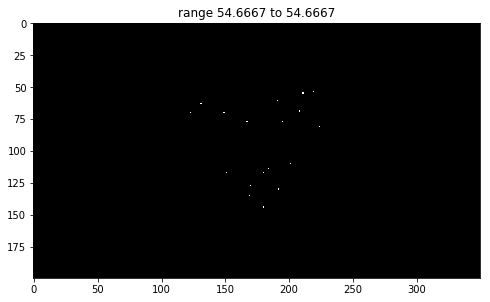

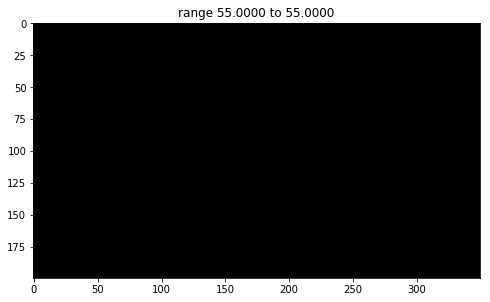

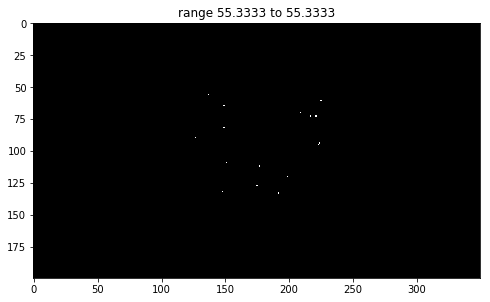

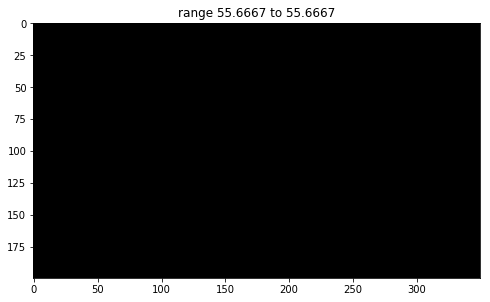

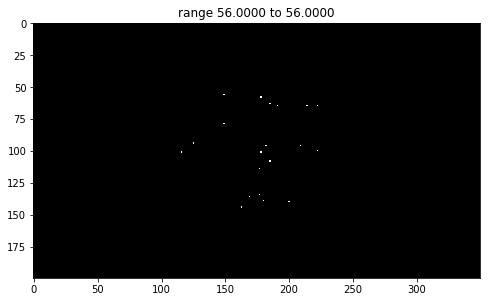

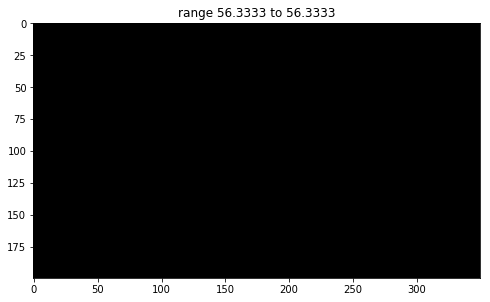

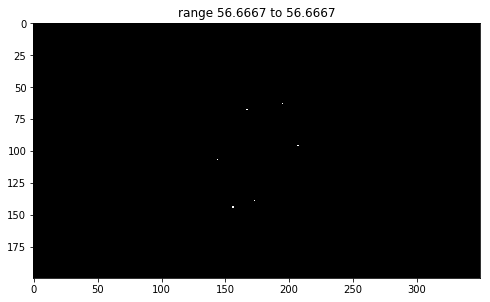

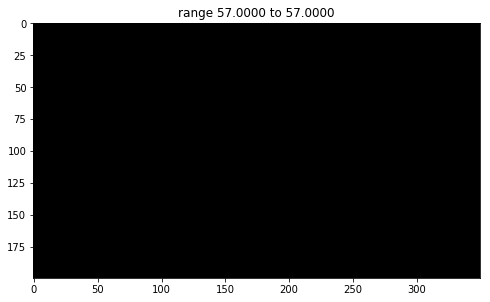

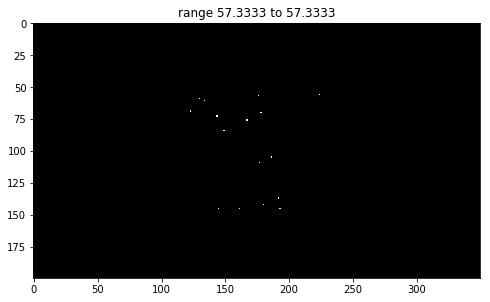

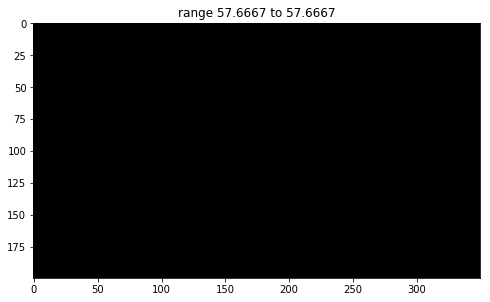

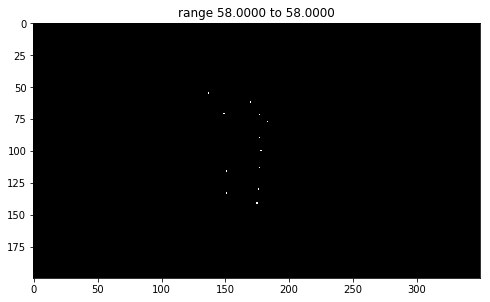

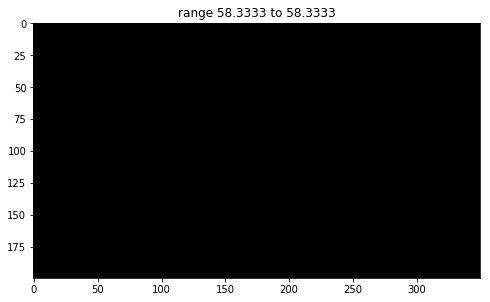

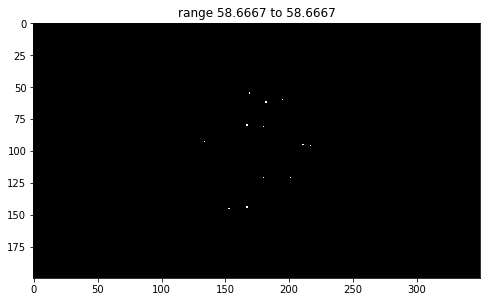

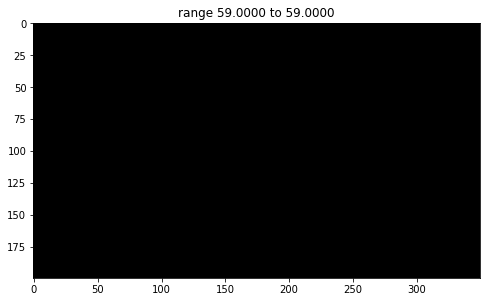

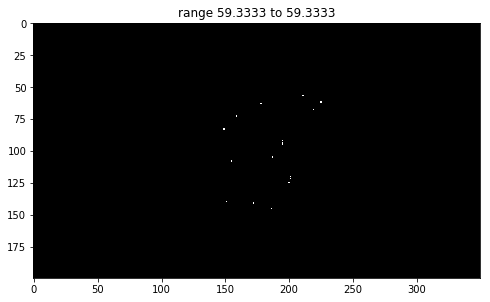

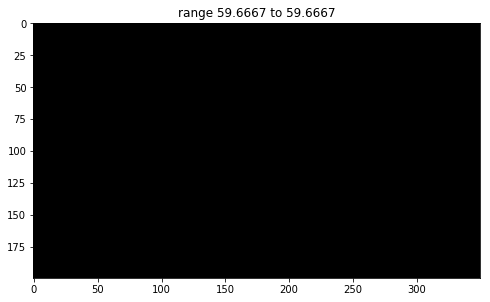

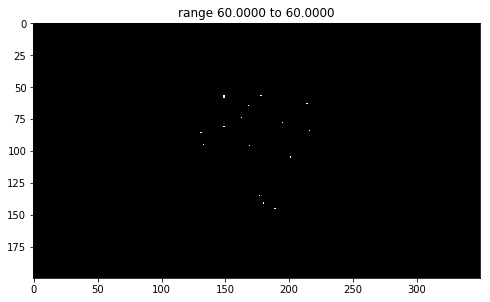

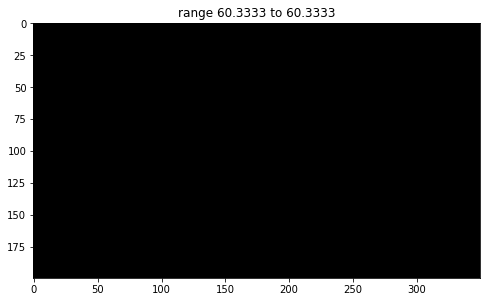

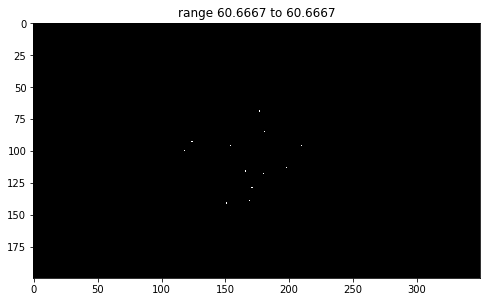

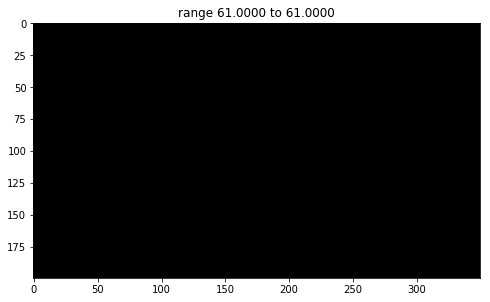

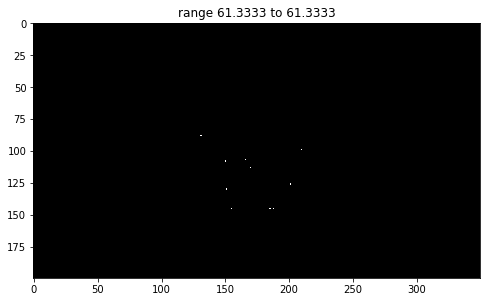

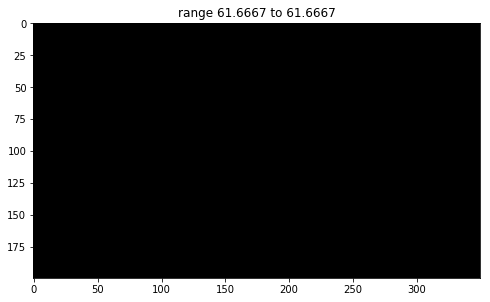

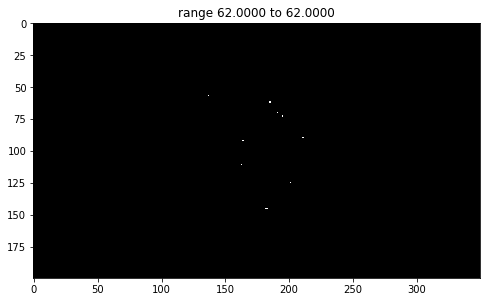

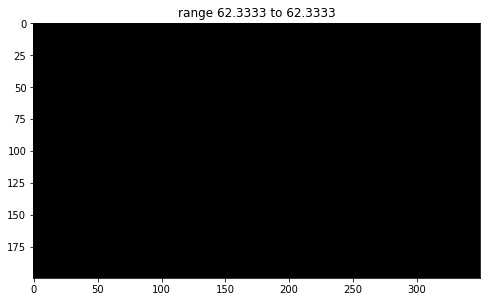

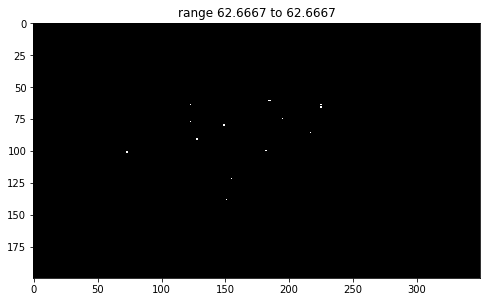

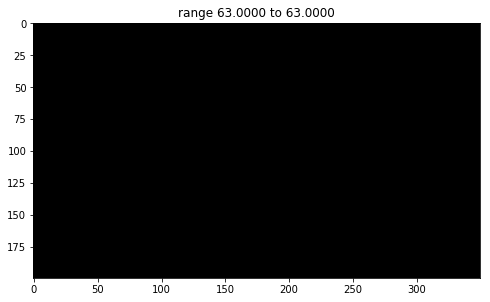

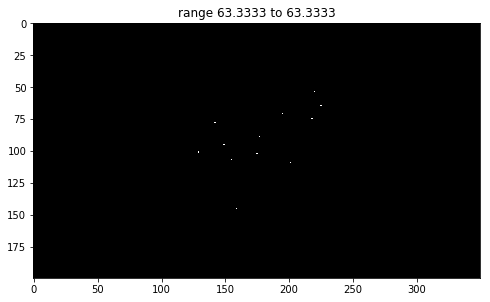

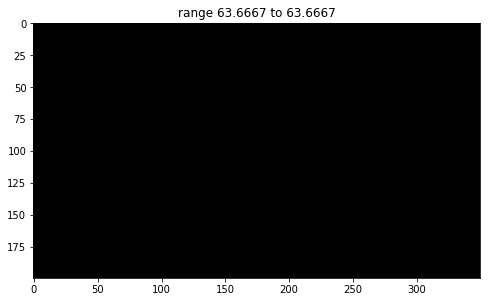

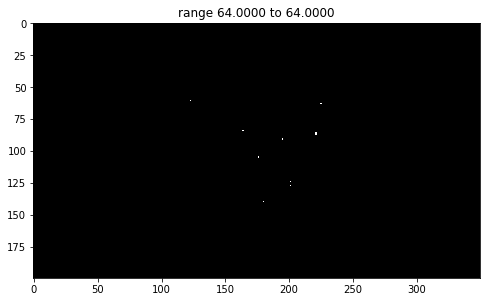

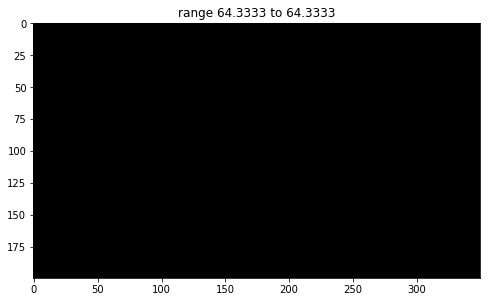

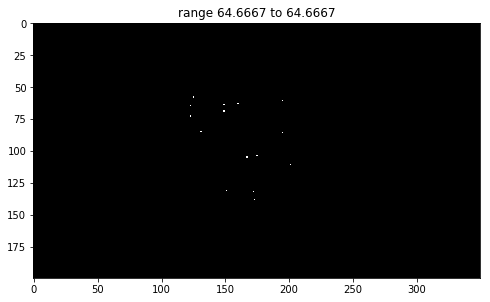

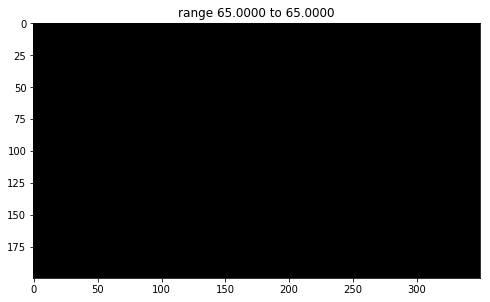

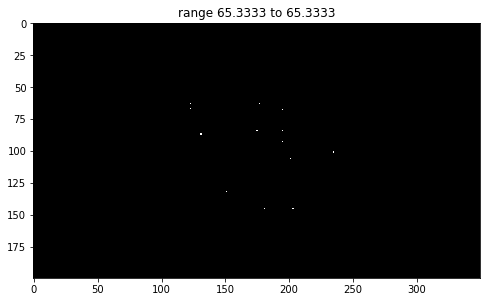

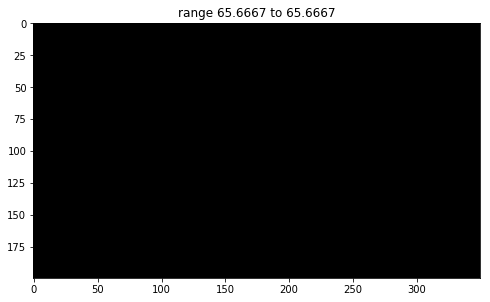

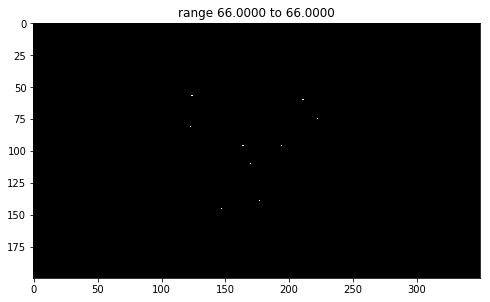

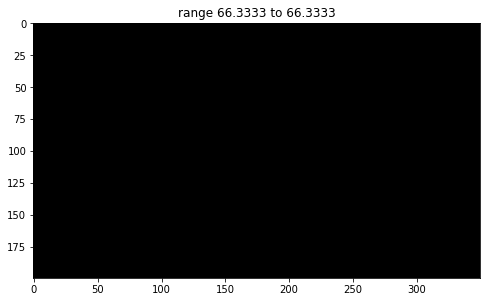

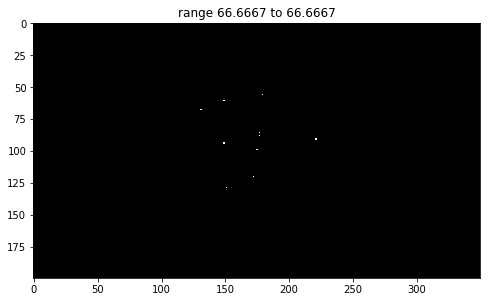

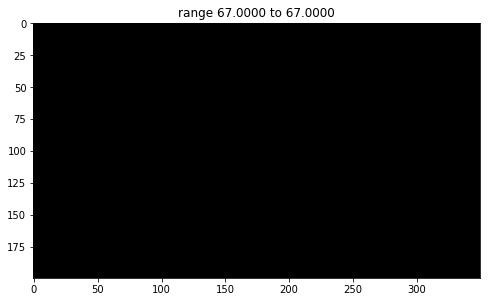

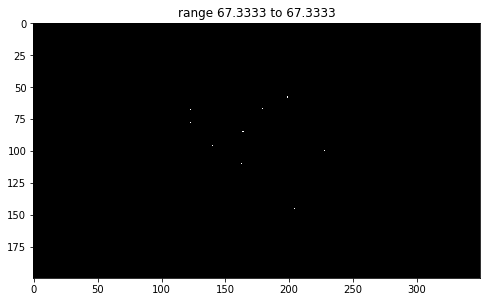

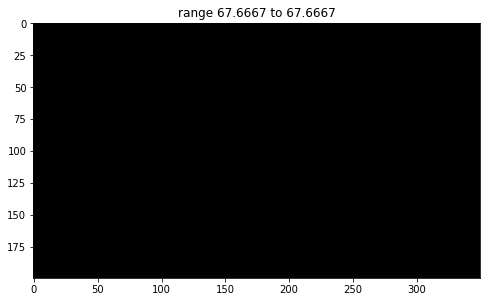

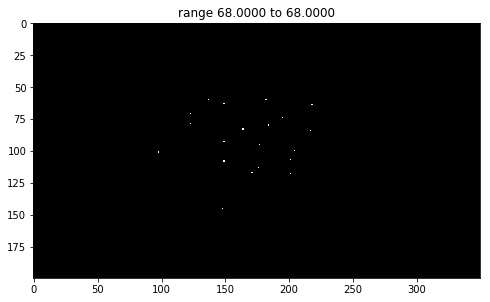

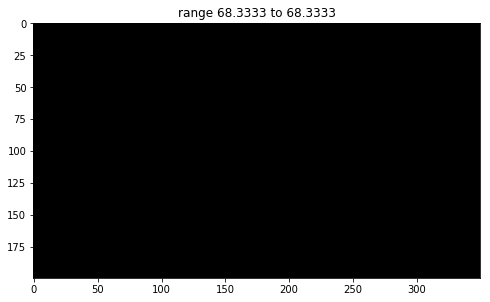

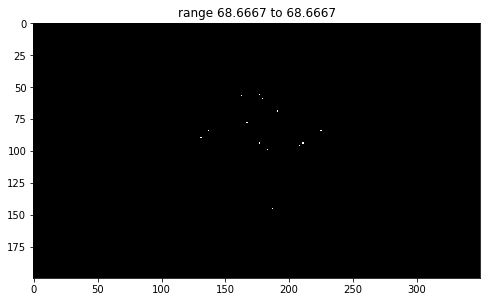

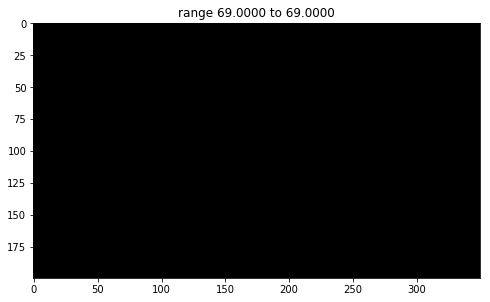

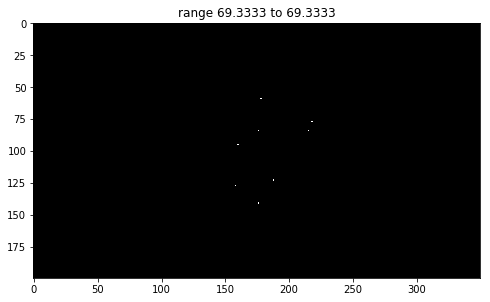

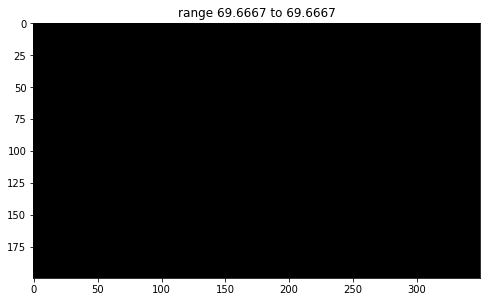

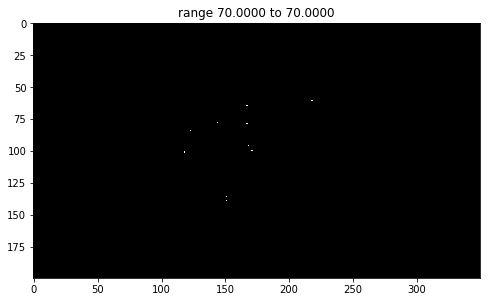

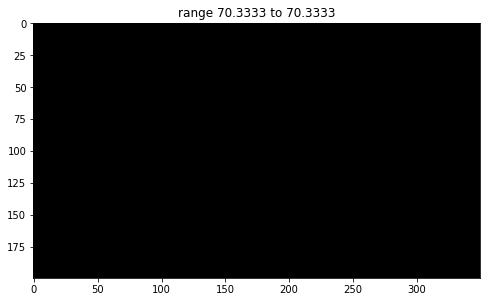

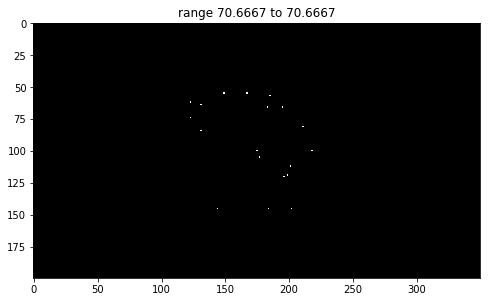

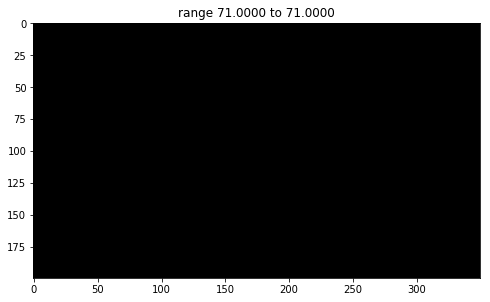

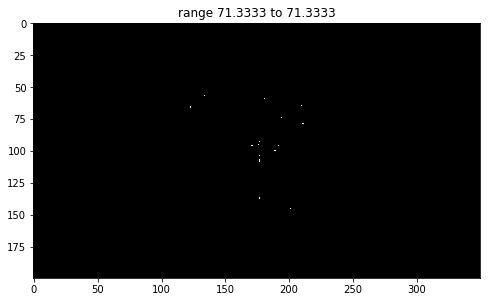

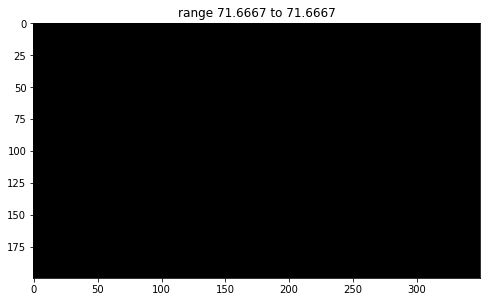

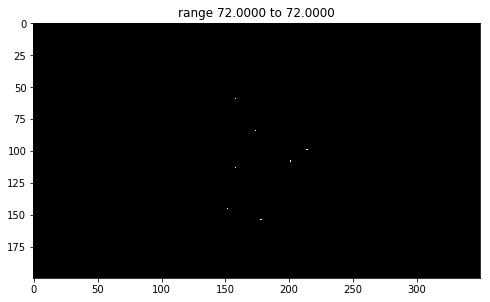

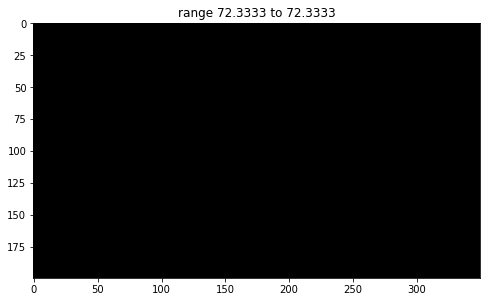

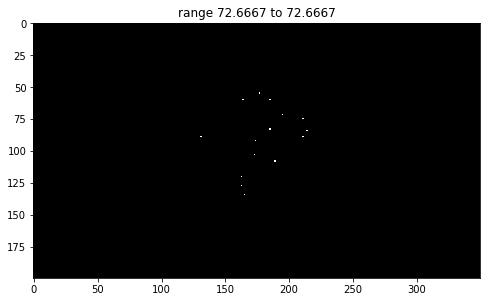

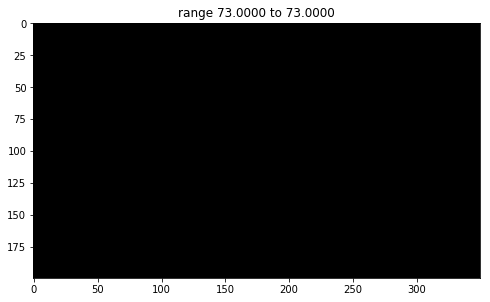

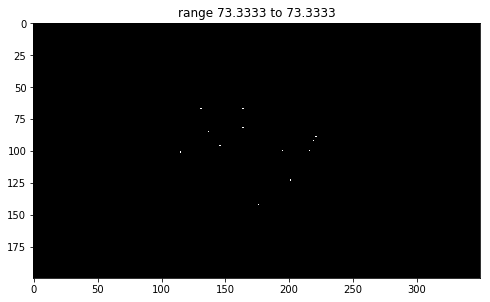

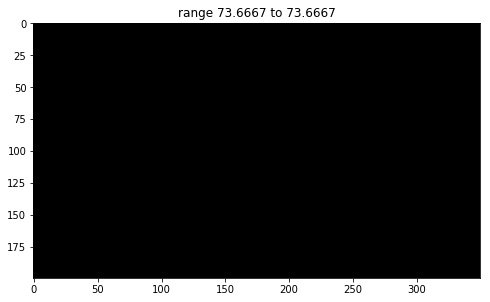

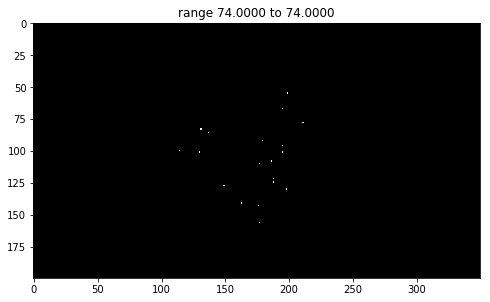

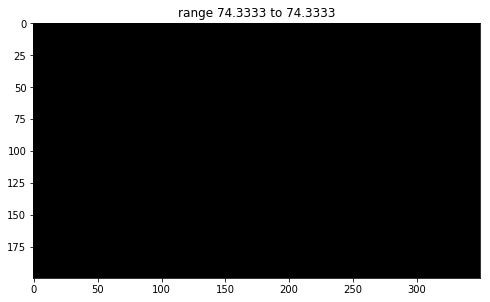

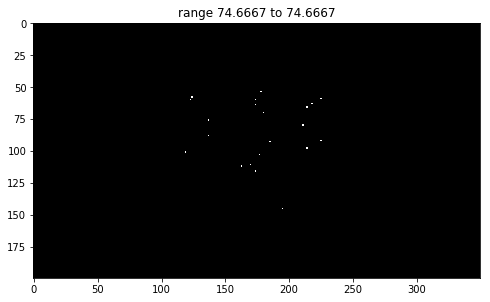

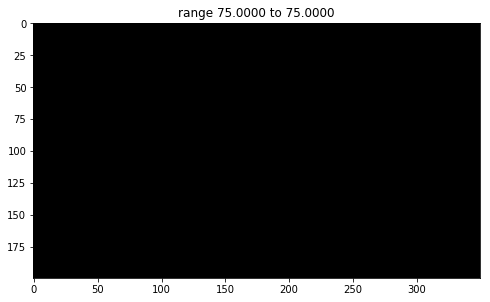

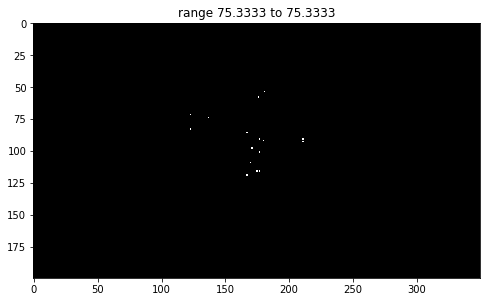

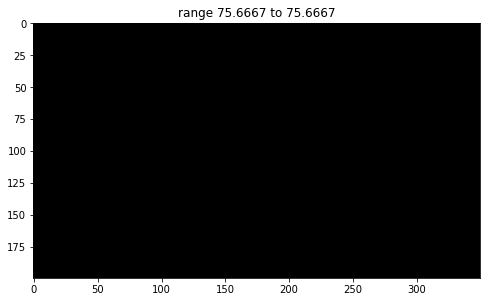

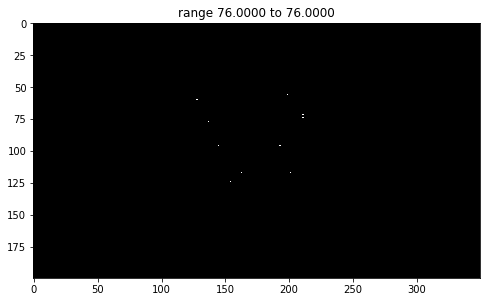

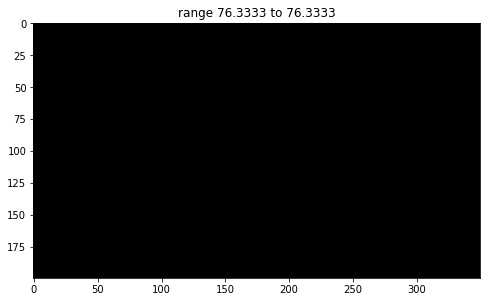

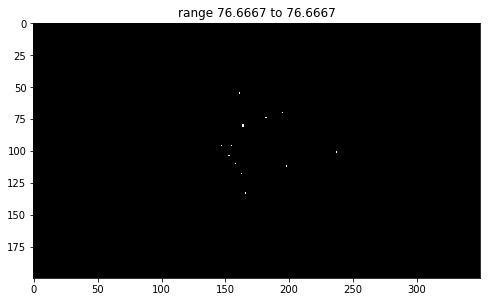

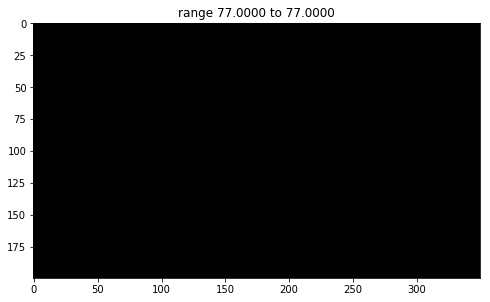

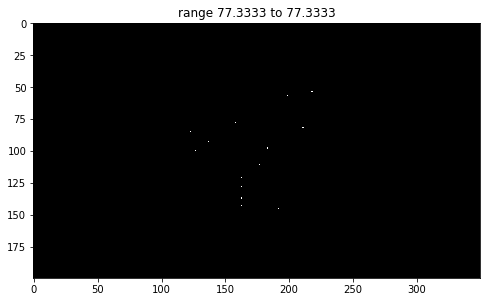

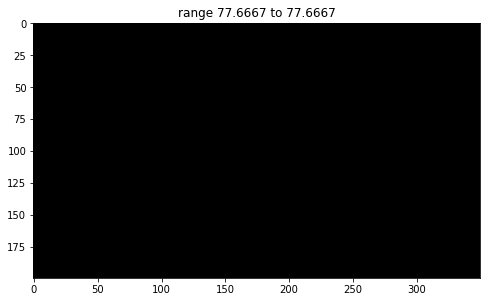

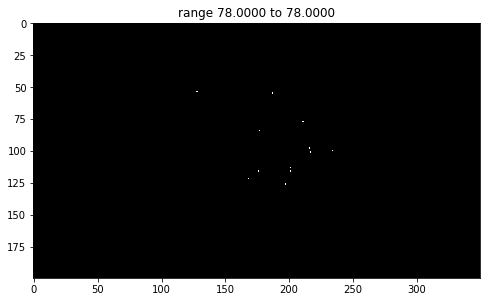

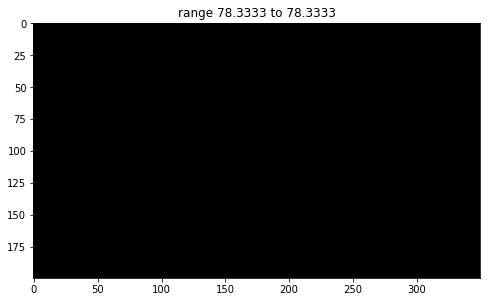

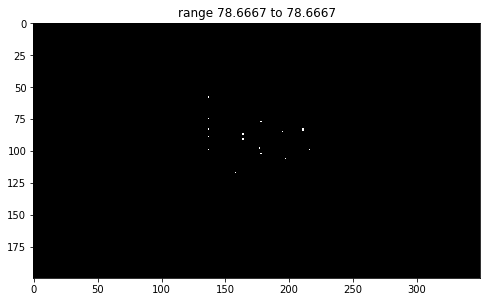

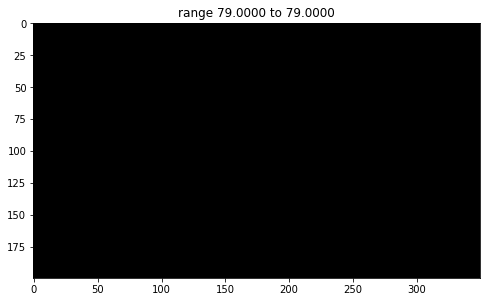

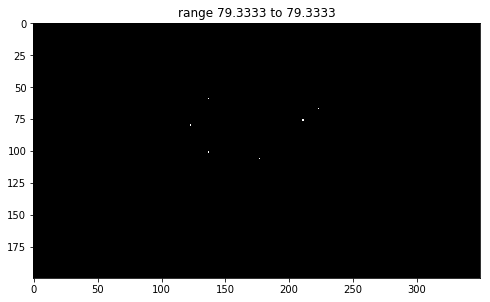

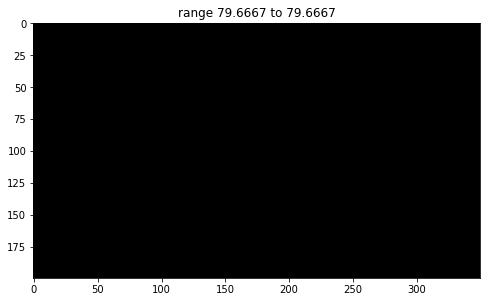

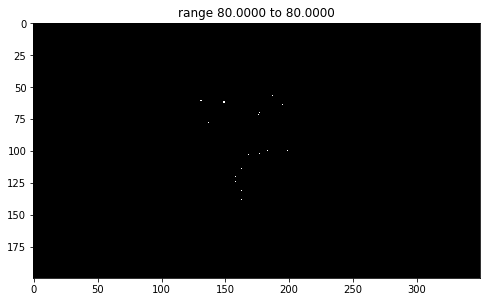

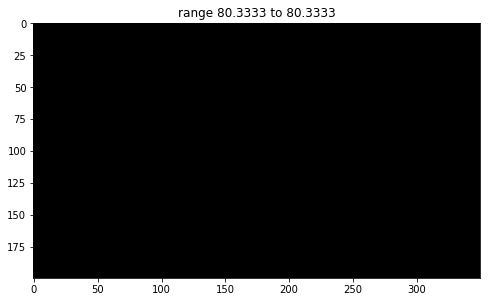

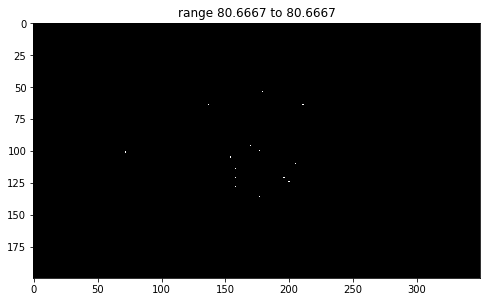

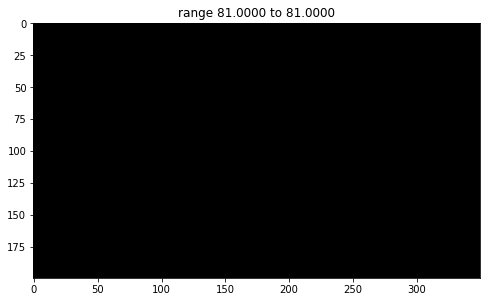

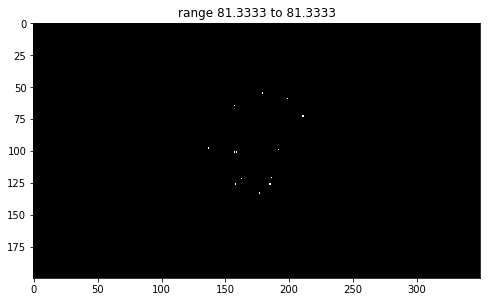

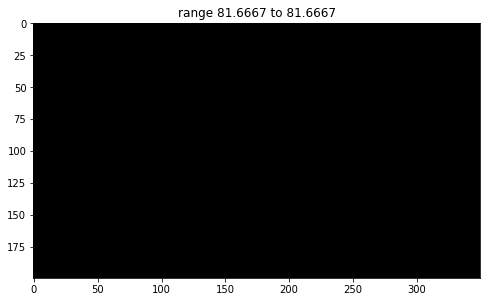

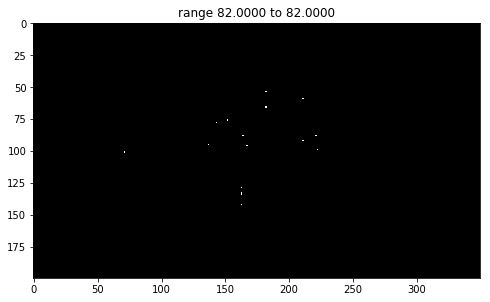

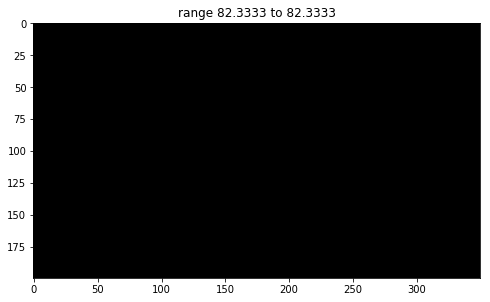

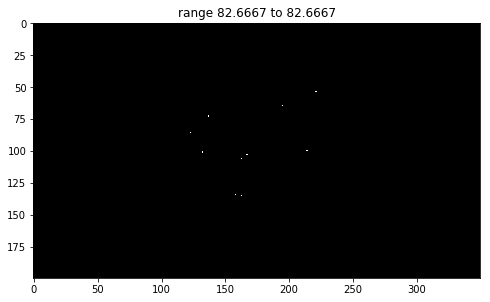

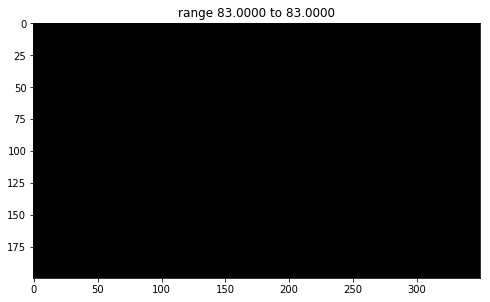

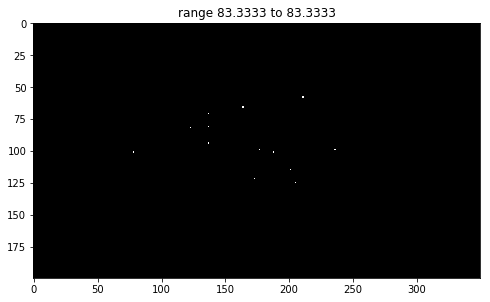

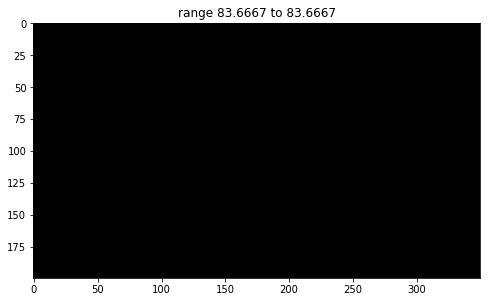

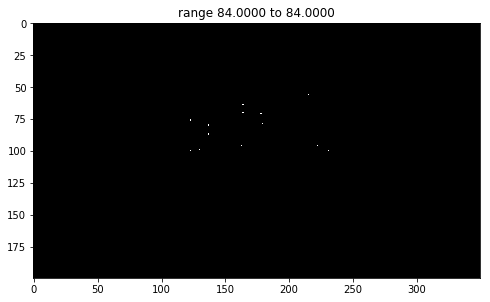

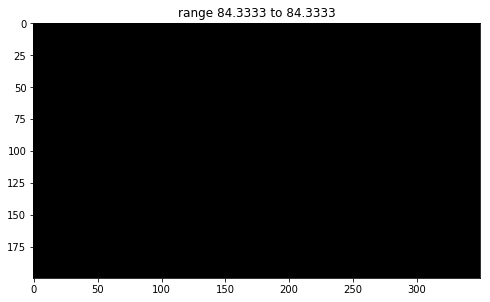

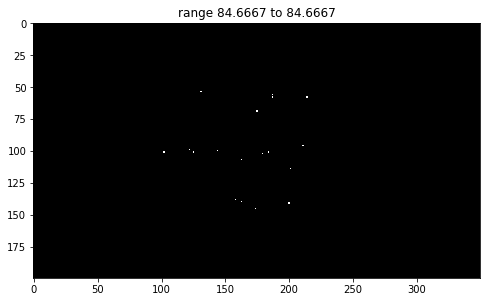

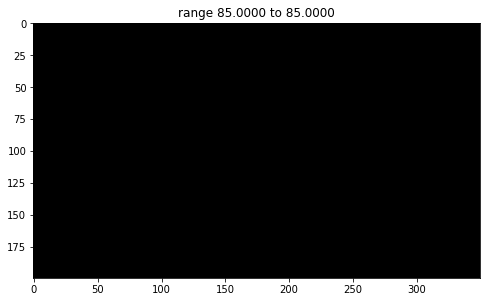

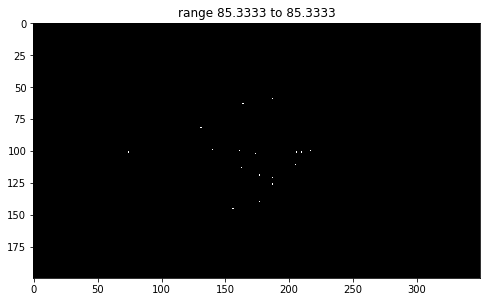

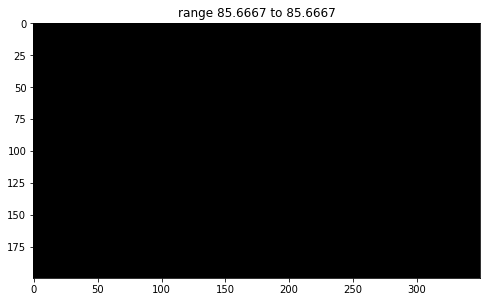

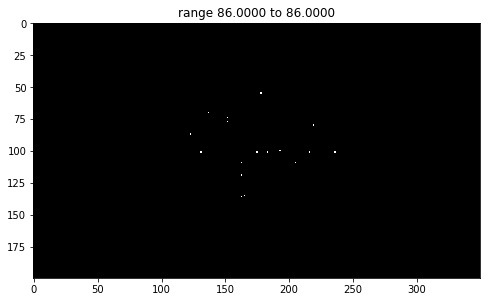

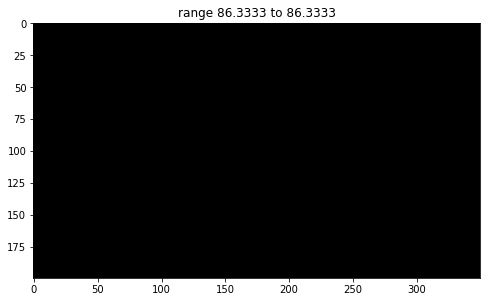

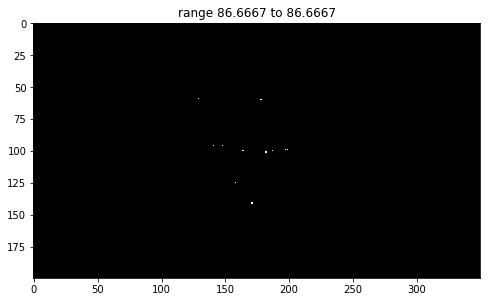

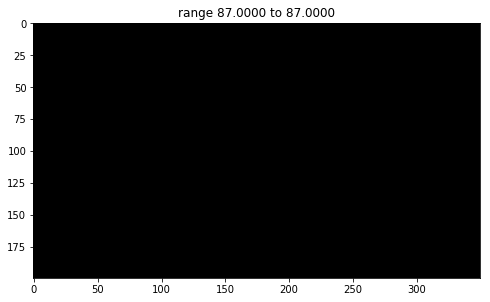

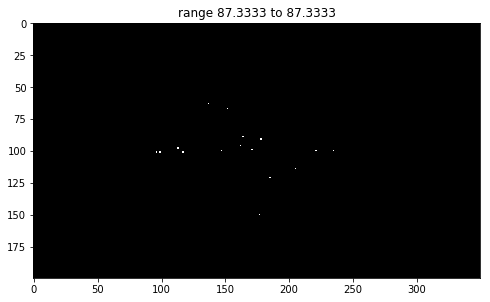

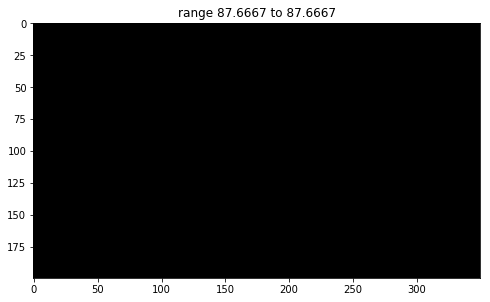

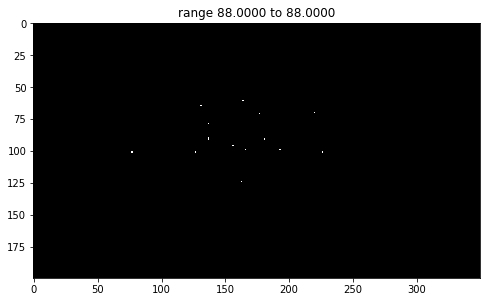

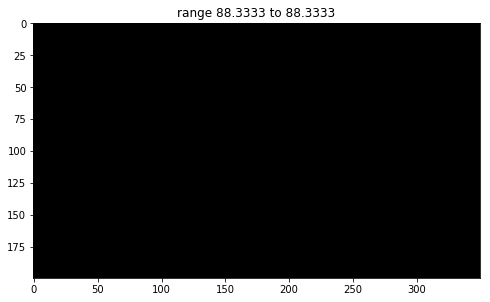

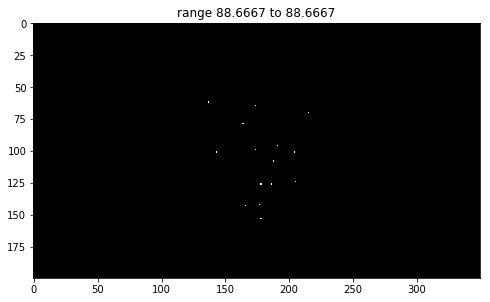

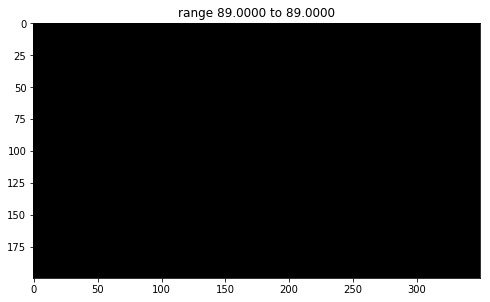

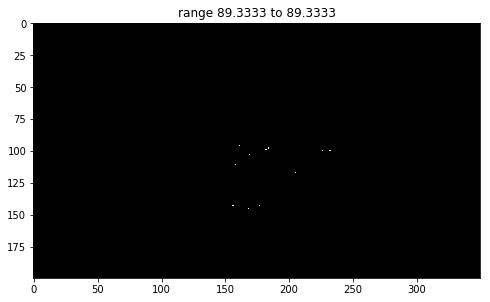

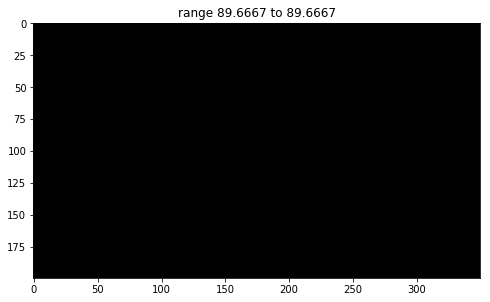

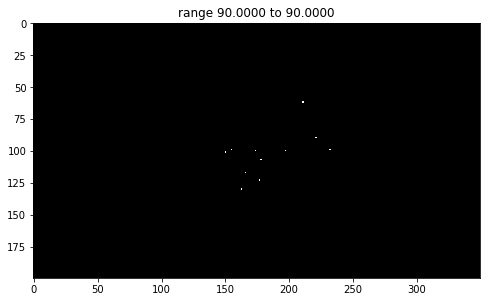

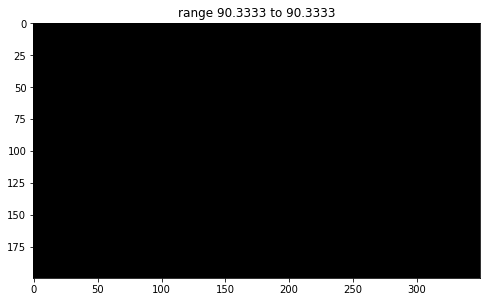

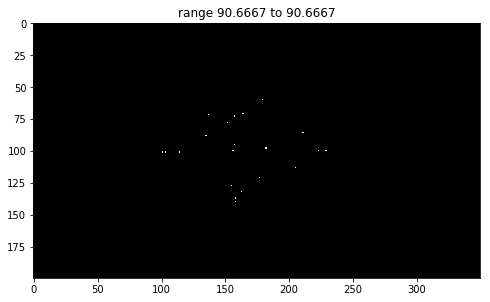

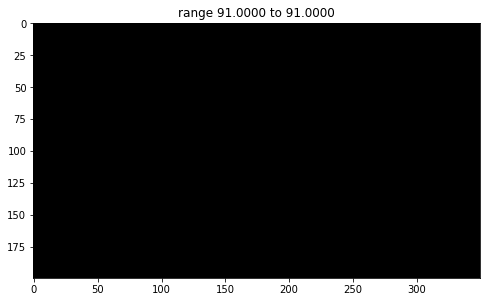

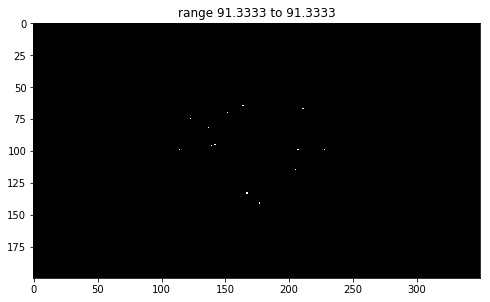

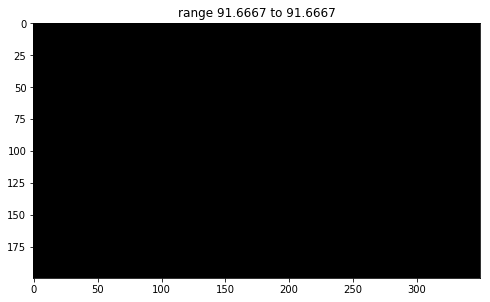

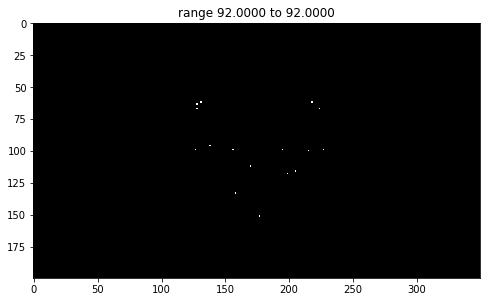

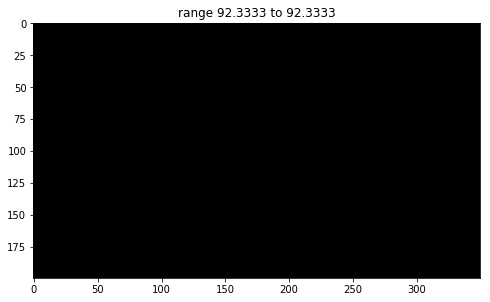

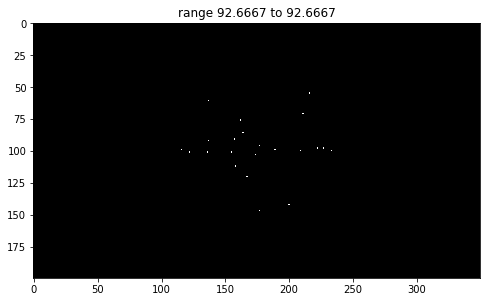

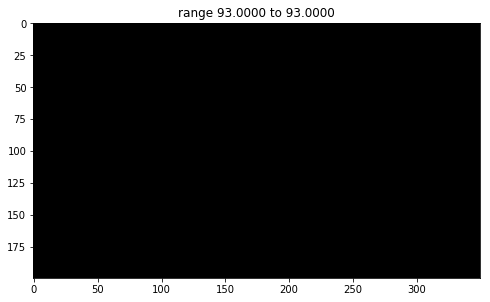

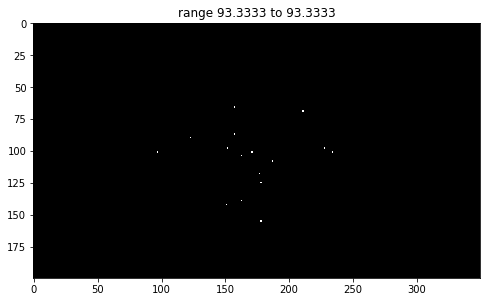

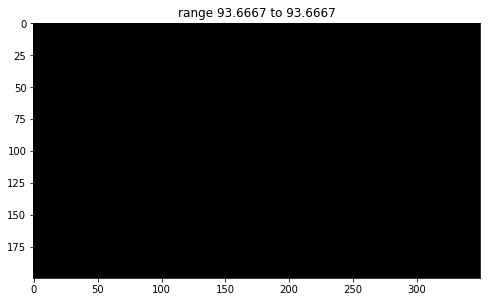

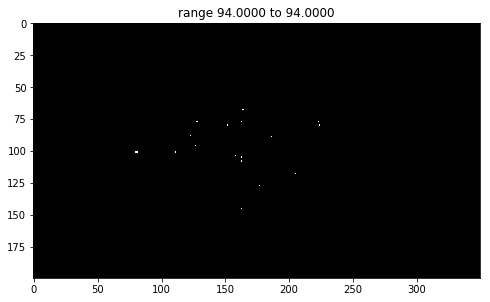

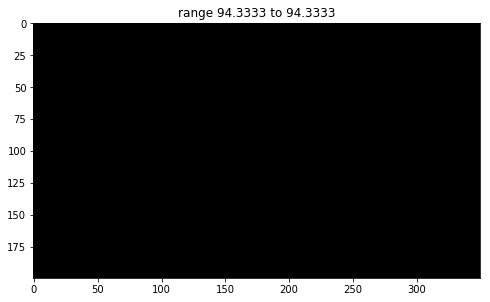

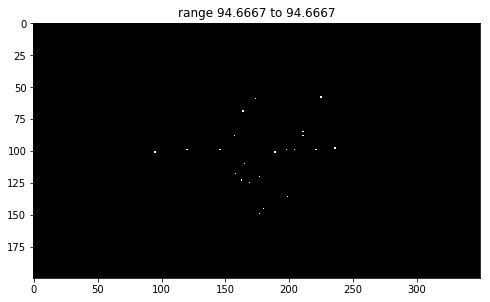

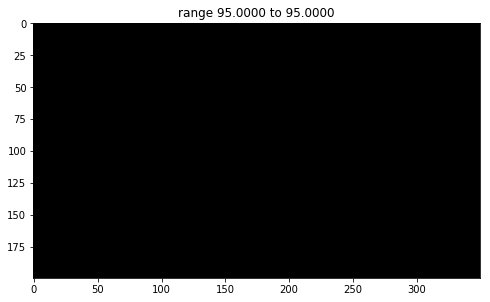

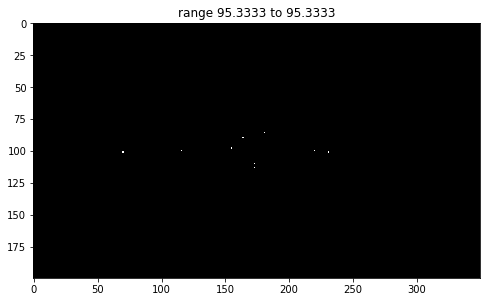

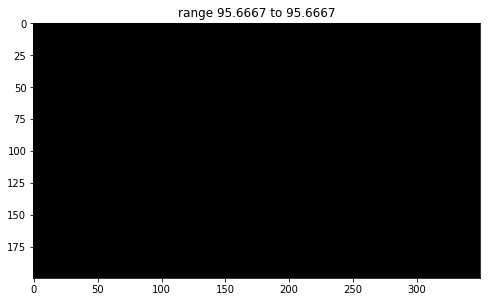

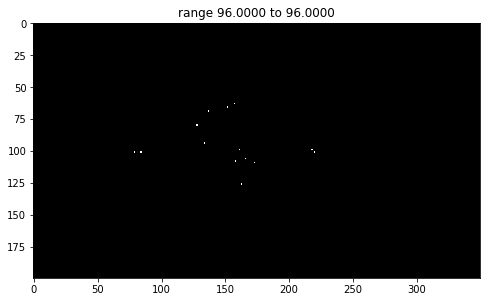

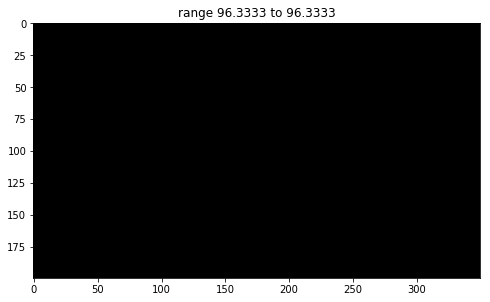

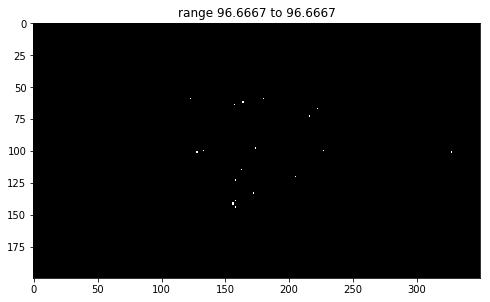

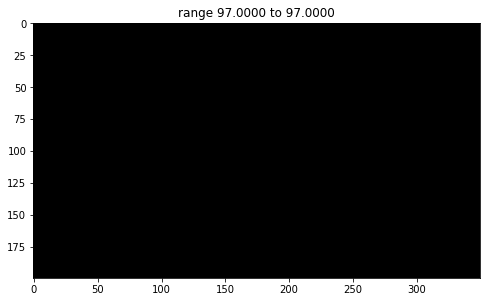

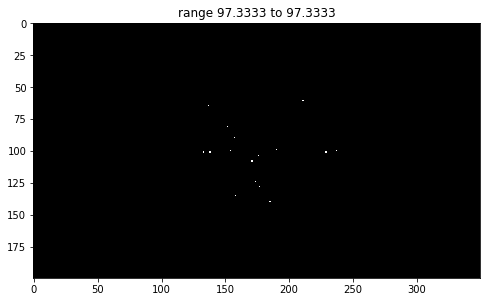

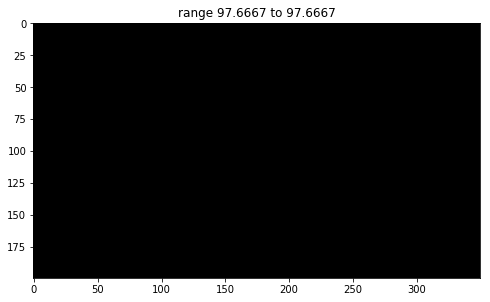

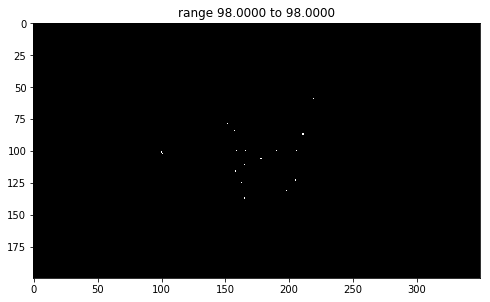

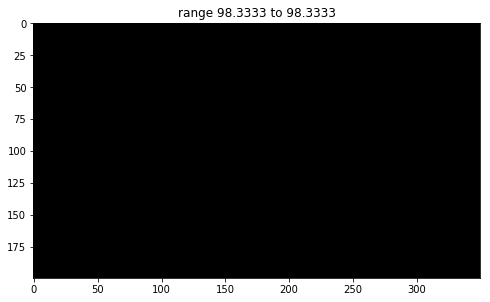

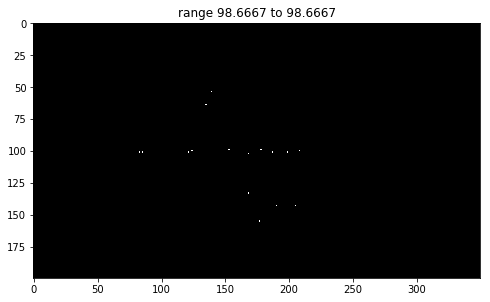

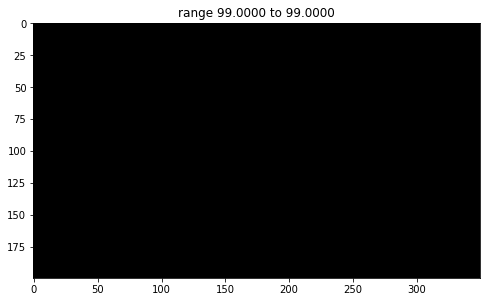

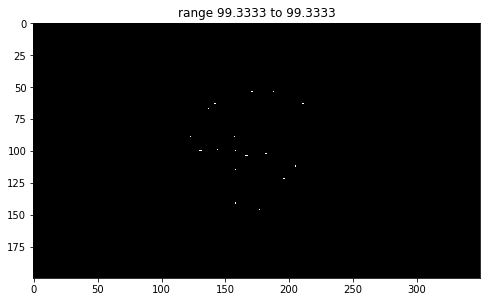

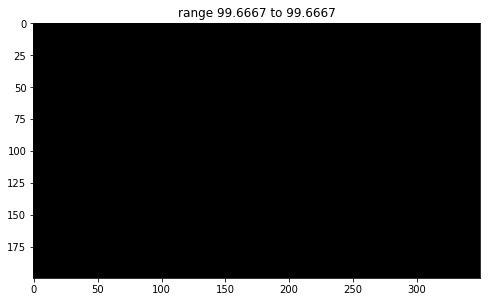

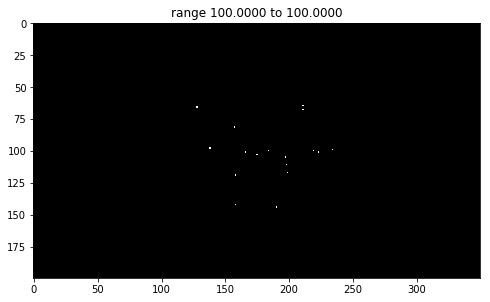

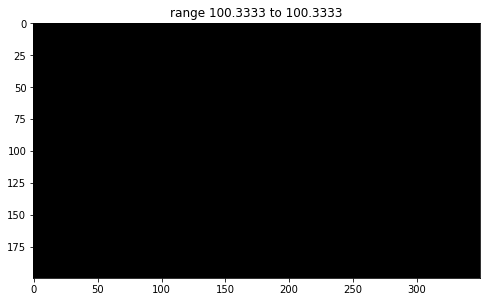

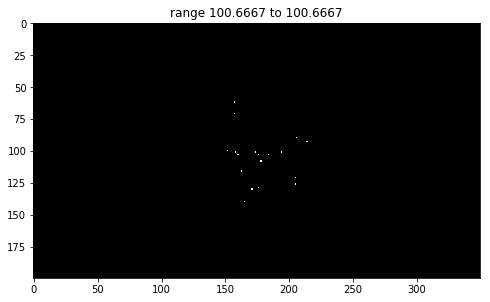

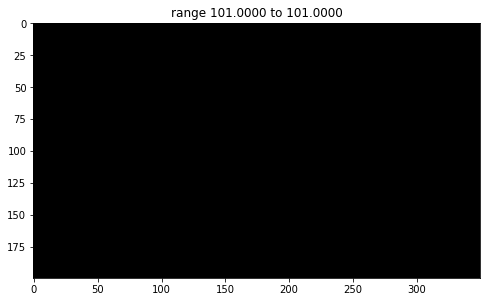

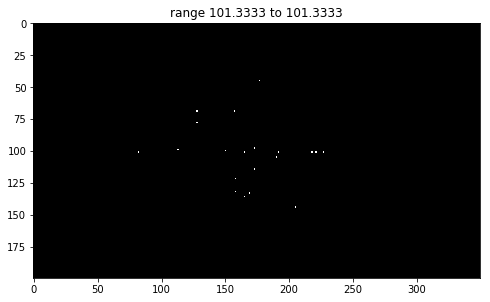

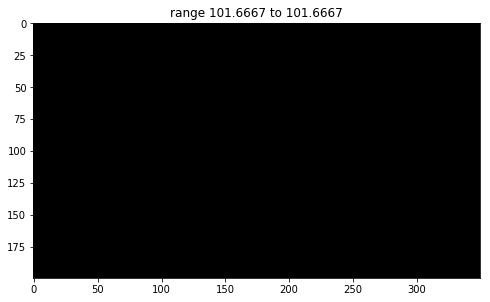

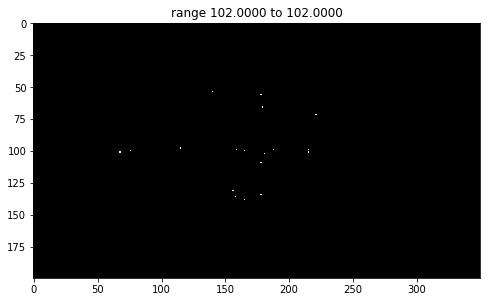

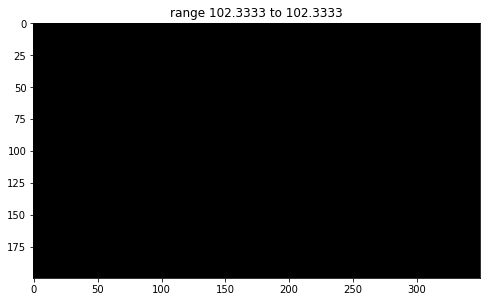

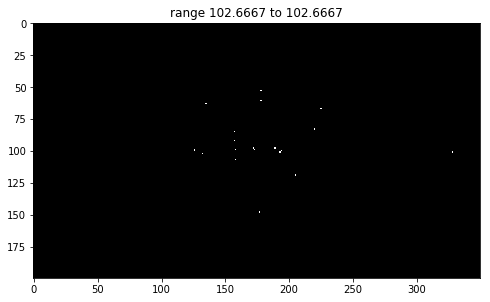

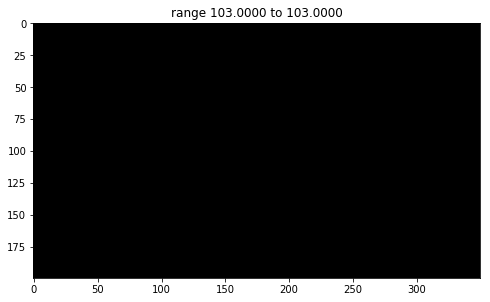

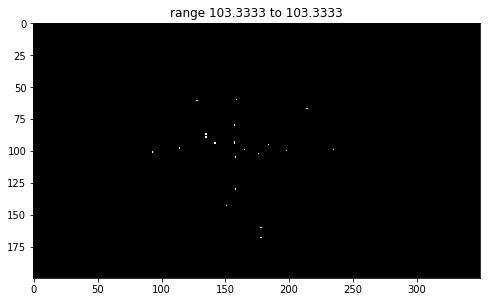

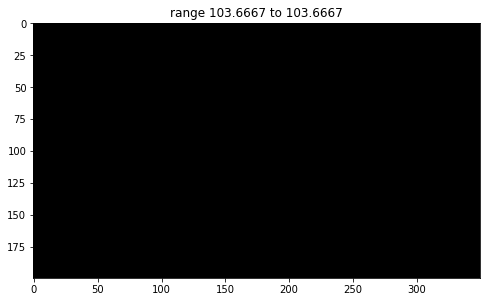

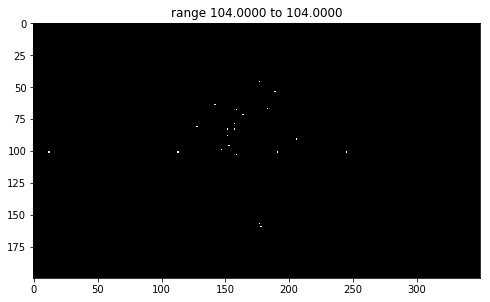

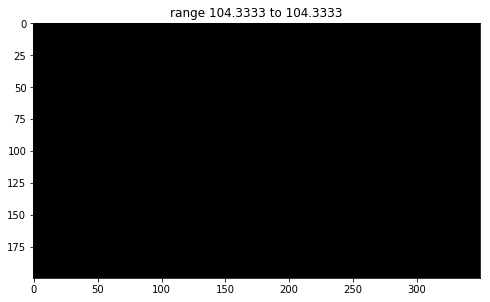

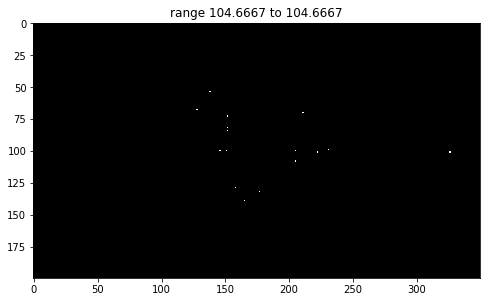

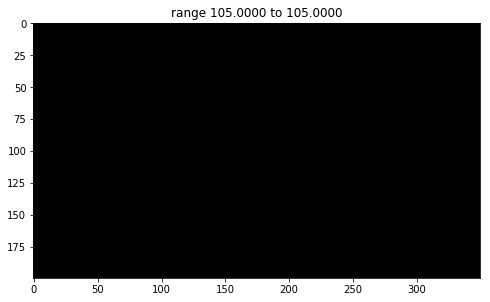

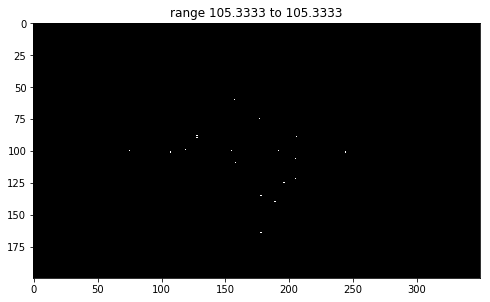

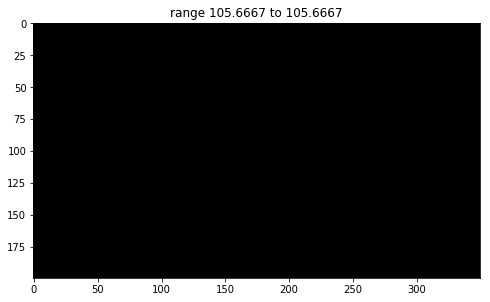

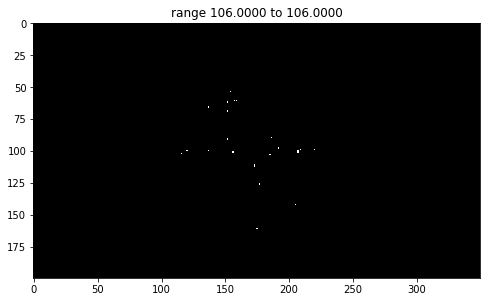

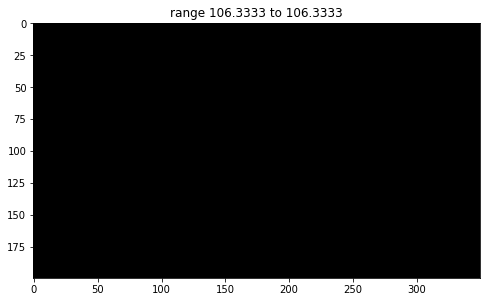

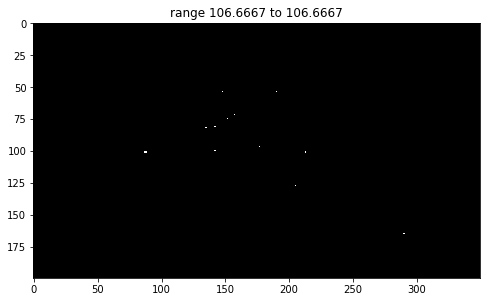

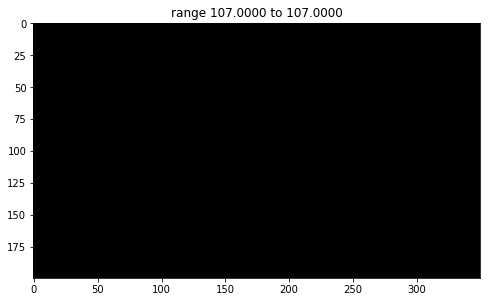

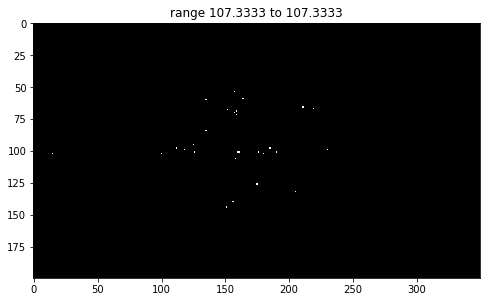

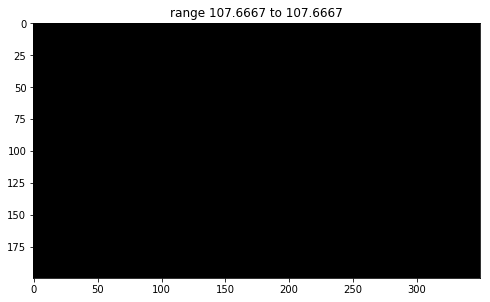

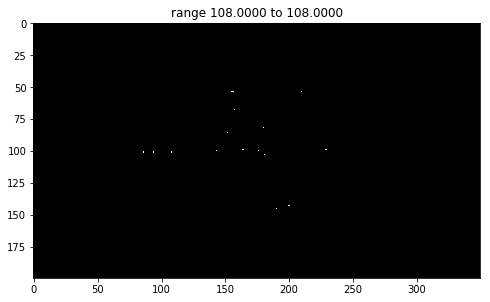

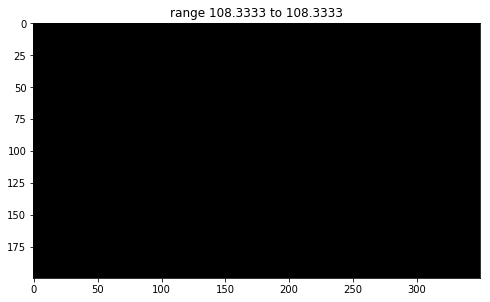

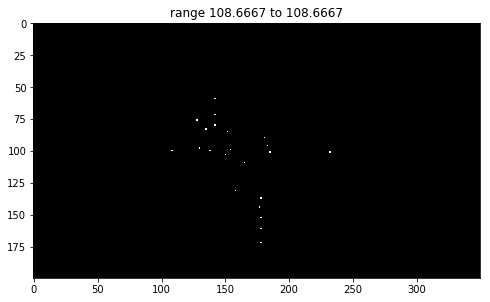

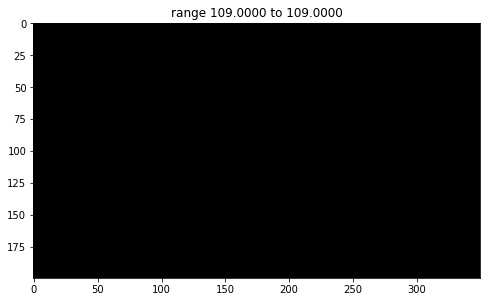

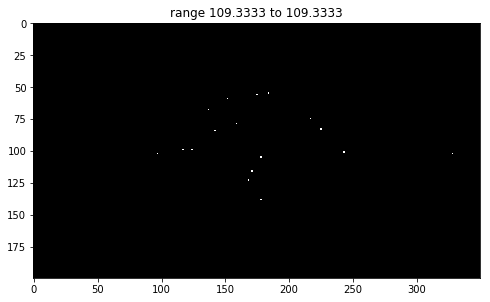

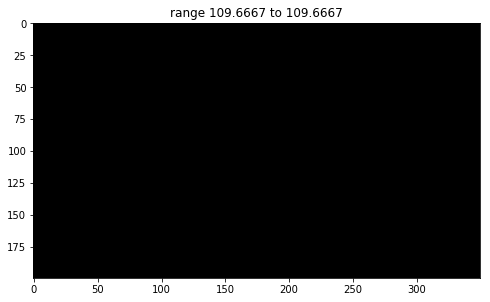

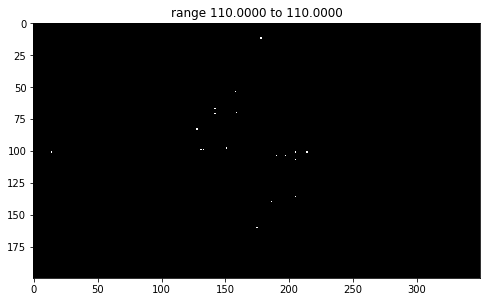

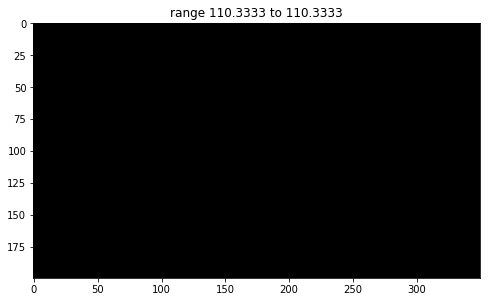

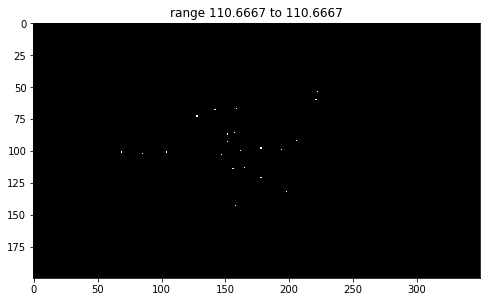

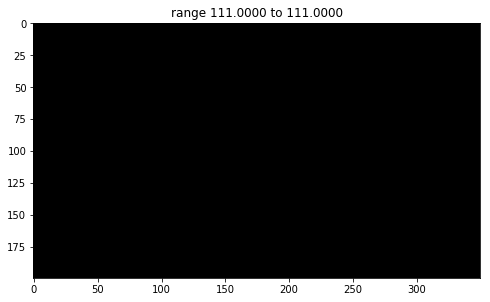

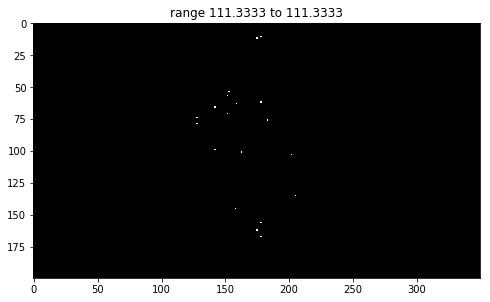

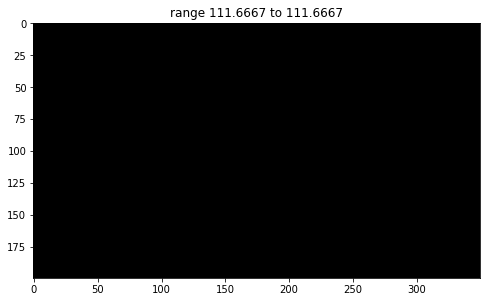

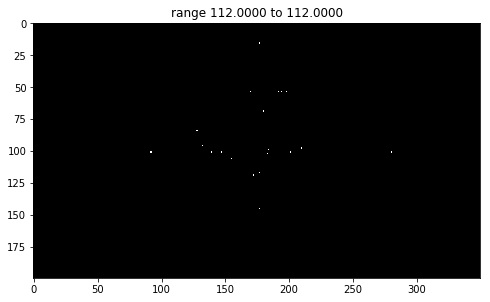

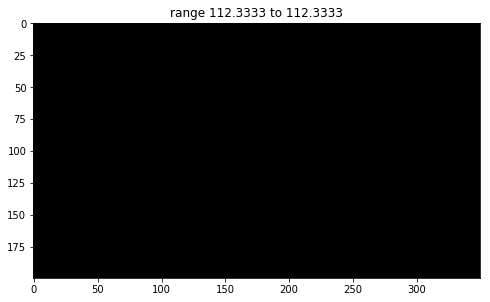

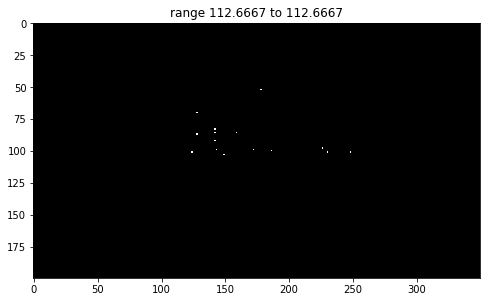

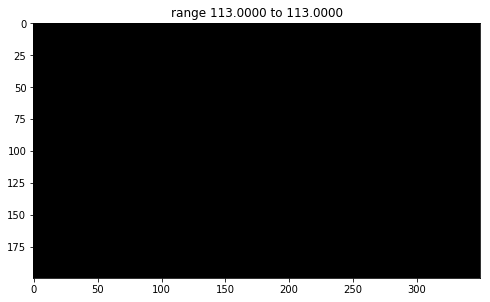

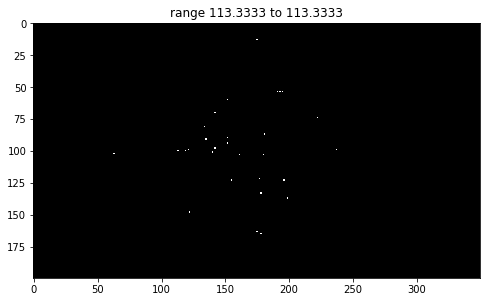

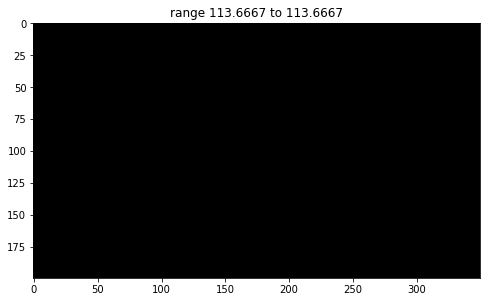

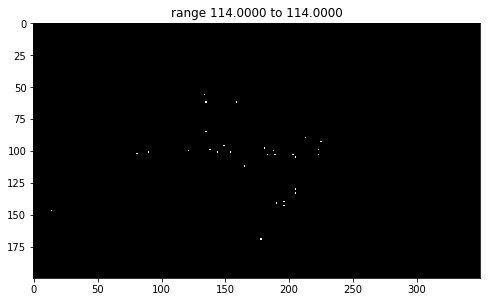

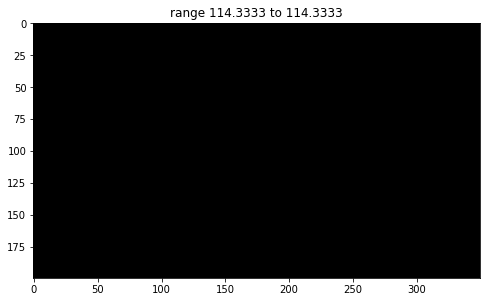

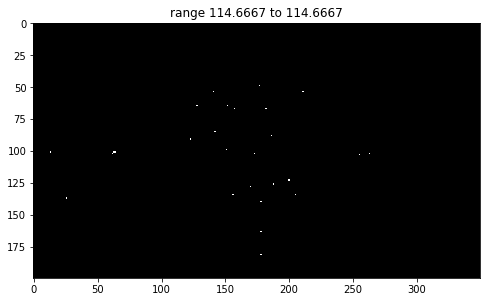

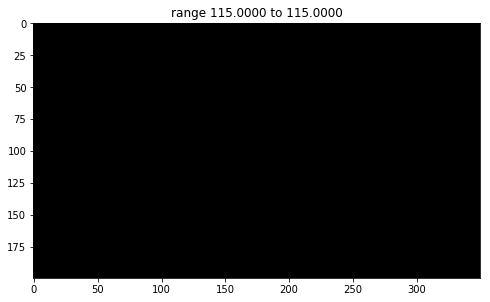

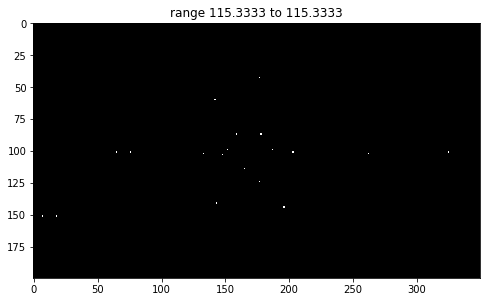

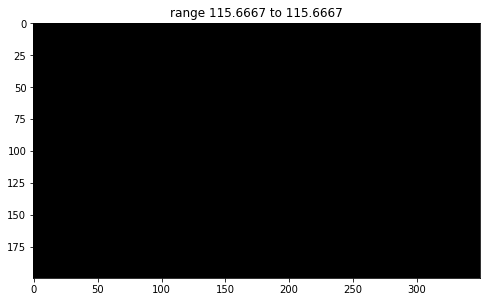

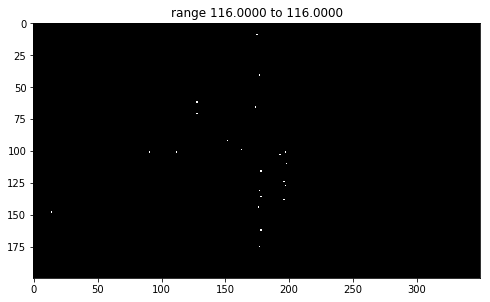

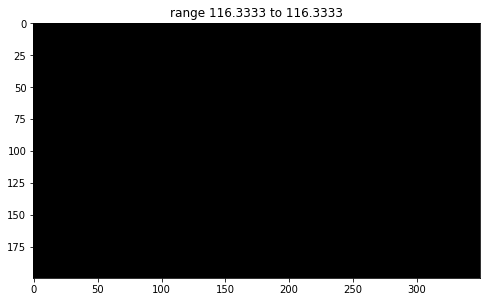

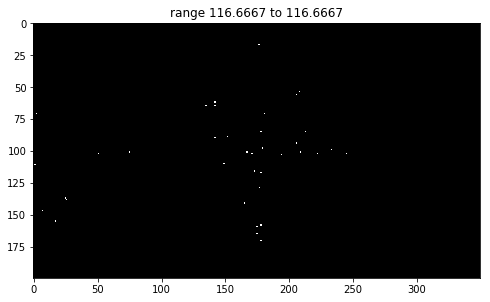

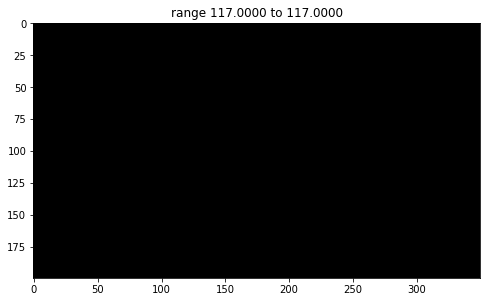

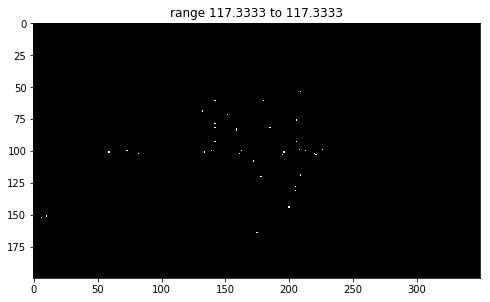

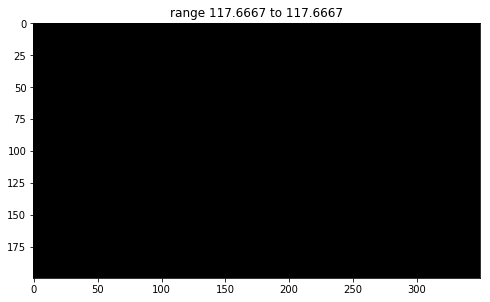

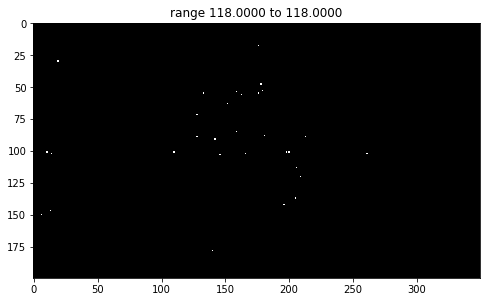

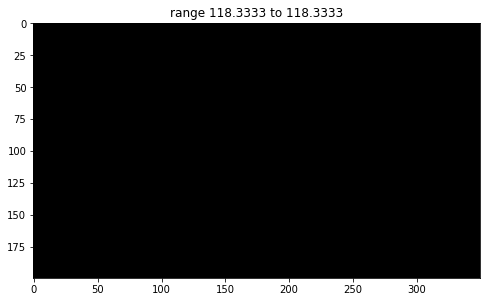

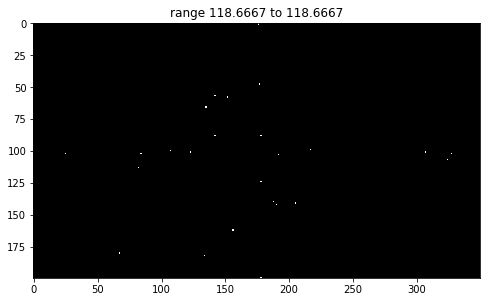

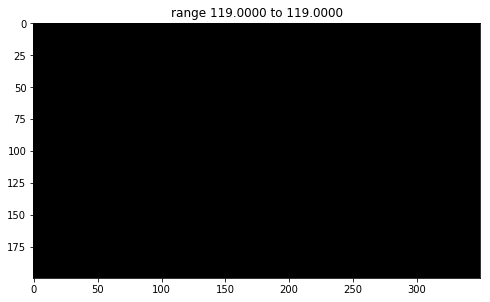

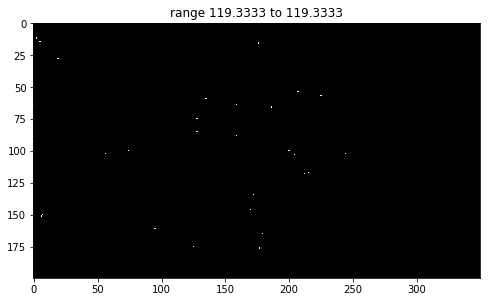

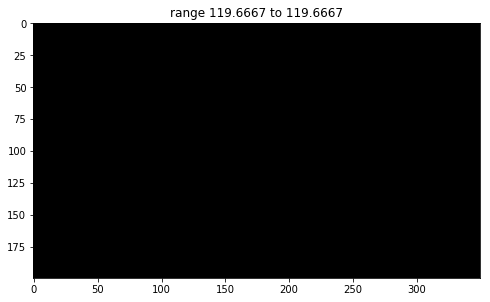

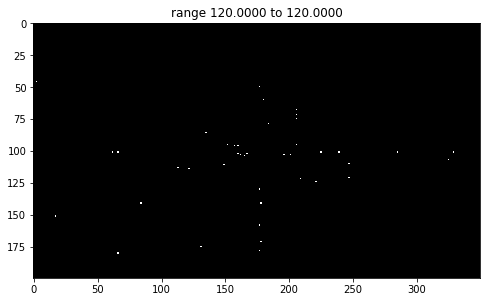

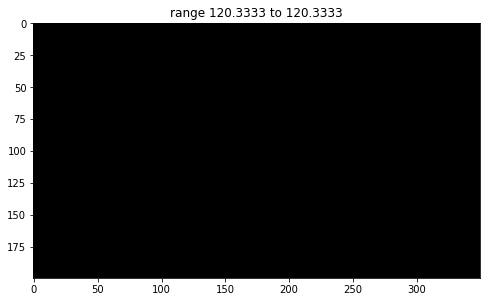

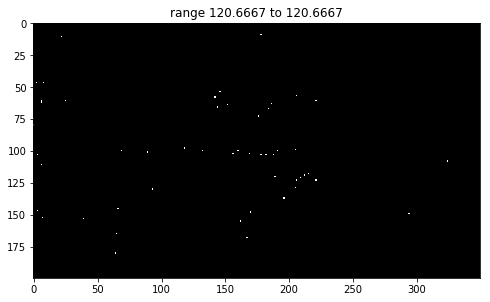

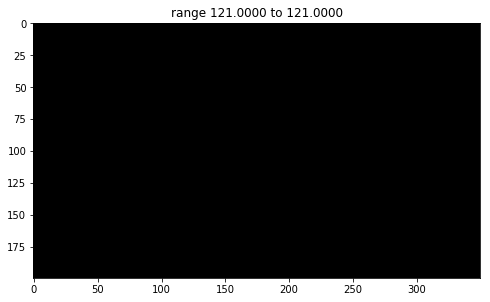

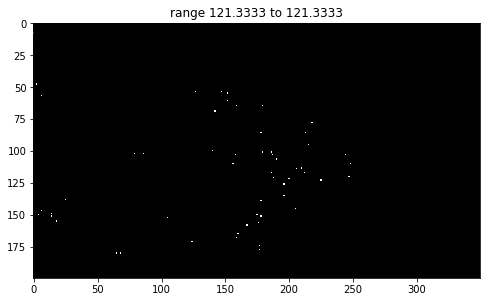

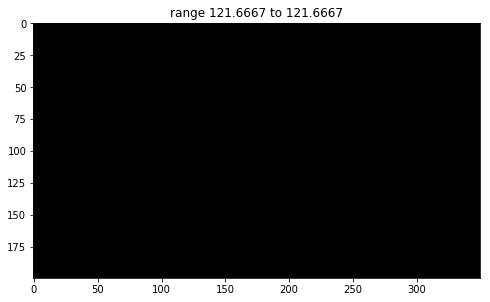

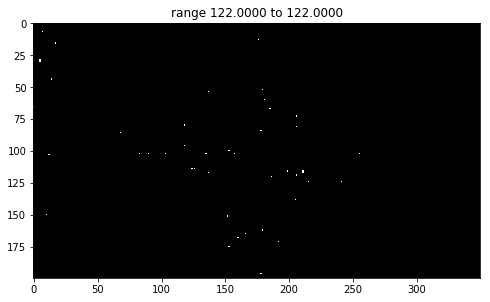

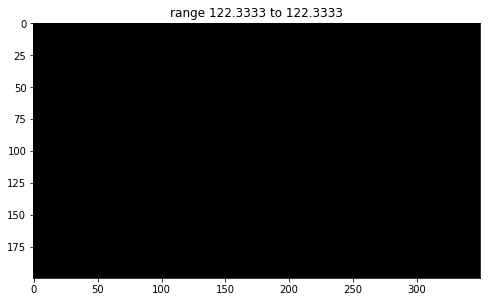

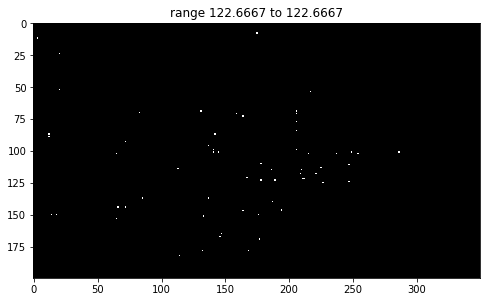

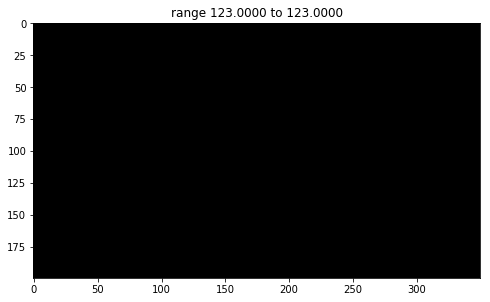

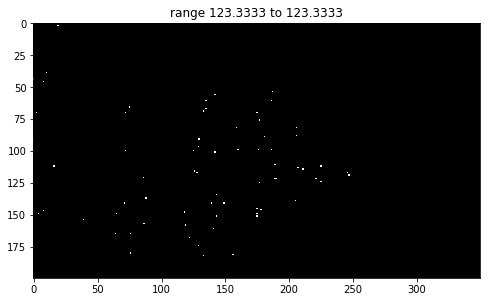

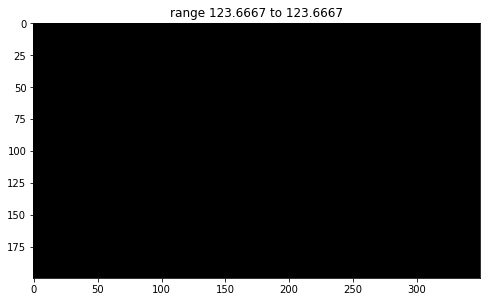

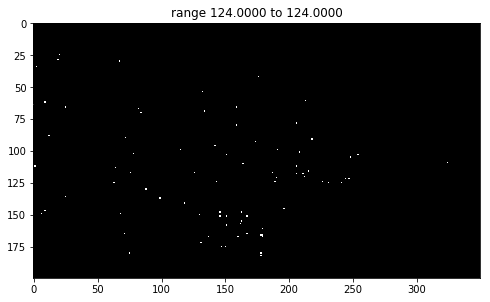

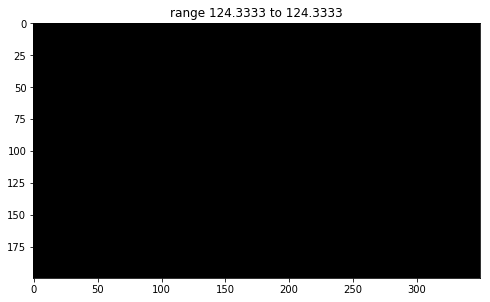

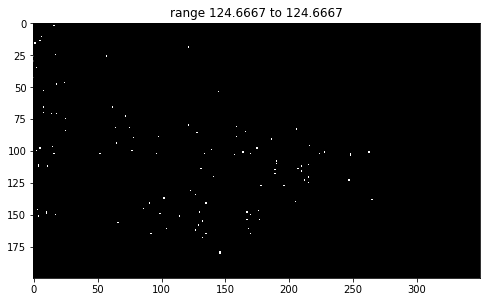

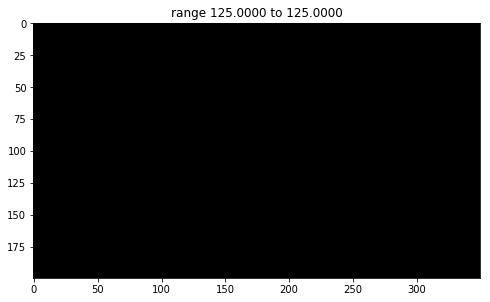

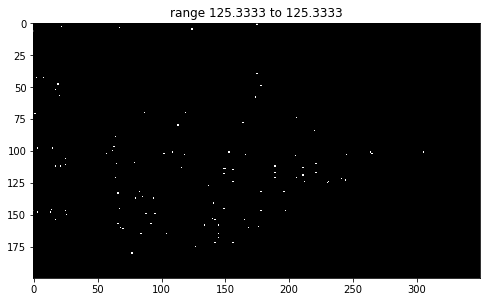

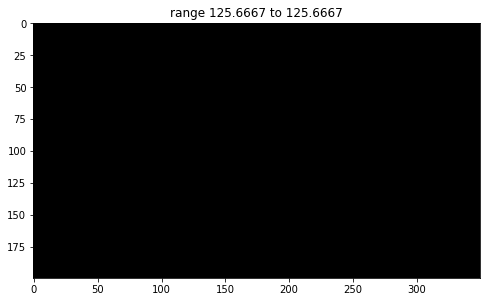

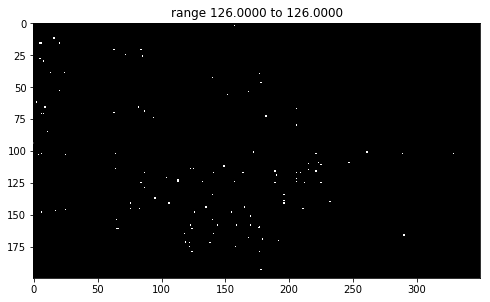

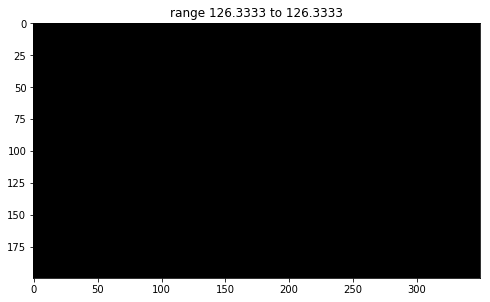

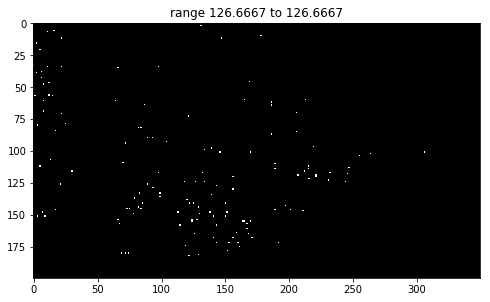

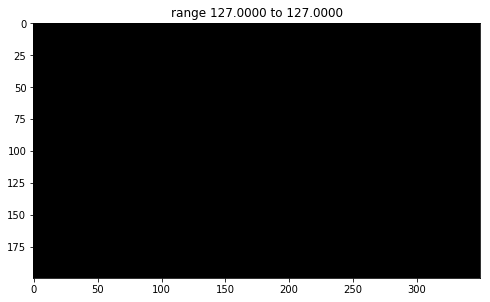

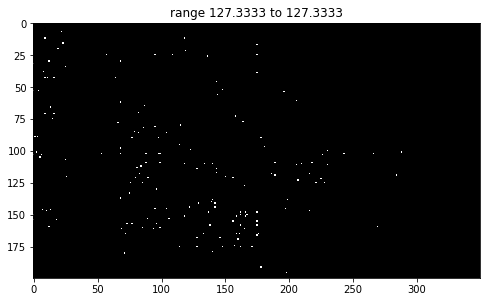

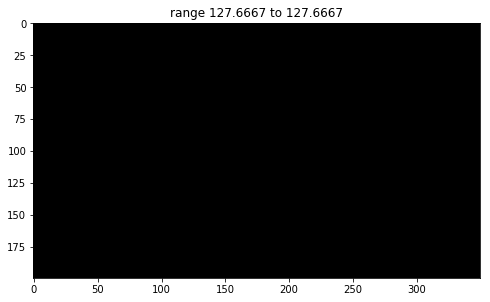

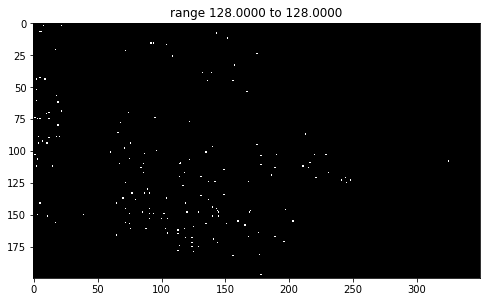

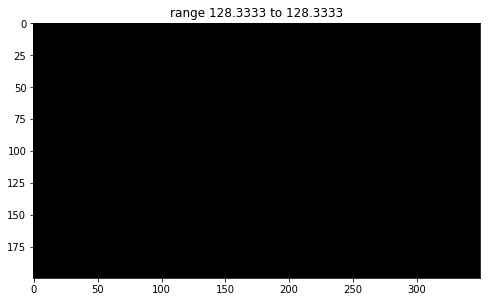

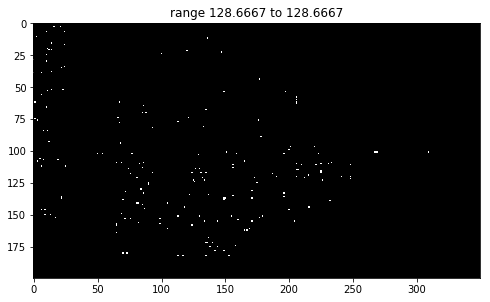

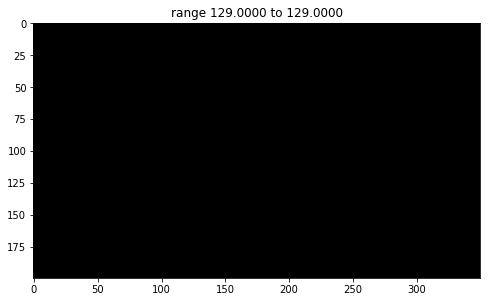

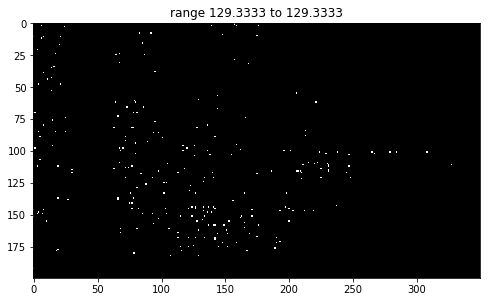

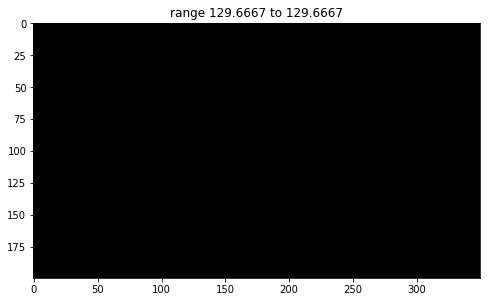

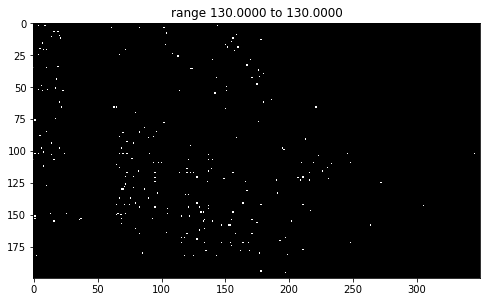

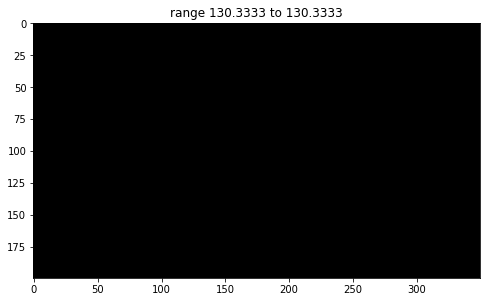

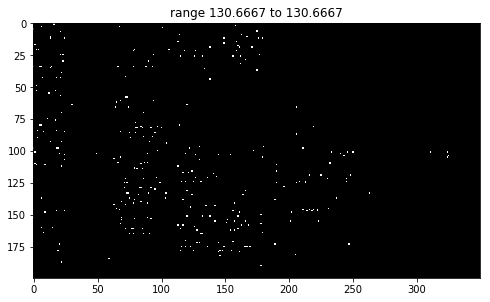

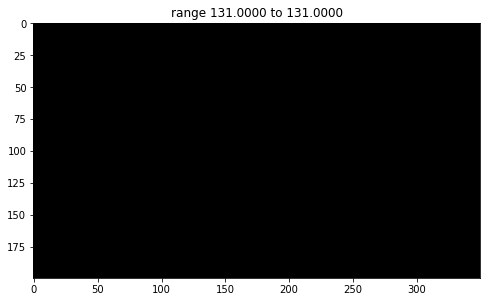

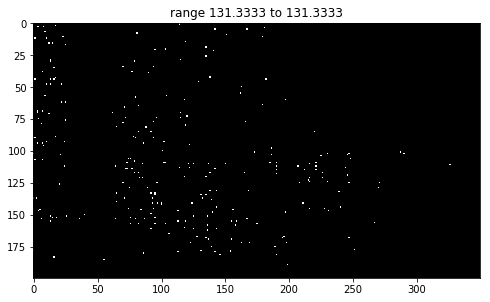

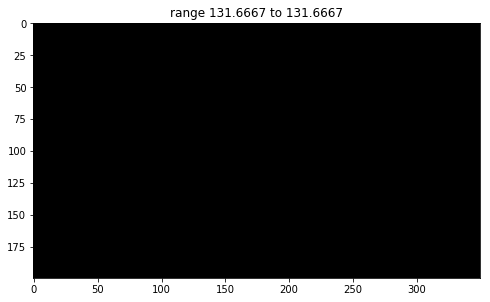

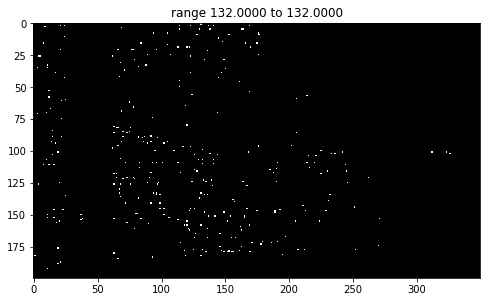

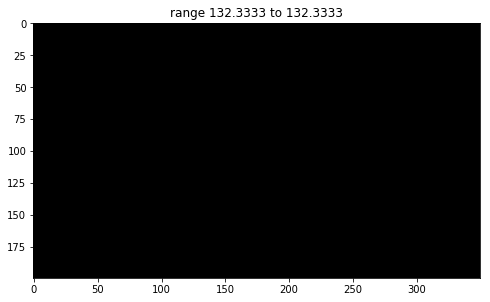

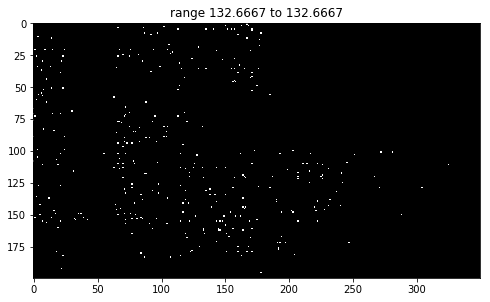

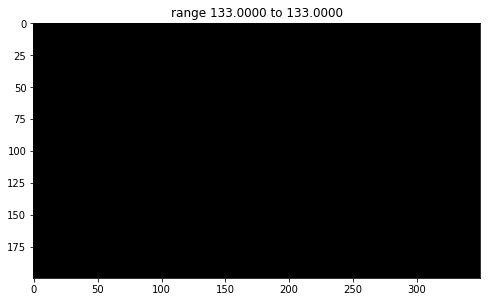

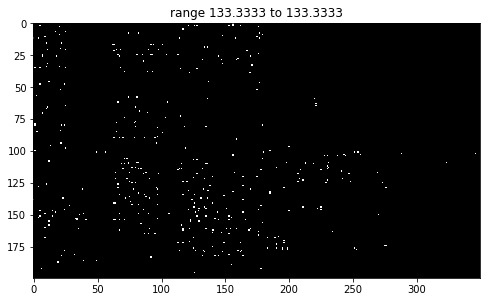

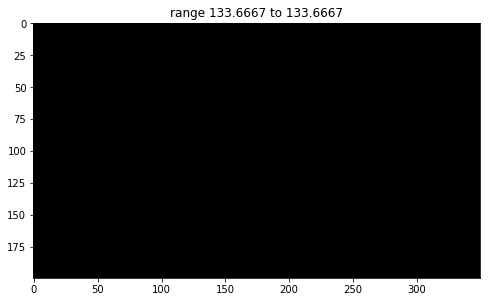

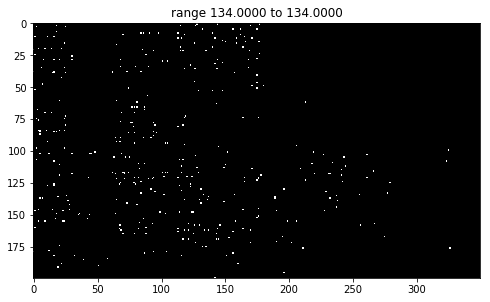

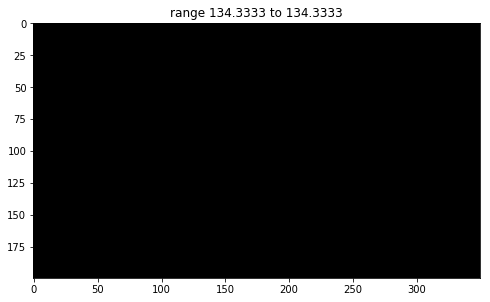

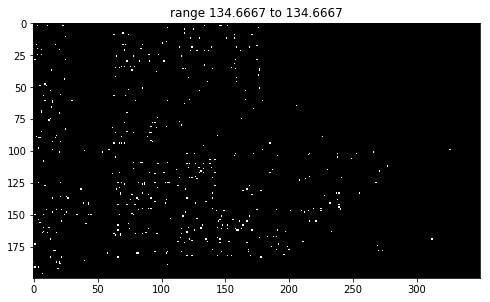

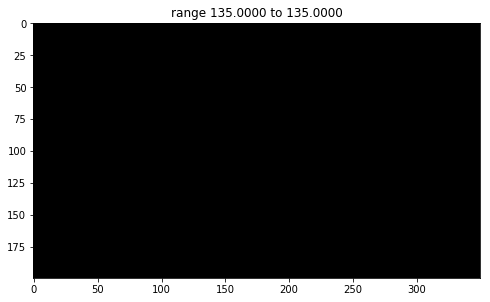

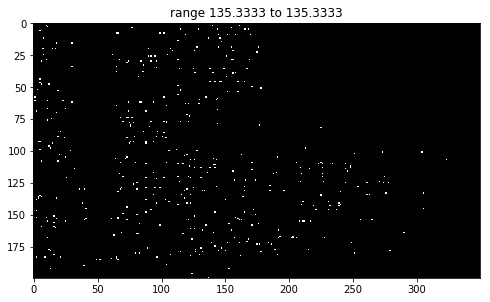

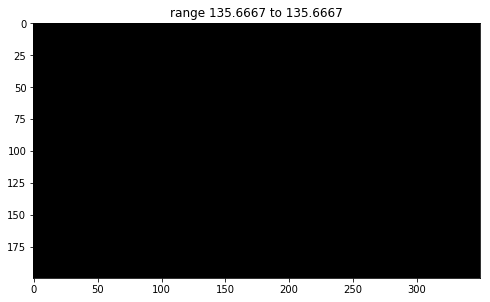

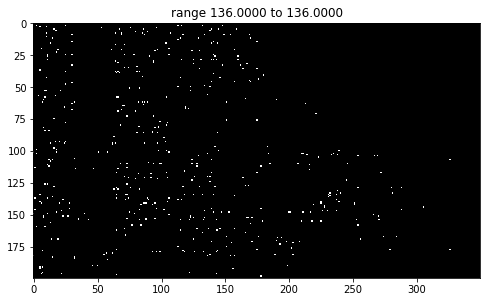

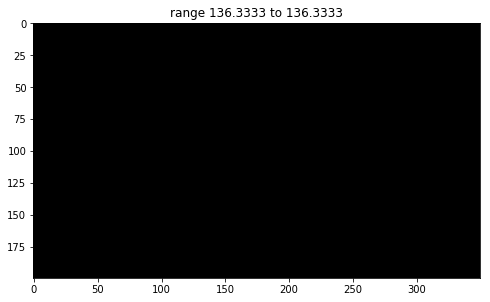

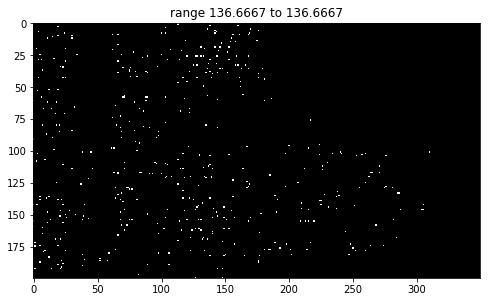

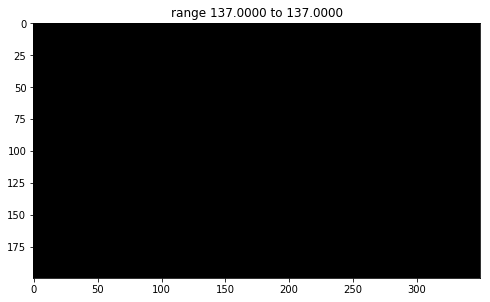

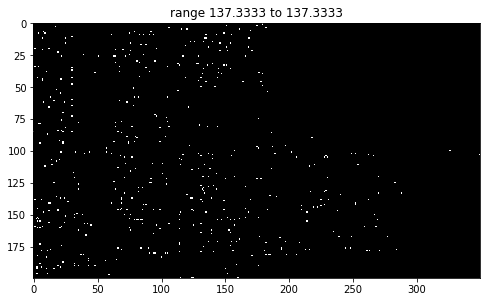

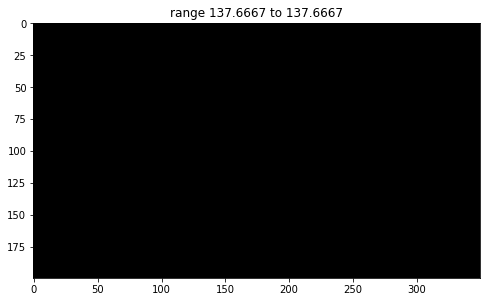

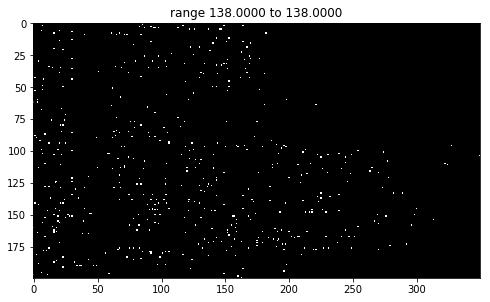

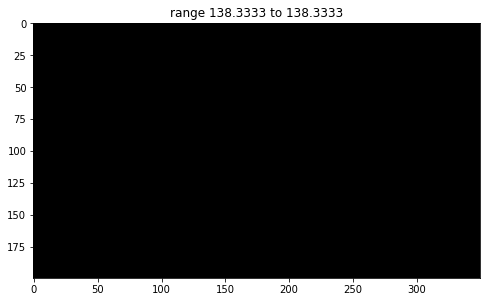

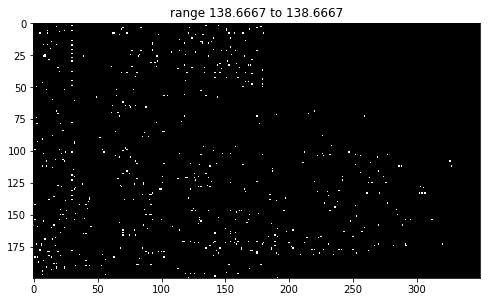

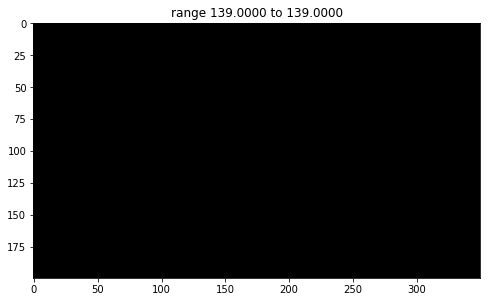

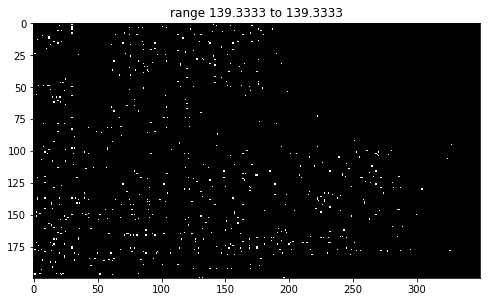

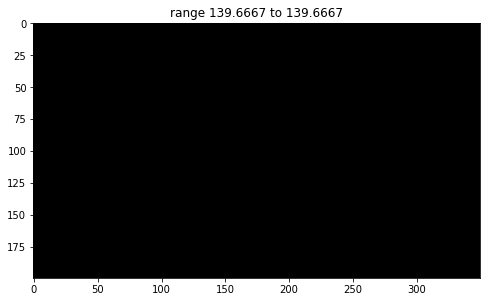

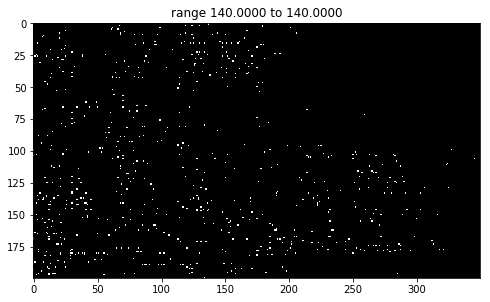

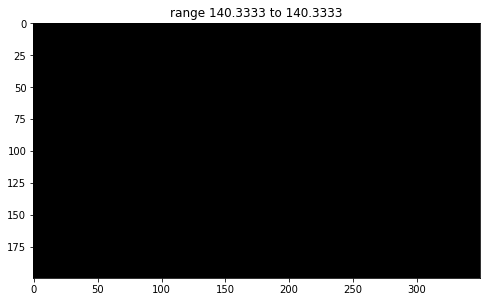

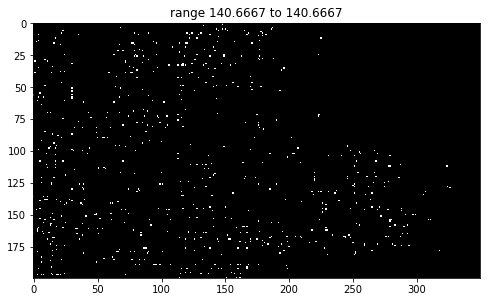

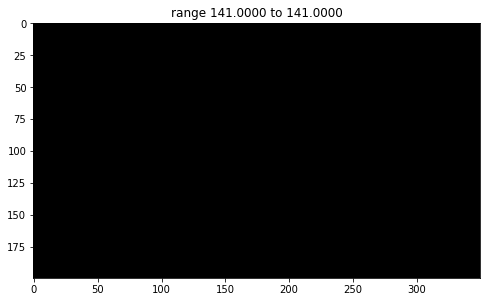

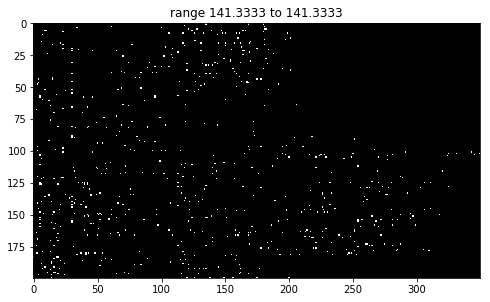

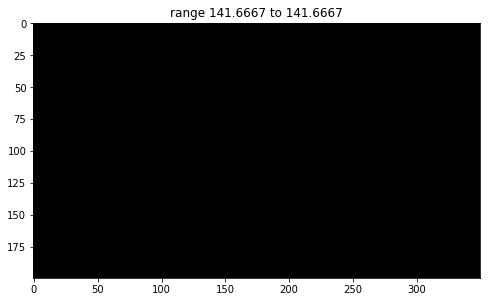

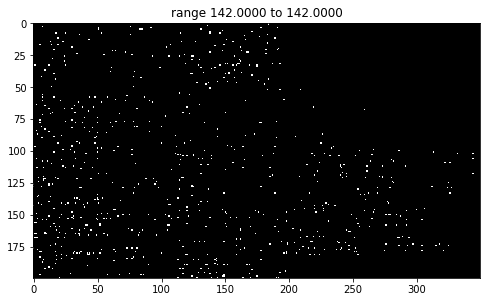

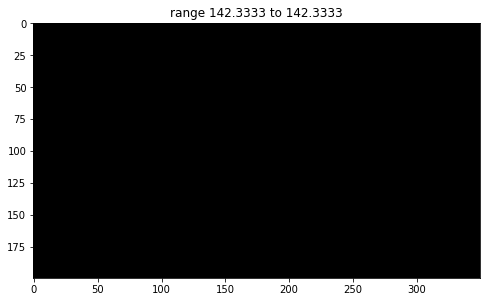

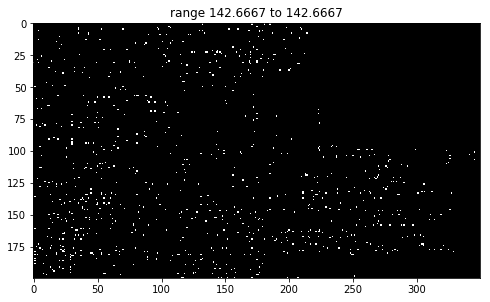

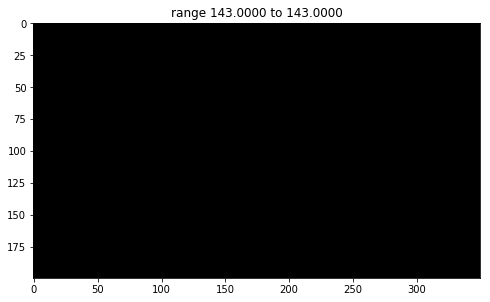

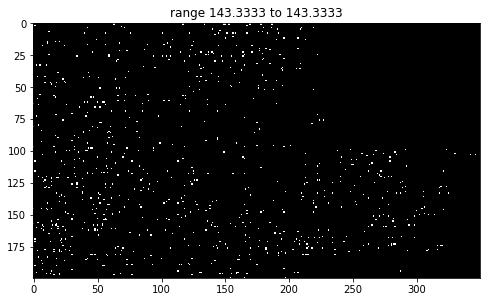

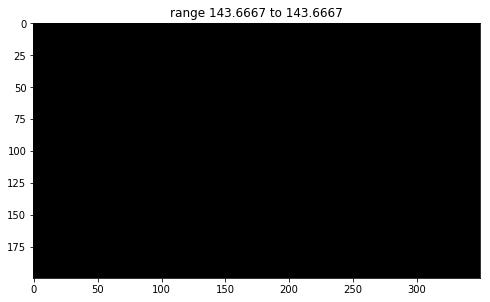

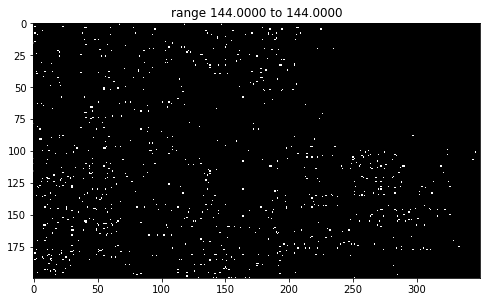

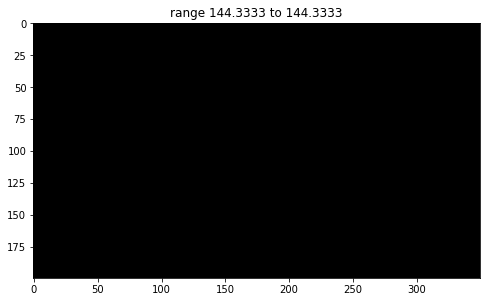

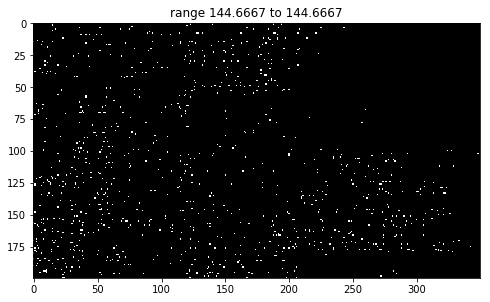

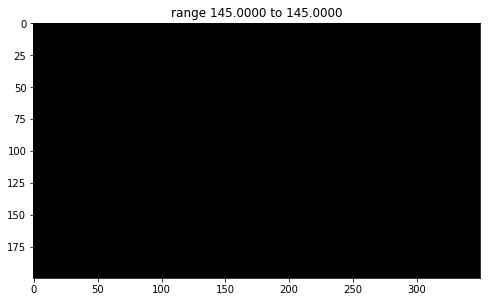

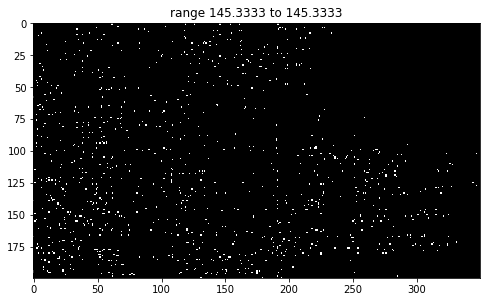

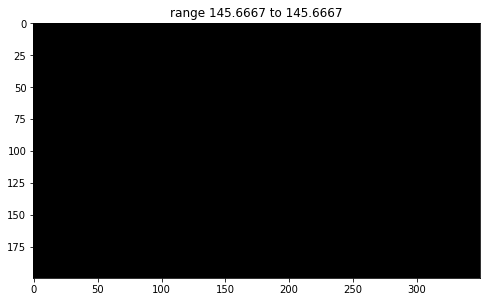

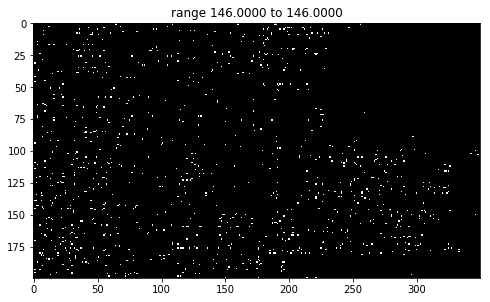

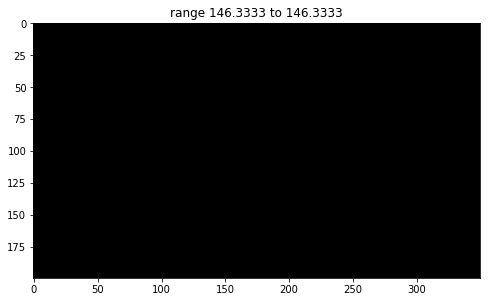

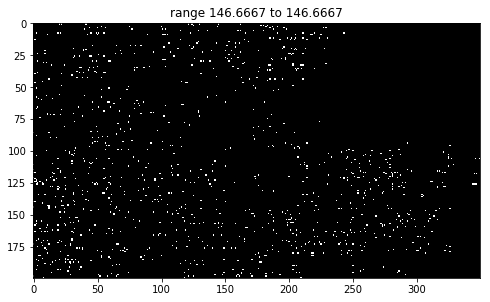

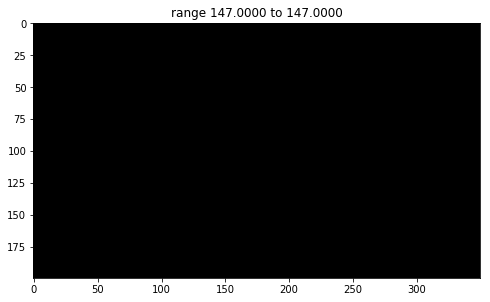

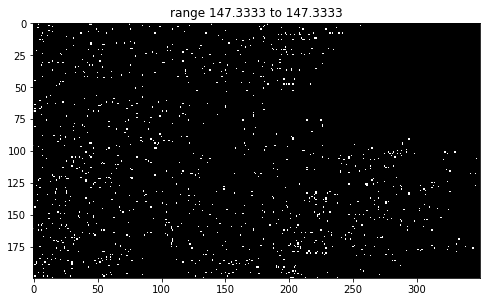

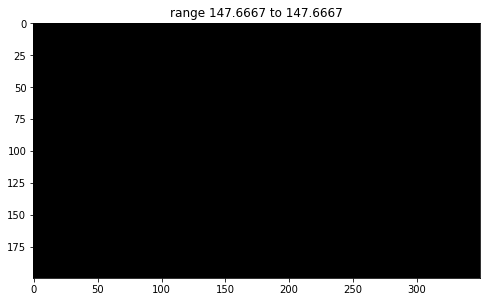

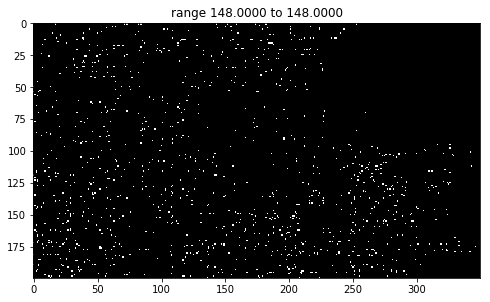

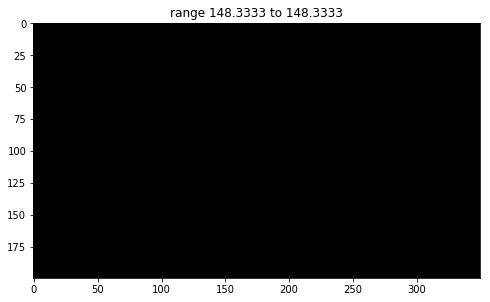

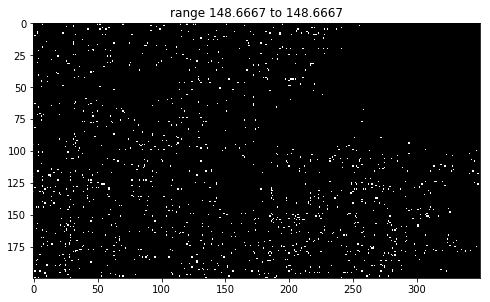

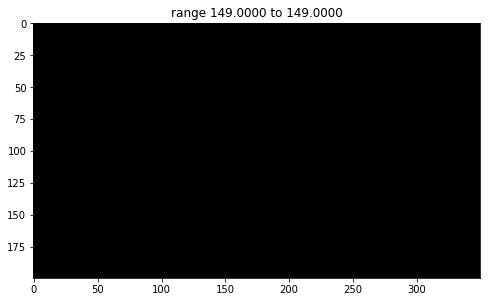

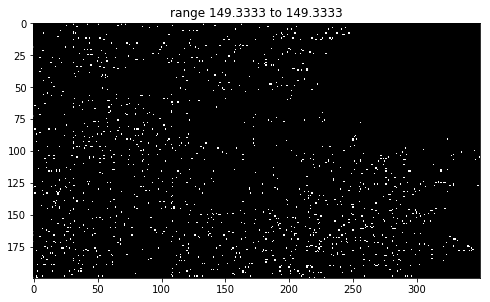

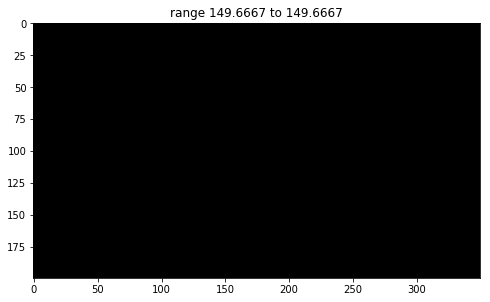

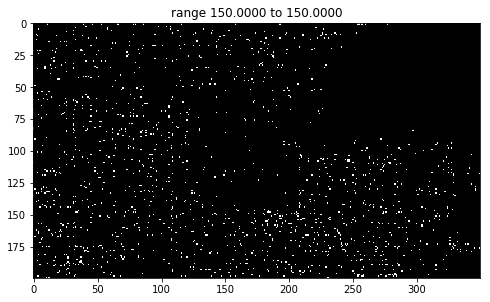

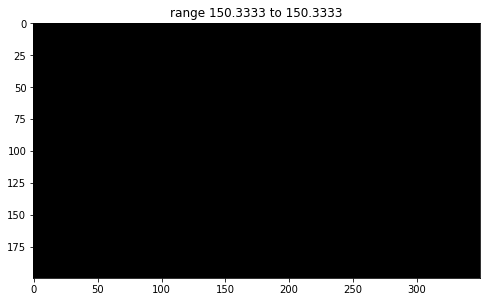

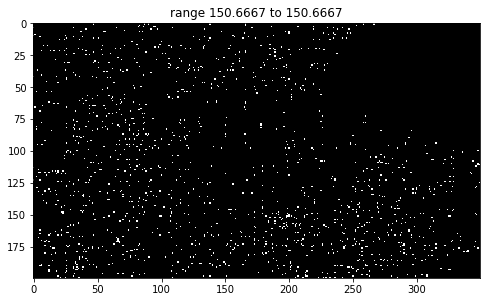

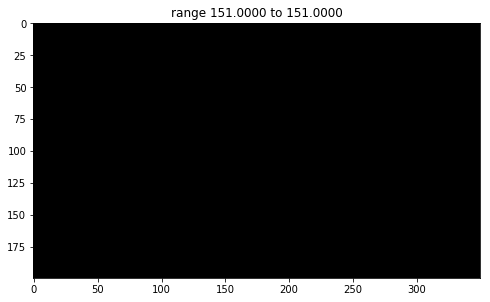

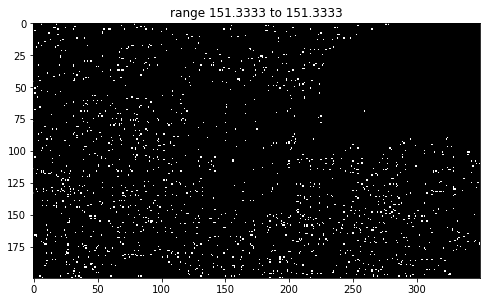

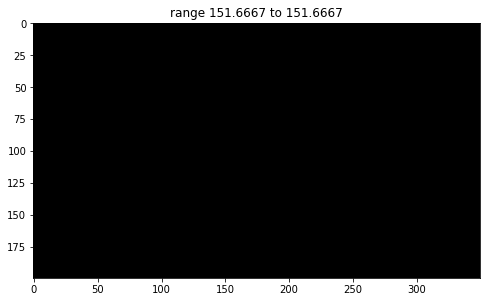

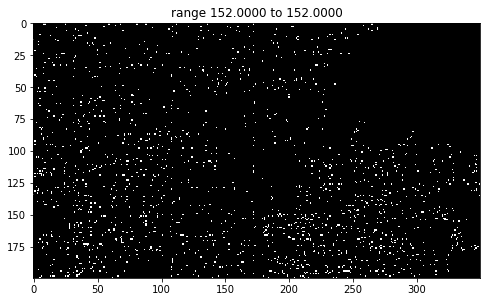

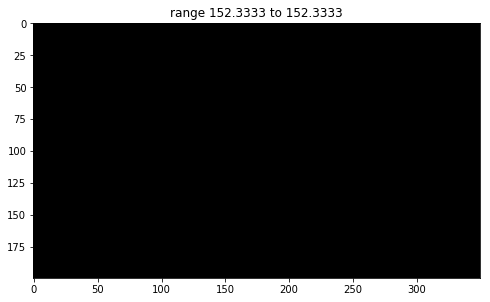

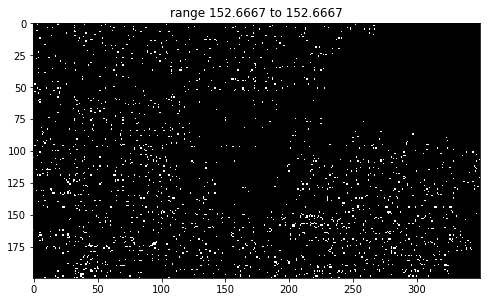

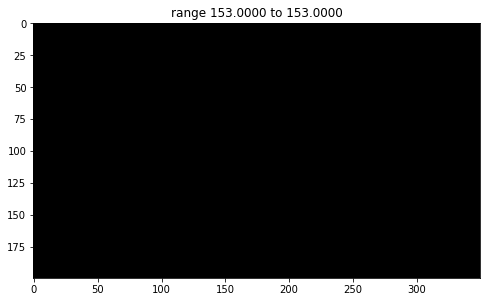

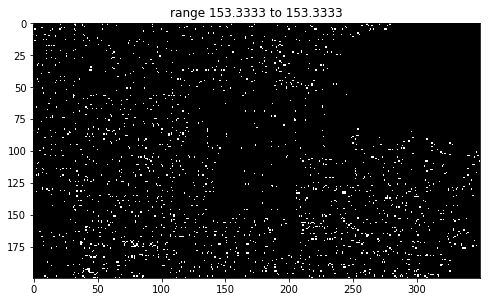

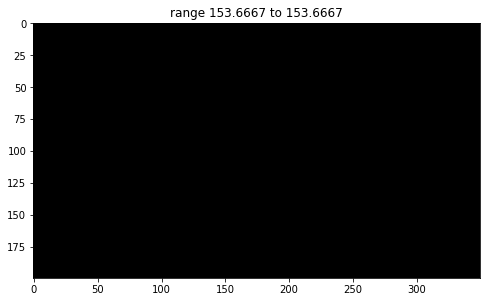

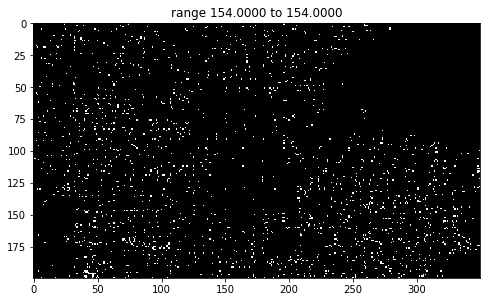

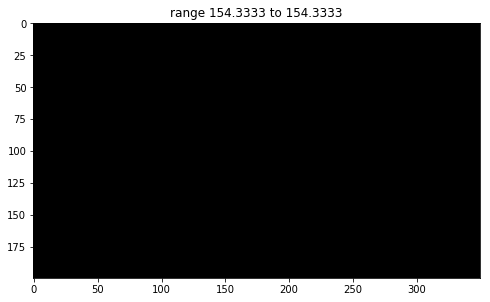

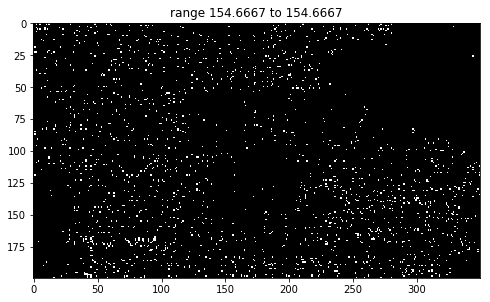

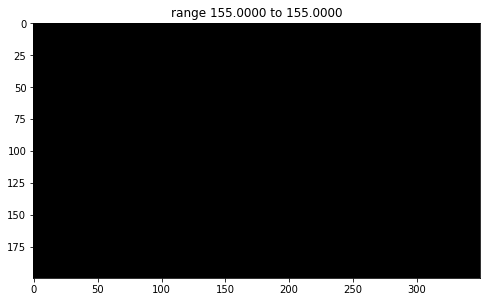

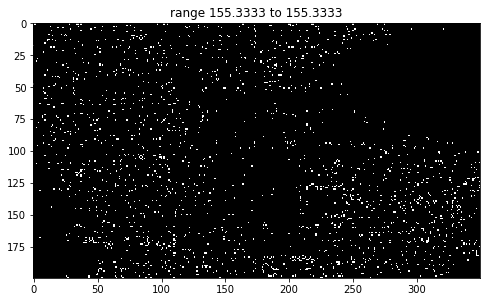

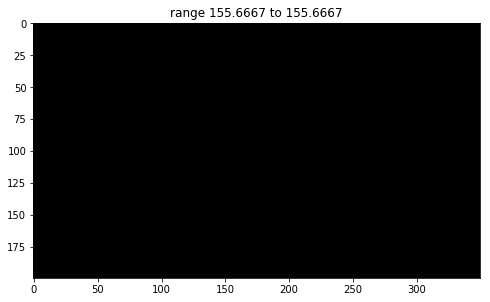

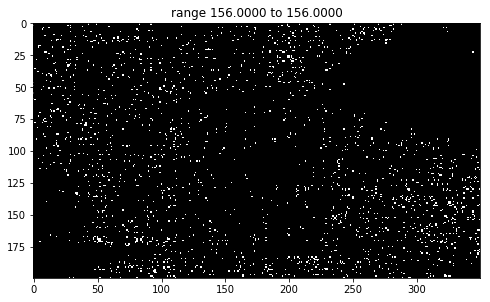

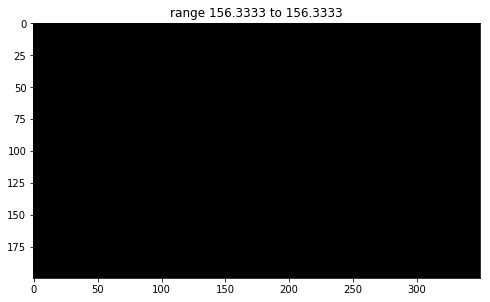

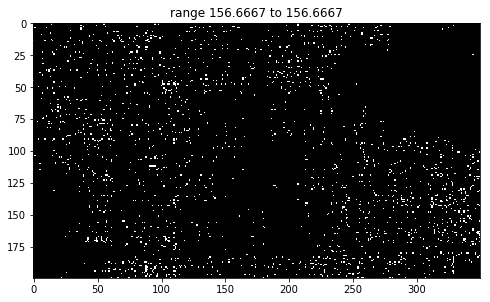

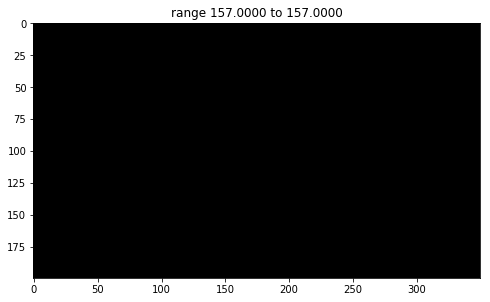

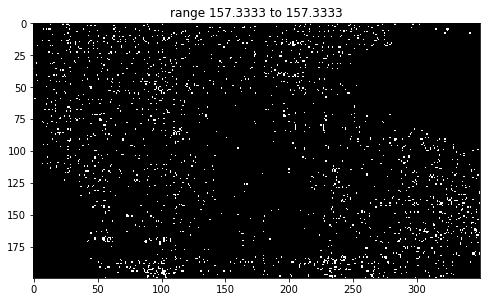

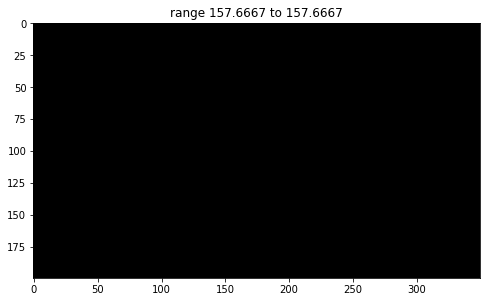

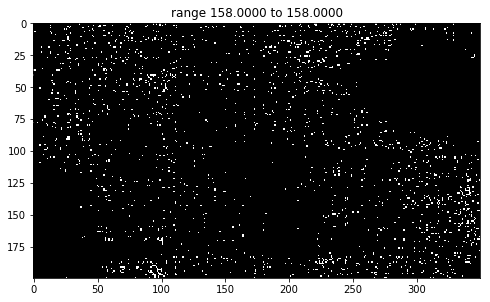

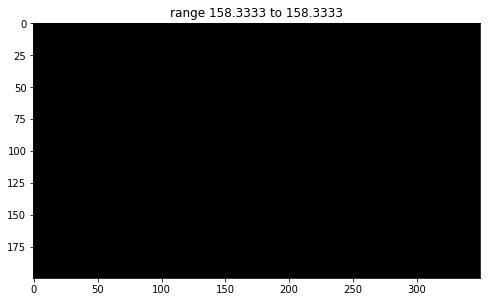

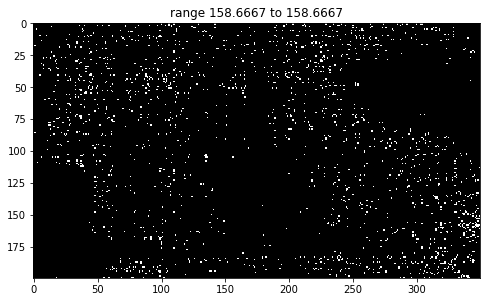

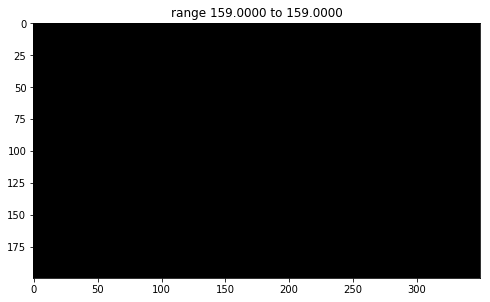

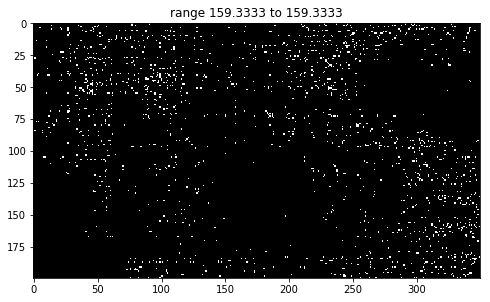

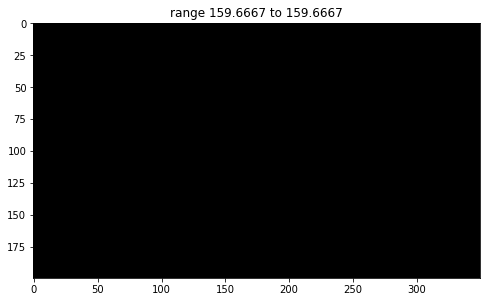

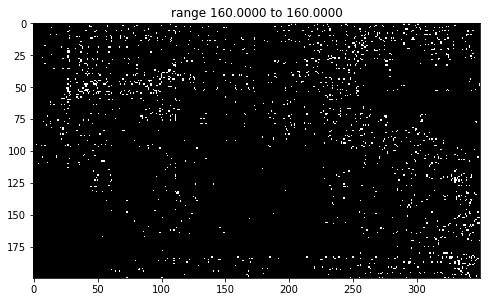

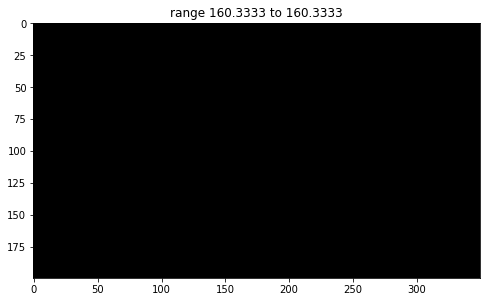

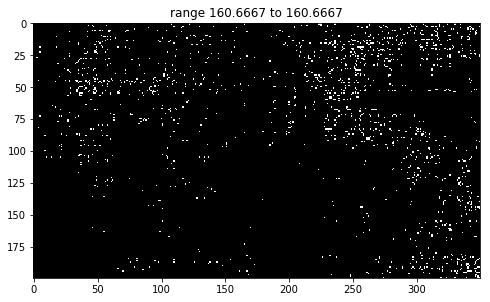

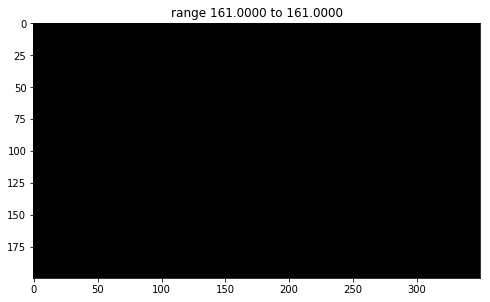

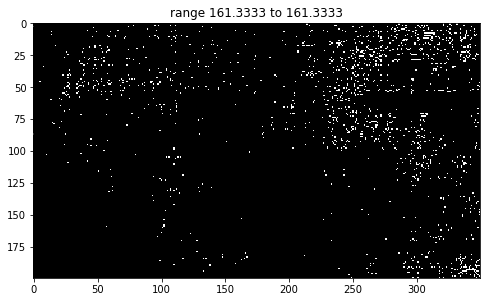

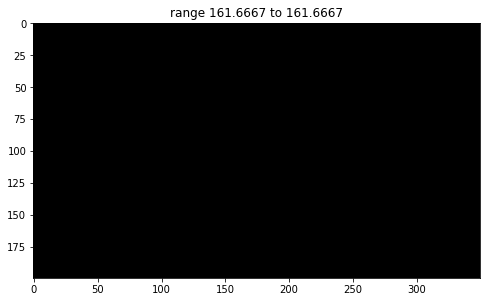

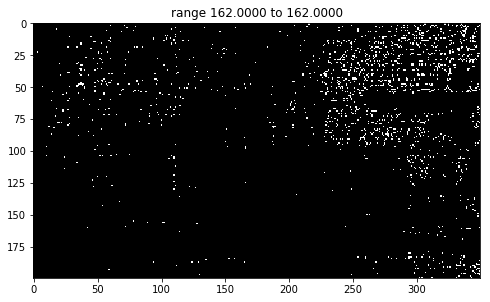

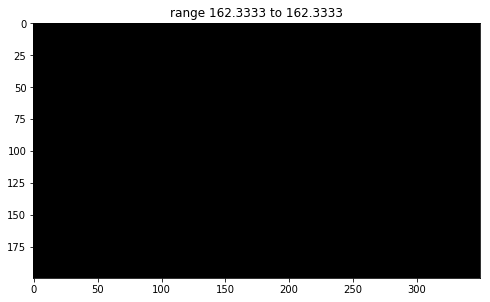

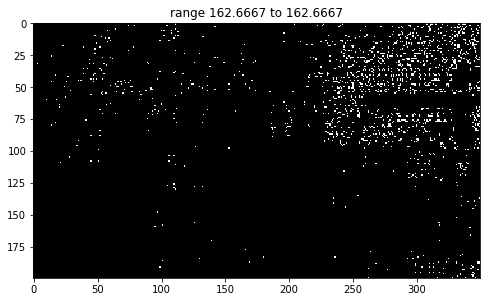

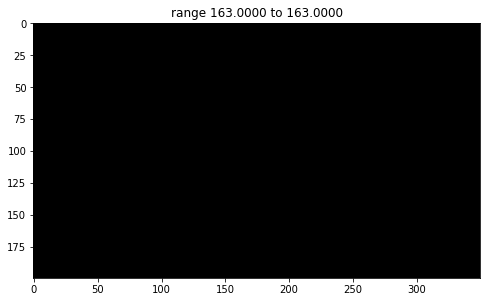

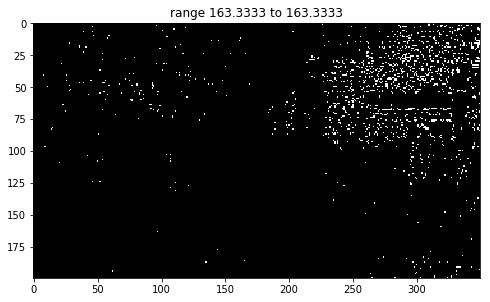

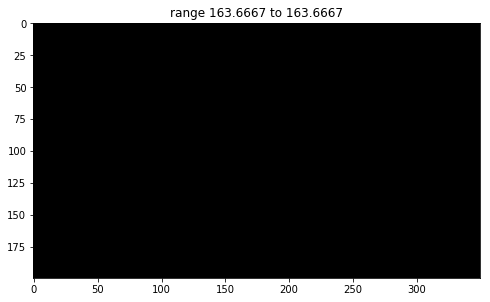

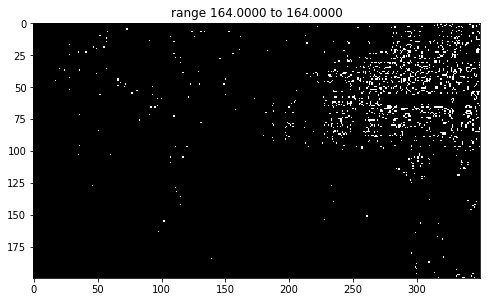

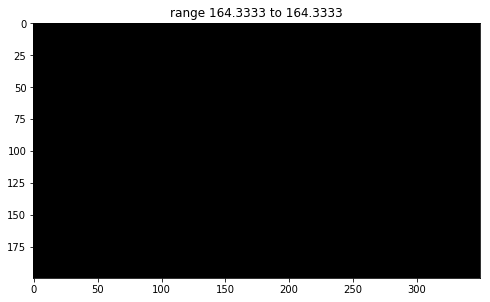

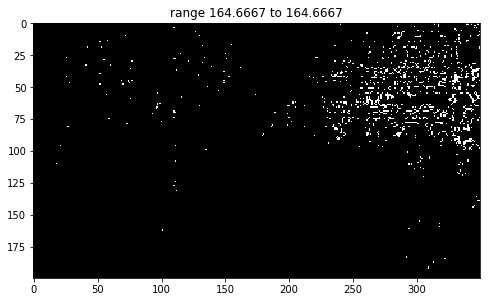

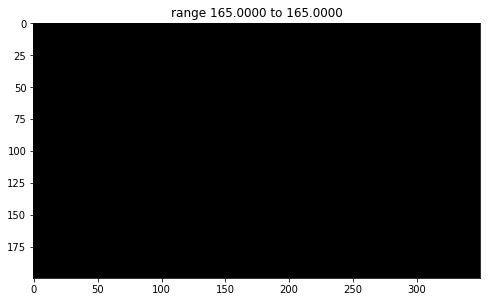

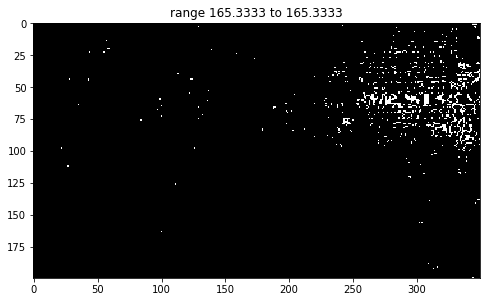

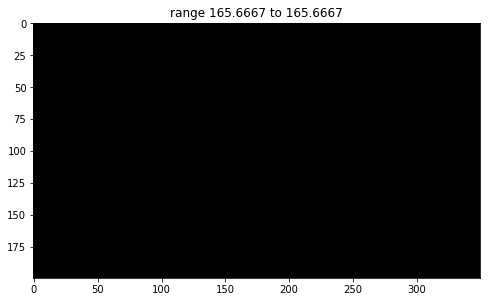

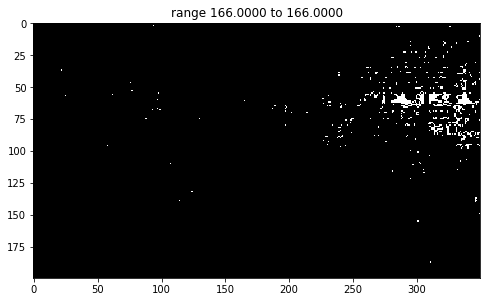

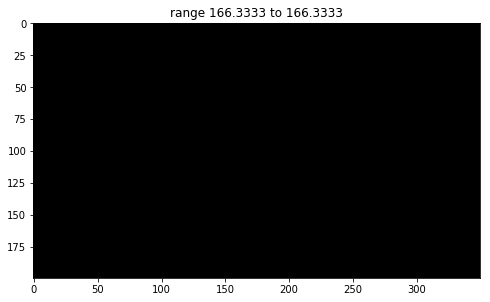

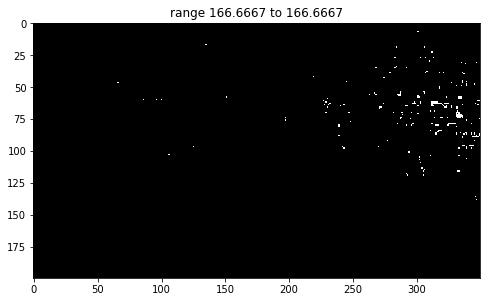

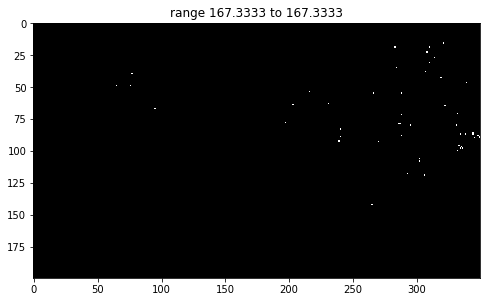

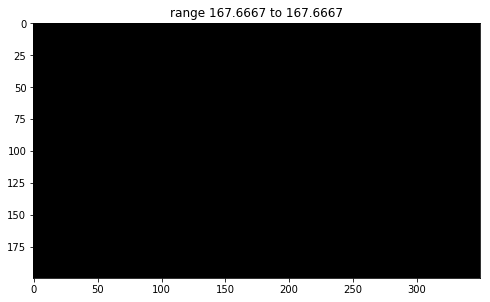

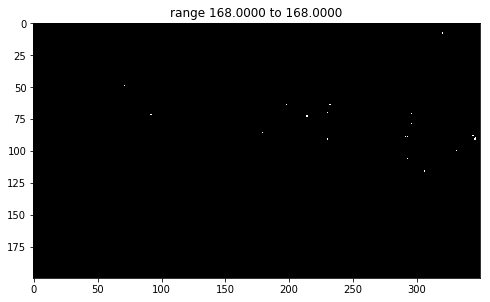

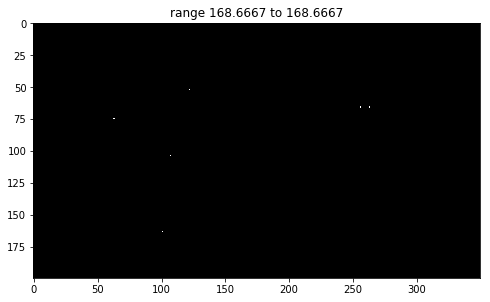

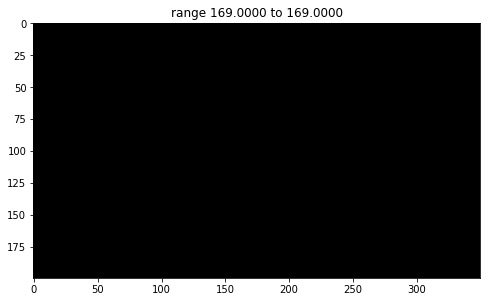

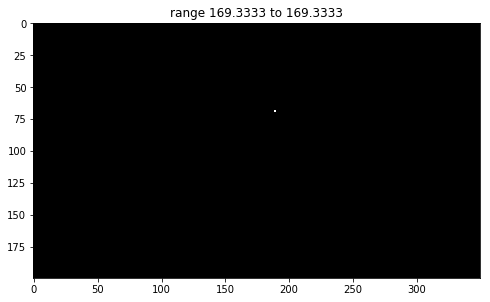

(561, 562, 419.4714003944773, 2265.0)

In [340]:
mean_class_pop = class_pop.mean()
least_pop_index = np.where(class_pop >= class_pop)
# least_pop_index = np.where(class_pop >= mean_class_pop)

for lpi in least_pop_index[0]:
    fig=plt.figure(figsize=(8, 8))
    w, h, rows, columns = 10, 10, 1, 1
    
    i, j = clusters[lpi]
    image_cl = image.copy()
    clx = image_1dx[i:j]
    
#     print(lpi, i, j)
    
    for cl in clx:
        image_cl[image_cl == cl] = 1
    image_cl[image_cl != 1] = 0
    
    li = [0, image_cl]

    for k in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, k)
        ax.set_title('range {:.4f} to {:.4f}'.format(clx[0], clx[-1]))
        plt.imshow(li[k], cmap='gray')
    
    plt.show()
    
i, j, mean_class_pop, class_pop[lpi]

In [334]:
diff

array([3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 2.22044605e-16, 3.33333333e-01,
       4.44089210e-16, 3.33333333e-01, 3.33333333e-01, 4.44089210e-16,
       3.33333333e-01, 4.44089210e-16, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 8.88178420e-16,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       8.88178420e-16, 3.33333333e-01, 8.88178420e-16, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 8.88178420e-16, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 1.77635684e-15,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 1.77635684e-15, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       1.77635684e-15, 3.33333333e-01, 1.77635684e-15, 3.33333333e-01,
      

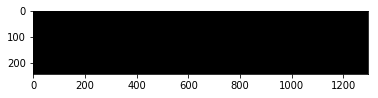

In [335]:
img = image.copy()
# img[(image >= 149) & (image <= 164)] = 255
img[(image >= 8) & (image <= 38.66666667)] = 255
img[image != 255] = 0

plt.imshow(img, cmap='gray')